In [654]:
from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
import joblib

In [3]:
# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttributesFilterFull"]
mycol = mydb["s_m_a_r_t_att_full"]

myquerySMARTAtt = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "r_sectors":1, "_id":0}   <---- current one
myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "r_sectors":1, "n_b_written":1, "w_r_d":1, "_id":0}

mydocSMARTAtt = mycol.find(myquerySMARTAtt, myfieldsSMARTAtt)
#mydocSMARTAtt = mycol.find(myquerySMARTAtt)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listSMARTAtt = list(mydocSMARTAtt)
dfSMARTAtt =  pd.DataFrame(listSMARTAtt)

# %%
dfSMARTAtt["model_y"] = "B2"

# %%
result = pd.merge(dfSMARTAtt, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [ ]:
## Saving spllited values into a csv file

model= "B2"

result.to_csv('SplittedDatasetSSD/' + 'extractedattributes' + model + '.csv')

In [ ]:
# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["OverTimeSSDsFailures"]
mycol = mydb["over_time_s_s_ds_failures"]

myqueryFailureTime = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
myfieldsFailureTime = {"disk_id":1, "failure_time":1, "_id":0}

mydocFailureTime = mycol.find(myqueryFailureTime, myfieldsFailureTime)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listFailureTime = list(mydocFailureTime)
dfFailureTime =  pd.DataFrame(listFailureTime)

# %%
dfFailureTime["model_y"] = "B2"

# %%
resultSSDFailures = pd.merge(dfFailureTime, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [ ]:
## Saving spllited values into a csv file

model= "B2"

resultSSDFailures.to_csv('SplittedDatasetSSD/' + 'extractedfailures' + model + '.csv')

In [655]:
# Wheter it is necessary to load the files created above

model= "B2"

result = pd.read_csv('../../../../Downloads/' + 'extractedattributes' + model + '.csv')
resultSSDFailures = pd.read_csv('SplittedDatasetSSD/' + 'extractedfailures' + model + '.csv')

In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31008712 entries, 0 to 31008711
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0.1  int64  
 1   Unnamed: 0    int64  
 2   disk_id       float64
 3   timestamp     object 
 4   r_sectors     float64
 5   n_b_written   float64
 6   w_r_d         float64
 7   model_y       object 
 8   app           object 
dtypes: float64(4), int64(2), object(3)
memory usage: 2.1+ GB


In [59]:
resultSSDFailures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    604 non-null    int64  
 1   disk_id       604 non-null    float64
 2   failure_time  604 non-null    object 
 3   model_y       604 non-null    object 
 4   app           604 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 23.7+ KB


In [7]:
result.w_r_d.max()

7206.0

In [8]:
# REMOVE ZERO VALUES AS THEY ARE AFFECTING THE KDE RESULTS

result.drop(result[result.w_r_d < 10].index, inplace=True)
result.drop(result[result.w_r_d > 7206].index, inplace=True)

In [9]:
result.drop(result[result.w_r_d > 3000].index, inplace=True)

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

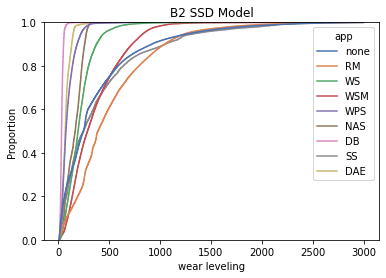

In [7]:
graph = sns.ecdfplot(x = "w_r_d", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel ="wear leveling", title ='B2 SSD Model')

In [ ]:
result.drop(result[result.r_errors < 10].index, inplace=True)

[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

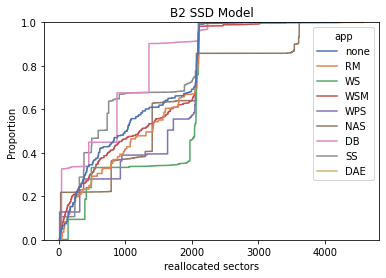

In [11]:
# removing < 10

graph = sns.ecdfplot(x = "r_sectors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

In [ ]:
result.loc[result["app"] == "WS", "u_errors"].max()

In [ ]:
result.drop(result[result.u_errors < 1].index, inplace=True)

[Text(0.5, 0, 'Uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

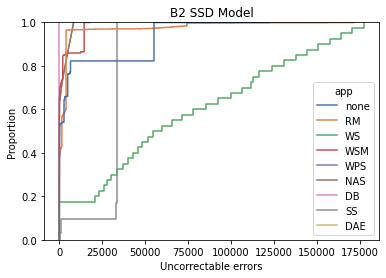

In [14]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

graph = sns.ecdfplot(x = "u_errors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Uncorrectable errors", title ='B2 SSD Model')

In [18]:
result.loc[result["app"] == "DB", "p_failedB"].max()

2095.0

In [5]:
result.drop(result[result.p_failedB < 1].index, inplace=True)
result.drop(result[result.p_failedB >2103].index, inplace=True)

[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

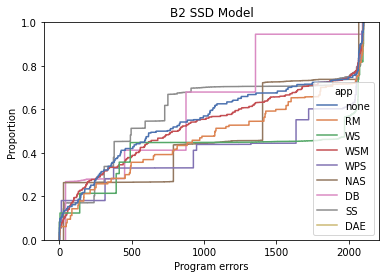

In [16]:
graph = sns.ecdfplot(x = "p_failedB", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

In [2]:
maxW = result.n_b_written.max()

In [3]:
result.drop(result[result.n_b_written < 1].index, inplace=True)
result.drop(result[result.n_b_written > maxW].index, inplace=True)

In [9]:
result.drop(result[result.n_b_written > 5992942384941].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

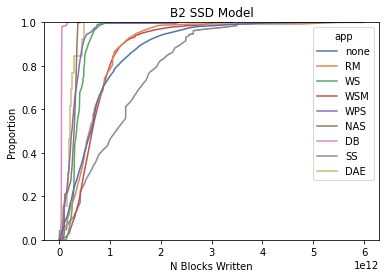

In [10]:
graph = sns.ecdfplot(x = "n_b_written", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

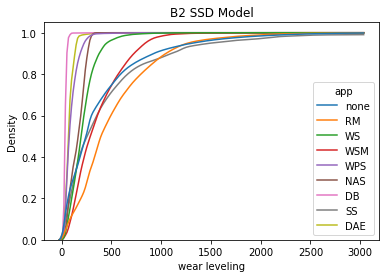

In [8]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="w_r_d", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "wear leveling", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

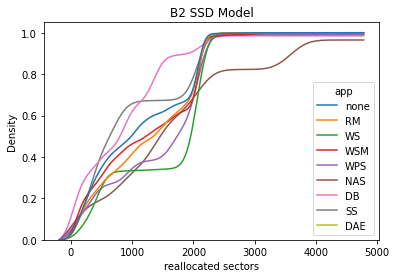

In [13]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="r_sectors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

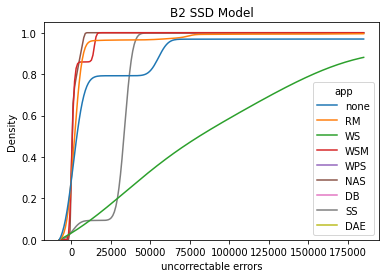

In [15]:
graph = sns.kdeplot(
    data=result, x="u_errors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "uncorrectable errors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

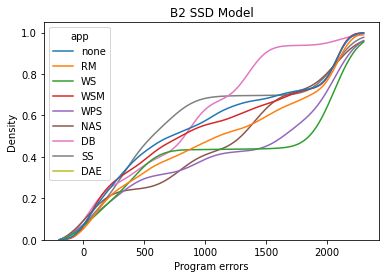

In [19]:
graph = sns.kdeplot(
    data=result, x="p_failedB", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

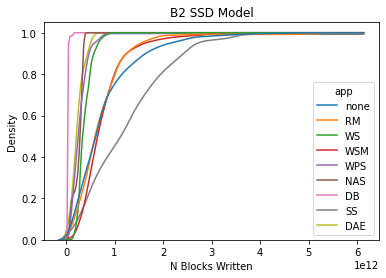

In [11]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

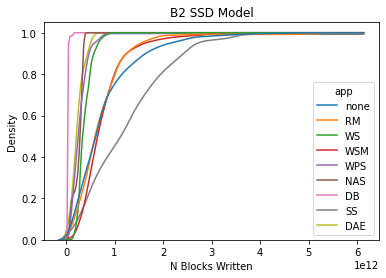

In [7]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

### APPROACH USING GROUPY BASED ON TIMESTAMP

N Blocks written x Program Errors

In [670]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)[['p_failedB', 'n_b_written']].mean()

KeyError: "Columns not found: 'p_failedB'"

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Program errors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

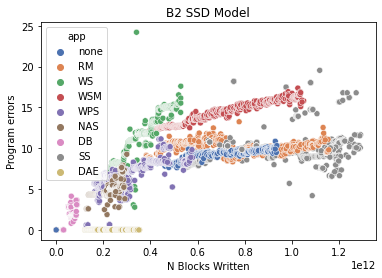

In [9]:
graph = sns.scatterplot(x = "n_b_written", y = 'p_failedB', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

In [657]:
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

NameError: name 'group' is not defined

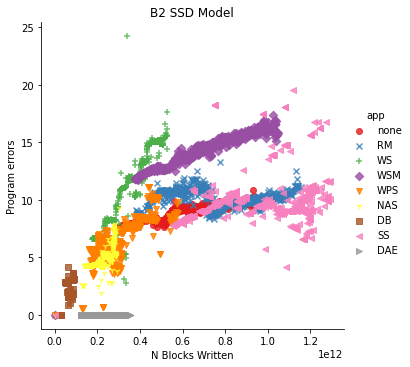

In [12]:
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

Wear Leveling x Time

In [662]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['w_r_d'].mean()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

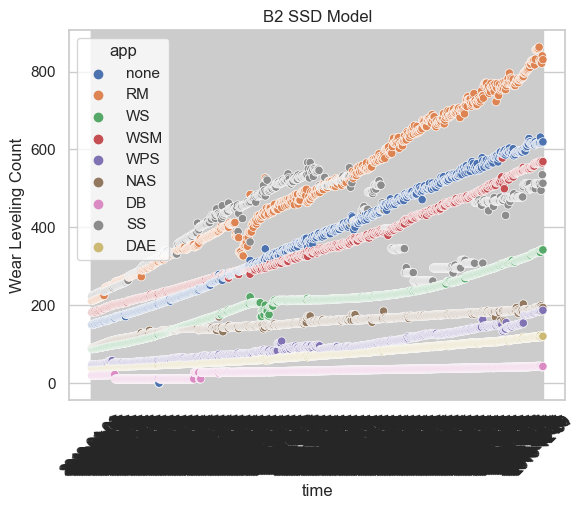

In [663]:
graph = sns.scatterplot(x = "timestamp", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "Wear Leveling Count", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

N Blocks written x Wear Leveling

In [765]:
## group per day (daily mean) - per app

group = result.groupby(['timestamp', 'app'], as_index=False)[['n_b_written', 'w_r_d']].mean()

In [666]:
result.head()

Unnamed: 0.1  Unnamed: 0  disk_id   timestamp  r_sectors   n_b_written  \
0             0           0  19207.0  2018-01-01        NaN           NaN   
1             1           1  19207.0  2018-01-02        NaN           NaN   
2             2           2  19207.0  2018-01-03        0.0  5.084690e+09   
3             3           3  19207.0  2018-01-04        0.0  5.084690e+09   
4             4           4  19207.0  2018-01-05        0.0  5.084690e+09   

   w_r_d model_y   app  
0    NaN      B2  none  
1    NaN      B2  none  
2    3.0      B2  none  
3    3.0      B2  none  
4    3.0      B2  none

In [668]:
## group per day (daily mean) - withou consider app

group = result.groupby(['timestamp'], as_index=False)[['n_b_written', 'w_r_d']].mean()

In [9]:
group.head()

timestamp   app  n_b_written  w_r_d
0  2018-01-01    RM          NaN    NaN
1  2018-01-01    WS          NaN    NaN
2  2018-01-01  none          NaN    NaN
3  2018-01-02   DAE          NaN    NaN
4  2018-01-02    DB          NaN    NaN

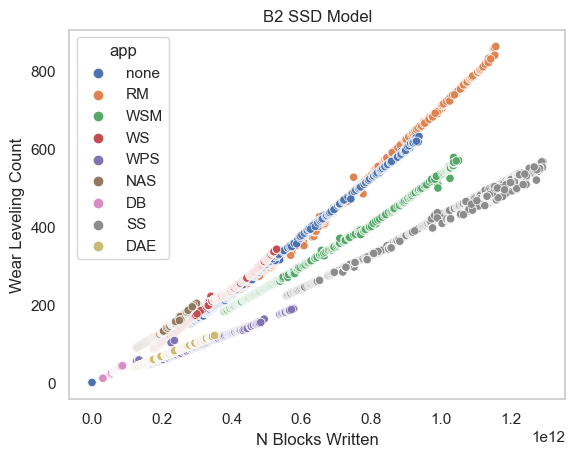

In [673]:
graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WSM','WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')
plt.grid(False)

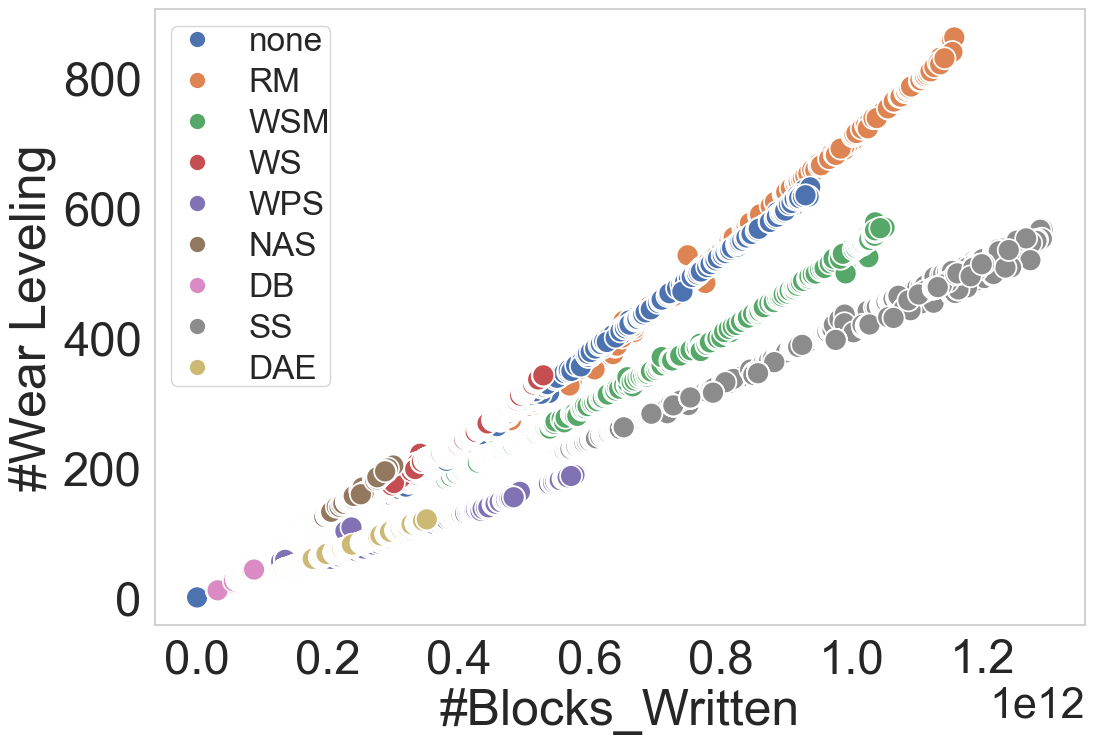

In [931]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Customize plotting parameters
font_size = 36
label_size = 36

plt.figure(figsize=(12, 8))

# Create the scatterplot
graph = sns.scatterplot(
    x="n_b_written", 
    y='w_r_d', 
    palette='deep', 
    hue='app', 
    hue_order=['none', 'RM', 'WSM', 'WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], 
    data=group, 
    s=250  # Scatter point size
)
plt.grid(False)
plt.ylabel('#Wear Leveling', fontsize=label_size)
plt.xlabel('#Blocks_Written', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)

# Adjust the font size of the x-axis order of magnitude
ax = plt.gca()  # Get current axis
ax.xaxis.get_offset_text().set_fontsize(22)

# Get unique labels and colors from the scatterplot
handles, labels = graph.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Create custom legend
custom_legends = []
for handle, label in zip(unique_handles, unique_labels):
    if label != '_nolegend_':
        custom_legends.append(mlines.Line2D([], [], color=handle.get_facecolor()[0], marker='o', linestyle='None', markersize=10, label=label))

# Display custom legend
ax.legend(handles=custom_legends, fontsize=24, columnspacing=4, borderpad=0.01, labelspacing=0.3, handlelength=1.5)

ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(label_size-5)

plt.savefig('img/wearlevelingWritenBlocks.pdf', bbox_inches='tight')
plt.show()


In [6]:
group.drop(group[group.w_r_d < 3.25].index, inplace=True)

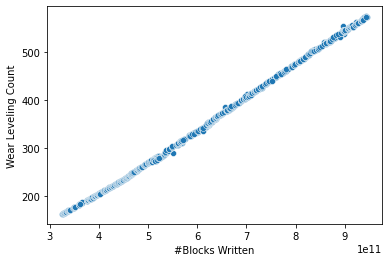

In [7]:
# without consider app

graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Wear Leveling Count")
plt.savefig('img/wearlevelingWritenBlocksWithoutApp.pdf')

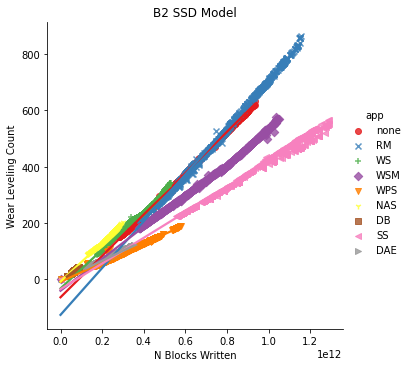

In [5]:
graph = sns.lmplot(x="n_b_written", y="w_r_d", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

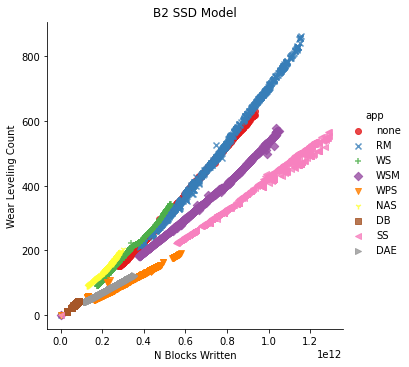

In [6]:
graph = sns.lmplot(x="n_b_written", y="w_r_d", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

Reallocated Sector x Time

In [11]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['r_sectors'].mean()

In [8]:
group.drop(group[group.r_sectors < 10].index, inplace=True)

In [12]:
group.drop(group[group.r_sectors > 18].index, inplace=True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

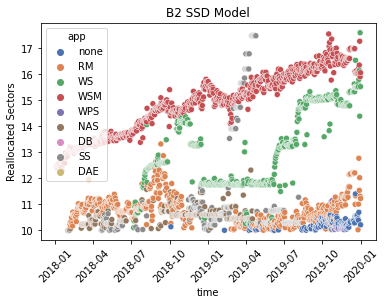

In [13]:
graph = sns.scatterplot(x = "timestamp", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "Reallocated Sectors", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

N Blocks written x Reallocated sector

In [747]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)[['n_b_written', 'r_sectors']].mean()

In [13]:
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    6436 non-null   object 
 1   app          6436 non-null   object 
 2   n_b_written  6424 non-null   float64
 3   r_sectors    6424 non-null   float64
dtypes: float64(2), object(2)
memory usage: 201.2+ KB


In [20]:
group.tail()

timestamp   app   n_b_written  r_sectors
6431  2019-12-31    SS  1.198229e+12   8.442826
6432  2019-12-31   WPS  5.710862e+11   8.896552
6433  2019-12-31    WS  5.286785e+11  15.532558
6434  2019-12-31   WSM  1.043207e+12  16.066338
6435  2019-12-31  none  9.290646e+11  10.218057

In [22]:
group.size

25744

In [918]:
group.drop(group[group.r_sectors > 30].index, inplace=True)

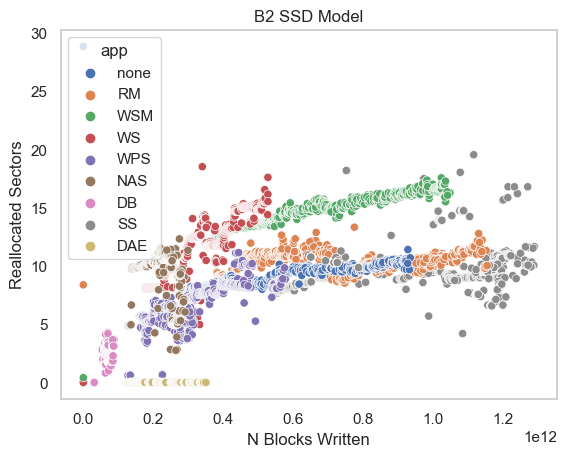

In [46]:
graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WSM','WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')
plt.grid(False)

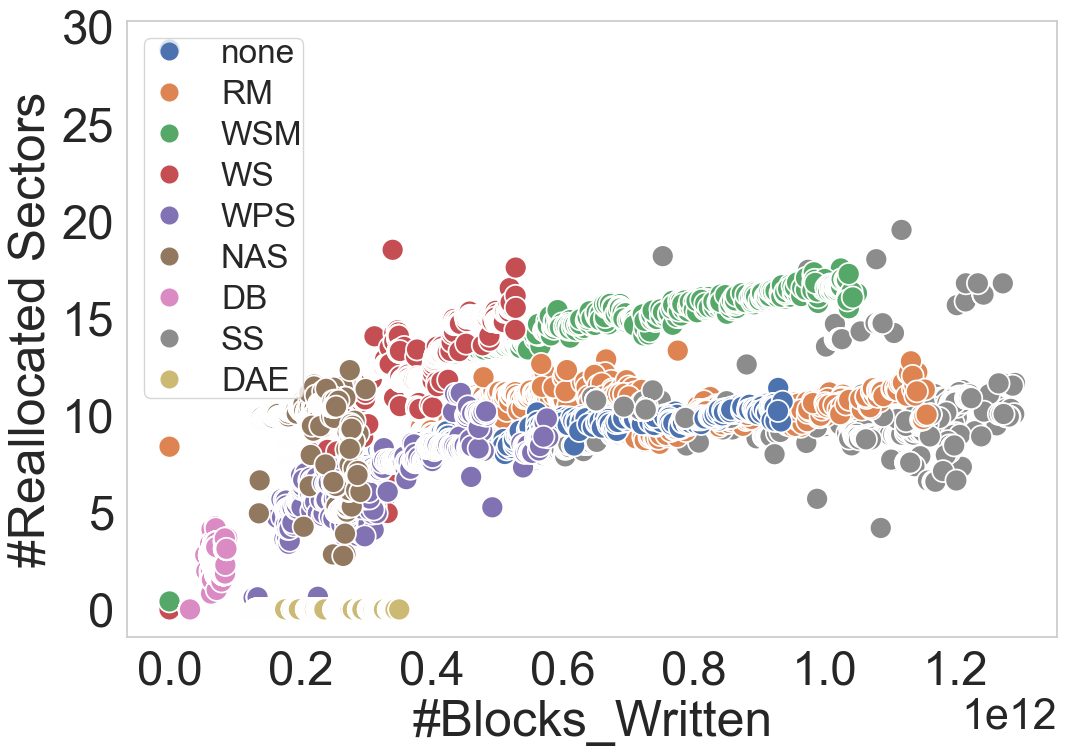

In [932]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Customize plotting parameters
font_size = 36
label_size = 36

plt.figure(figsize=(12, 8))

# Create the scatterplot
graph = sns.scatterplot(
    x="n_b_written", 
    y='r_sectors', 
    palette='deep', 
    hue='app', 
    hue_order=['none', 'RM', 'WSM', 'WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], 
    data=group, 
    s=250  # Scatter point size
)
plt.grid(False)
plt.ylabel('#Reallocated Sectors', fontsize=label_size)
plt.xlabel('#Blocks_Written', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)

# Adjust the font size of the x-axis order of magnitude
ax = plt.gca()  # Get current axis
ax.xaxis.get_offset_text().set_fontsize(22)

# Get unique labels and colors from the scatterplot
handles, labels = graph.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Create custom legend
custom_legends = []
for handle, label in zip(unique_handles, unique_labels):
    if label != '_nolegend_':
        custom_legends.append(mlines.Line2D([], [], color=handle.get_facecolor()[0], marker='o', linestyle='None', markersize=12, label=label))

# Display custom legend
ax.legend(handles=custom_legends, fontsize=24, columnspacing=4, borderpad=0.01, labelspacing=0.3, handlelength=1.5)

ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(label_size-5)

plt.savefig('img/RSWritenBlocks.pdf', bbox_inches='tight')
plt.show()


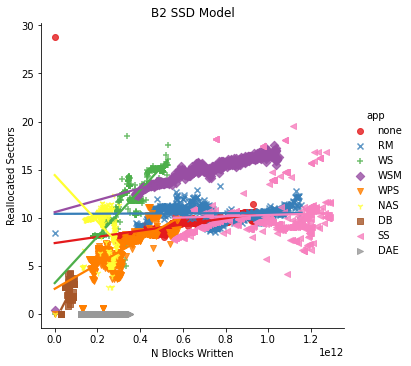

In [8]:
graph = sns.lmplot(x="n_b_written", y="r_sectors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

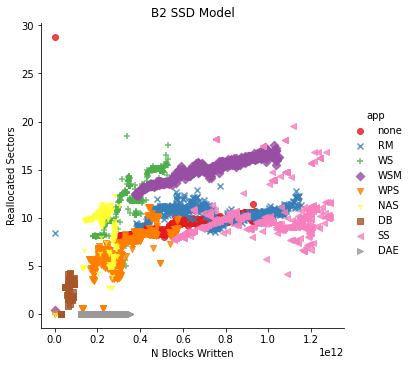

In [9]:
graph = sns.lmplot(x="n_b_written", y="r_sectors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

N Blocks written x Uncorrectable Errors

In [2]:
result.drop(result[result.u_errors < 1].index, inplace=True)

In [3]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Uncorrectable Errors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

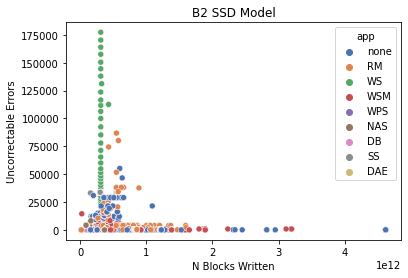

In [5]:
graph = sns.scatterplot(x = "n_b_written", y = 'u_errors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Errors", title ='B2 SSD Model')

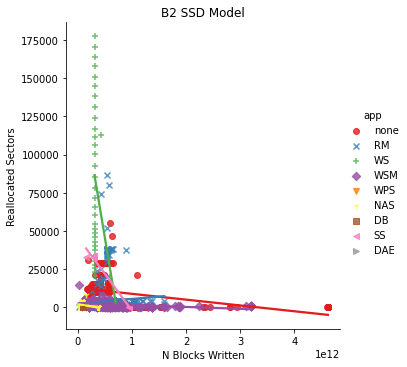

In [6]:
graph = sns.lmplot(x="n_b_written", y="u_errors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Sectors", title ='B2 SSD Model')

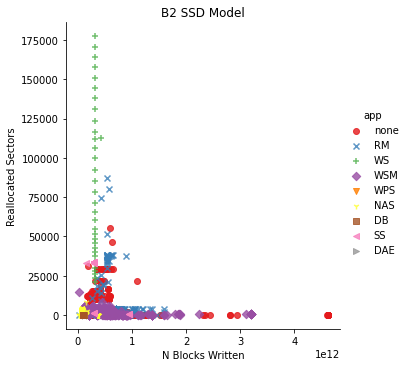

In [7]:
graph = sns.lmplot(x="n_b_written", y="u_errors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Sectors", title ='B2 SSD Model')

In [12]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'u_errors'].mean()

/tmp/ipykernel_81299/2965906918.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'u_errors', 'unc_write'].sum()


In [8]:
result["unc_write"] = result["u_errors"]/(result["n_b_written"]*524288)

[Text(0.5, 0, 'time'),
 Text(0, 0.5, 'Uncorrectable Errors/N Blocks Written'),
 Text(0.5, 1.0, 'B2 SSD Model')]

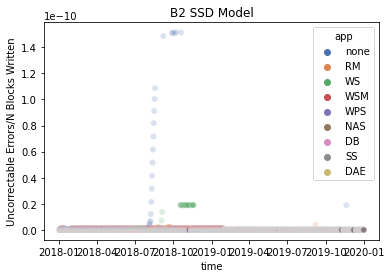

In [13]:
graph = sns.scatterplot(x = "timestamp", y = 'unc_write', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group, alpha=0.2)
graph.set(xlabel ="time", ylabel = "Uncorrectable Errors/N Blocks Written", title ='B2 SSD Model')

N Blocks written x Time

In [2]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written'].mean()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

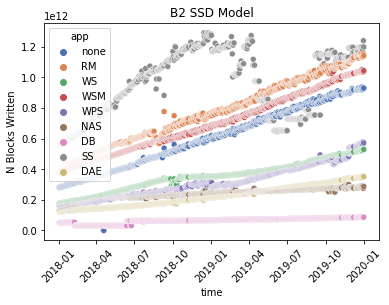

In [9]:
graph = sns.scatterplot(y = "n_b_written", x = 'timestamp', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "N Blocks Written", title ='B2 SSD Model')

#graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
plt.setp(graph.get_xticklabels(), rotation=45)

 SSDs Failure Time

In [9]:
resultSSDFailures['date'] = pd.to_datetime(resultSSDFailures['failure_time'], format='%Y-%m-%d').dt.floor('D')

In [10]:
## group per day (daily mean)

groupSSDFailures = resultSSDFailures.groupby(['date', 'app'], as_index=False)['disk_id'].count()

In [11]:
groupSSDFailures['cum_sum'] = groupSSDFailures.groupby(['app'])['disk_id'].cumsum()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

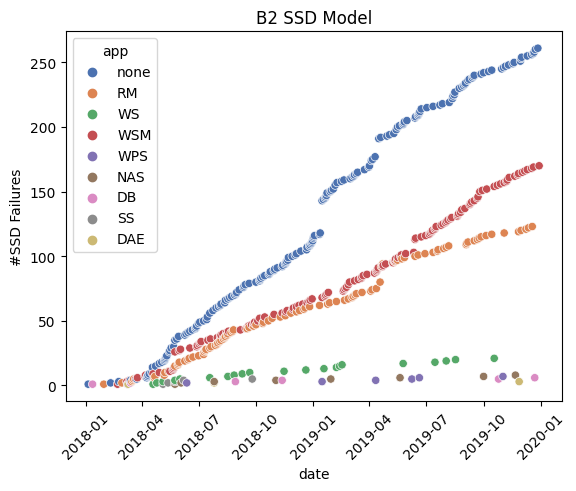

In [12]:
graph = sns.scatterplot(x = "date", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = groupSSDFailures)
graph.set(xlabel ="date", ylabel = "#SSD Failures", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

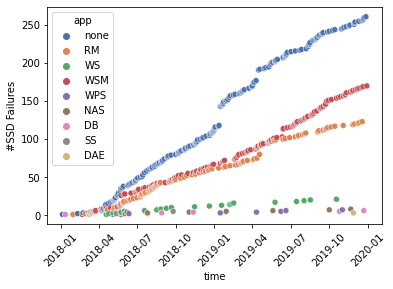

In [43]:
graph = sns.scatterplot(x = "date", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = groupSSDFailures)
graph.set(xlabel ="time", ylabel = "#SSD Failures")
plt.savefig('img/SSDFailuresTimeScatter.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

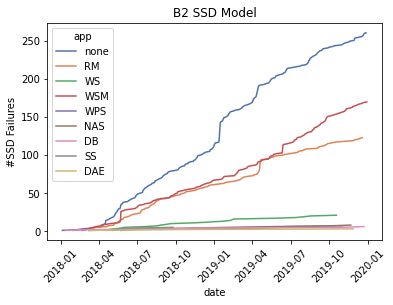

In [95]:
graph = sns.lineplot(x="date", y="cum_sum", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=groupSSDFailures, palette="deep")
graph.set(xlabel ="date", ylabel = "#SSD Failures", title ='B2 SSD Model')

plt.setp(graph.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

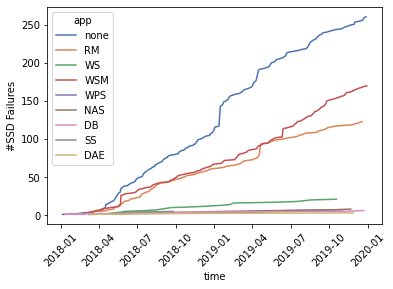

In [44]:
graph = sns.lineplot(x="date", y="cum_sum", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=groupSSDFailures, palette="deep")
graph.set(xlabel ="time", ylabel = "#SSD Failures")
plt.savefig('img/SSDFailuresTimeLine.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


N Blocks written x SSDs Failures

In [768]:
#resultSSDFailures['date'] = pd.to_datetime(resultSSDFailures['failure_time'], format='%Y-%m-%d').dt.floor('D')
resultSSDFailures['date'] = pd.to_datetime(resultSSDFailures['failure_time'], format='%Y-%m-%d %H:%M:%S').dt.floor('D')


In [769]:
## group per day (daily mean)

groupSSDFailures = resultSSDFailures.groupby(['date', 'app'], as_index=False)['disk_id'].count()

In [770]:
groupSSDFailures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     460 non-null    datetime64[ns]
 1   app      460 non-null    object        
 2   disk_id  460 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.9+ KB


In [771]:
groupSSDFailures['cum_sum'] = groupSSDFailures.groupby(['app'])['disk_id'].cumsum()

In [772]:
groupSSDFailures.rename(columns = {'date':'timestamp'}, inplace=True)

In [773]:
# Using "result" because this is the dataset containing written blocks data

result['timestamp'] = pd.to_datetime(result['timestamp'], format='%Y-%m-%d').dt.floor('D')

In [68]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31008712 entries, 0 to 31008711
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Unnamed: 0.1  int64         
 1   Unnamed: 0    int64         
 2   disk_id       float64       
 3   timestamp     datetime64[ns]
 4   r_sectors     float64       
 5   n_b_written   float64       
 6   w_r_d         float64       
 7   model_y       object        
 8   app           object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 2.1+ GB


In [774]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written'].mean()

In [776]:
# smart attributes added to the dataframe in order to utilize it for the ML model

group = result.groupby(['timestamp', 'app'], as_index=False)[['n_b_written','r_sectors','w_r_d']].mean()

In [74]:
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    6436 non-null   datetime64[ns]
 1   app          6436 non-null   object        
 2   n_b_written  6424 non-null   float64       
 3   r_sectors    6424 non-null   float64       
 4   w_r_d        6424 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 251.5+ KB


In [777]:
resultWriteFailure = pd.merge(group, groupSSDFailures, on=['timestamp', 'app'], how='left')

In [76]:
resultWriteFailure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6436 entries, 0 to 6435
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    6436 non-null   datetime64[ns]
 1   app          6436 non-null   object        
 2   n_b_written  6424 non-null   float64       
 3   r_sectors    6424 non-null   float64       
 4   w_r_d        6424 non-null   float64       
 5   disk_id      447 non-null    float64       
 6   cum_sum      447 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 402.2+ KB


In [ ]:
resultWriteFailure.head(30)

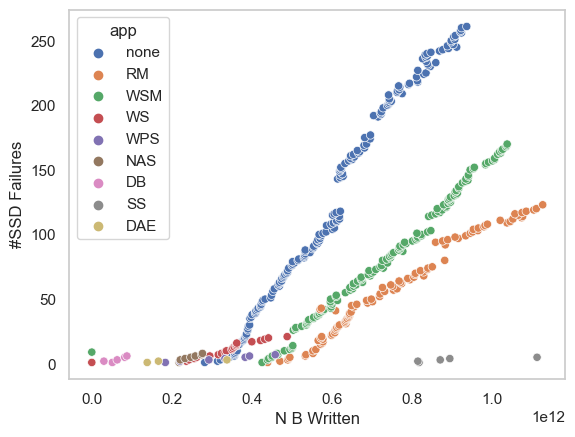

In [778]:
graph = sns.scatterplot(x = "n_b_written", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WSM','WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = resultWriteFailure)
graph.set(xlabel ="N B Written", ylabel = "#SSD Failures")
plt.grid(False)
#plt.setp(graph.get_xticklabels(), rotation=45)

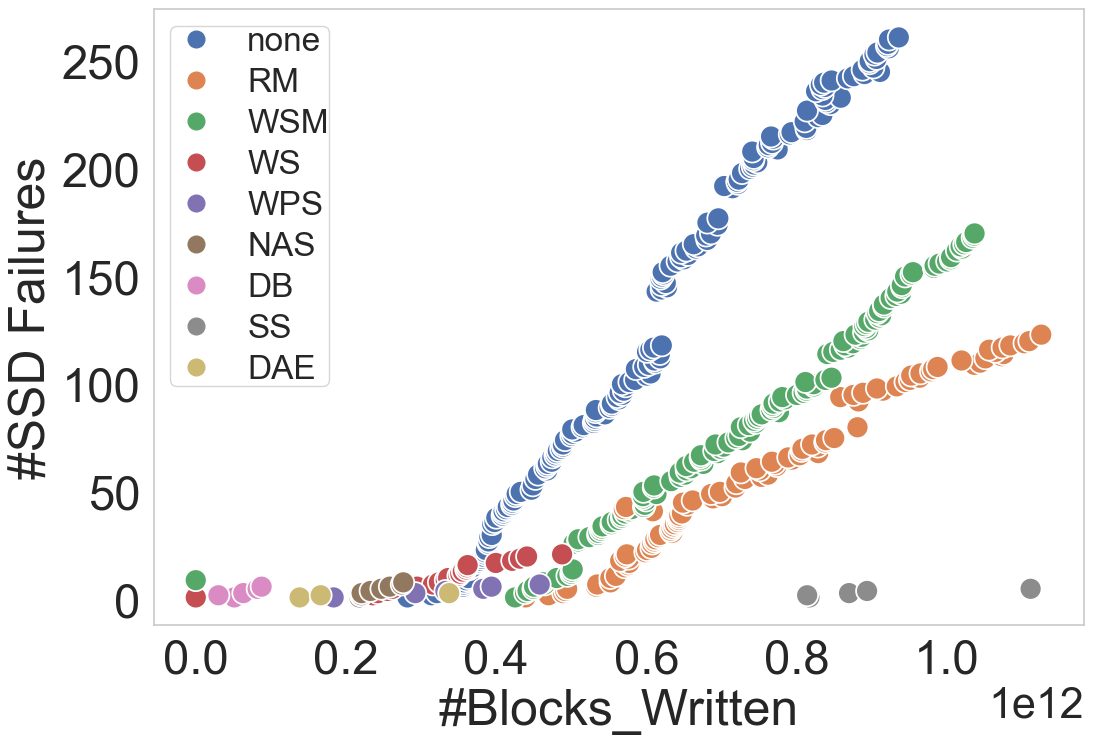

In [930]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Customize plotting parameters
font_size = 36
label_size = 36

plt.figure(figsize=(12, 8))

# Create the scatterplot
graph = sns.scatterplot(
    x="n_b_written", 
    y='cum_sum', 
    palette='deep', 
    hue='app', 
    hue_order=['none', 'RM', 'WSM', 'WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], 
    data=resultWriteFailure, 
    s=250  # Scatter point size
)
plt.grid(False)
plt.ylabel('#SSD Failures', fontsize=label_size)
plt.xlabel('#Blocks_Written', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
#plt.setp(graph.get_xticklabels(), rotation=45)

# Adjust the font size of the x-axis order of magnitude
ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(22)

# Get unique labels and colors from the scatterplot
handles, labels = graph.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Create custom legend
custom_legends = []
for handle, label in zip(unique_handles, unique_labels):
    if label != '_nolegend_':
        custom_legends.append(mlines.Line2D([], [], color=handle.get_facecolor()[0], marker='o', linestyle='None', markersize=12, label=label))

# Display custom legend
ax.legend(handles=custom_legends, fontsize=24, columnspacing=4, borderpad=0.01, labelspacing=0.3, handlelength=1.5)

ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(label_size-5)

# Save the plot
plt.savefig('img/SSDFailuresWritenBlocks.pdf', bbox_inches='tight')
plt.show()


In [20]:
# creating datafram to extract values per app for prediction

resultWriteFailureNone = resultWriteFailure.loc[resultWriteFailure.app.isin(["none"])] 
resultWriteFailureWSM = resultWriteFailure.loc[resultWriteFailure.app.isin(["WSM"])] 
resultWriteFailureRM = resultWriteFailure.loc[resultWriteFailure.app.isin(["RM"])] 

In [21]:
resultWriteFailureNone["disk_id"] = resultWriteFailureNone["disk_id"].fillna(0)
resultWriteFailureWSM["disk_id"] = resultWriteFailureWSM["disk_id"].fillna(0)
resultWriteFailureRM["disk_id"] = resultWriteFailureRM["disk_id"].fillna(0)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3639280157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["disk_id"] = resultWriteFailureNone["disk_id"].fillna(0)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3639280157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM["disk_id"] = resultWriteFailureWSM["disk_id"].fillna(0)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3639280157.py:3: SettingWithCopyWarn

In [40]:
print(len(resultWriteFailureNone),len(resultWriteFailureWSM),len(resultWriteFailureRM))

716 715 716


In [22]:
resultWriteFailureNone['cum_sum'] = resultWriteFailureNone.disk_id.cumsum()
resultWriteFailureWSM['cum_sum'] = resultWriteFailureWSM.disk_id.cumsum()
resultWriteFailureRM['cum_sum'] = resultWriteFailureRM.disk_id.cumsum()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/617921817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone['cum_sum'] = resultWriteFailureNone.disk_id.cumsum()
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/617921817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM['cum_sum'] = resultWriteFailureWSM.disk_id.cumsum()
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/617921817.py:3: SettingWithCopyWarning: 
A val

In [44]:
resultWriteFailureNone.tail(50)

timestamp   app   n_b_written  r_sectors       w_r_d  disk_id  cum_sum
5994 2019-11-03  none  8.969865e+11  10.268541  592.744042      0.0    243.0
6003 2019-11-04  none  8.856287e+11  10.538826  593.507252      0.0    243.0
6012 2019-11-05  none  9.024248e+11  10.477048  601.852433      1.0    244.0
6021 2019-11-06  none  8.831379e+11  10.256302  583.676498      0.0    244.0
6030 2019-11-07  none  8.869173e+11  10.301004  589.042324      0.0    244.0
6039 2019-11-08  none  8.852290e+11  10.265434  586.283940      0.0    244.0
6048 2019-11-13  none  8.928558e+11  10.238930  592.524215      0.0    244.0
6057 2019-11-14  none  8.913520e+11  10.347744  591.961880      0.0    244.0
6066 2019-11-15  none  8.953776e+11  10.091495  594.400616      0.0    244.0
6075 2019-11-16  none  8.934298e+11  10.280072  593.888961      0.0    244.0
6084 2019-11-17  none  8.972870e+11  10.297313  596.647866      1.0    245.0
6093 2019-11-18  none  8.951862e+11  10.135711  593.626769      0.0    245.0
6102 2019-11-19  none  8.974844e+11  10.263955  596.342006      1.0    246.0
6111 2019-11-20  none  8.966693e+11  10.205178  595.563186      0.0    246.0
6120 2019-11-21  none  8.968706e+11  10.209302  595.624055      0.0    246.0
6129 2019-11-22  none  8.992024e+11  10.250680  597.380318      0.0    246.0
6138 2019-11-23  none  8.962424e+11  10.296094  593.159845      0.0    246.0
6147 2019-11-24  none  9.011148e+11  10.238701  598.909897      0.0    246.0
6156 2019-11-25  none  9.045524e+11  10.449909  600.120944      0.0    246.0
6165 2019-11-26  none  8.984850e+11  10.181747  596.976703      0.0    246.0
6174 2019-11-27  none  8.999063e+11  10.195009  598.128963      0.0    246.0
6183 2019-11-28  none  8.980666e+11  10.054568  595.763014      0.0    246.0
6192 2019-11-29  none  9.063712e+11  10.111589  606.906797      1.0    247.0
6201 2019-11-30  none  9.038413e+11  10.126310  605.228100      2.0    249.0
6210 2019-12-01  none  9.077149e+11  10.288429  607.584504      1.0    250.0
6219 2019-12-02  none  9.119839e+11  10.156977  613.852331      0.0    250.0
6228 2019-12-03  none  9.125031e+11  10.124880  613.734482      0.0    250.0
6237 2019-12-04  none  9.272483e+11  10.279223  627.996499      0.0    250.0
6246 2019-12-05  none  9.170129e+11  10.334876  619.672141      0.0    250.0
6255 2019-12-06  none  9.213968e+11  10.351909  619.665709      0.0    250.0
6264 2019-12-07  none  9.181591e+11  10.315277  615.429755      0.0    250.0
6273 2019-12-13  none  9.204182e+11  10.376555  615.258498      0.0    250.0
6282 2019-12-14  none  9.211798e+11  10.376223  615.854488      0.0    250.0
6291 2019-12-15  none  9.220057e+11  10.378177  616.496548      0.0    250.0
6300 2019-12-16  none  9.210776e+11  10.280818  614.358839      0.0    250.0
6309 2019-12-17  none  9.229672e+11  10.294972  615.509559      1.0    251.0
6318 2019-12-18  none  9.180605e+11  10.544188  611.742176      0.0    251.0
6327 2019-12-19  none  9.294506e+11  11.406527  619.545763      0.0    251.0
6336 2019-12-20  none  9.202860e+11  10.559591  613.605982      1.0    252.0
6345 2019-12-21  none  9.215400e+11  10.568423  614.588718      1.0    253.0
6354 2019-12-22  none  9.225263e+11  10.573636  615.332761      0.0    253.0
6363 2019-12-23  none  9.232198e+11  10.579749  615.986559      2.0    255.0
6372 2019-12-24  none  9.240353e+11  10.438439  616.440009      0.0    255.0
6381 2019-12-25  none  9.221559e+11  10.445325  616.128571      0.0    255.0
6390 2019-12-26  none  9.239867e+11  10.391712  616.414552      0.0    255.0
6399 2019-12-27  none  9.362144e+11  10.698976  631.708087      1.0    256.0
6408 2019-12-28  none  9.194166e+11   9.735392  615.260855      0.0    256.0
6417 2019-12-29  none  9.253141e+11   9.701389  617.181583      0.0    256.0
6426 2019-12-30  none  9.337833e+11   9.679375  617.629916      0.0    256.0
6435 2019-12-31  none  9.290646e+11  10.218057  619.479622      0.0    256.0

In [23]:
#dynamic mttf - app(None)

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureNone.size

resultWriteFailureNone["AFR_SSDs"] = " "
resultWriteFailureNone["mttf_SDDs"] = " "
resultWriteFailureNone["MTTFMes_SSDs"] = " "
resultWriteFailureNone["MTTFDia_SSDs"] = " "
resultWriteFailureNone["MTTFTest_SSDs"] = " "

for i in range(0, len(resultWriteFailureNone)): 
    

    numberFailedSSDs = resultWriteFailureNone.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureNone.timestamp.iloc[i] - resultWriteFailureNone.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(15015-resultWriteFailureNone.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
        MTTFTest_SSDs = ((resultWriteFailureNone.timestamp.iloc[i] - resultWriteFailureNone.timestamp.iloc[1]).days)/numberFailedSSDs
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0
        MTTFTest_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs
    
    # converting to string for saving as a csv
    #resultWriteFailureNone.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureNone.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureNone.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureNone.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','
    #resultWriteFailureNone.MTTFTest_SSDs.iloc[i] = str(MTTFTest_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureNone.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureNone.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureNone.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureNone.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs
    resultWriteFailureNone.MTTFTest_SSDs.iloc[i] = MTTFTest_SSDs

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/4023182073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["AFR_SSDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/4023182073.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["mttf_SDDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/4023182073.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [24]:
resultWriteFailureNone.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2093885582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone.fillna(0, inplace=True)


In [49]:
resultWriteFailureNone.tail(100)

timestamp   app   n_b_written  r_sectors       w_r_d  disk_id  cum_sum  \
5544 2019-09-14  none  8.364111e+11  10.010992  554.223723      0.0    235.0   
5553 2019-09-15  none  8.324314e+11  10.039867  549.618893      1.0    236.0   
5562 2019-09-16  none  8.368280e+11  10.134703  552.678823      1.0    237.0   
5571 2019-09-17  none  8.753159e+11  10.465155  578.749832      0.0    237.0   
5580 2019-09-18  none  8.645079e+11  10.116243  571.376854      0.0    237.0   
...         ...   ...           ...        ...         ...      ...      ...   
6399 2019-12-27  none  9.362144e+11  10.698976  631.708087      1.0    256.0   
6408 2019-12-28  none  9.194166e+11   9.735392  615.260855      0.0    256.0   
6417 2019-12-29  none  9.253141e+11   9.701389  617.181583      0.0    256.0   
6426 2019-12-30  none  9.337833e+11   9.679375  617.629916      0.0    256.0   
6435 2019-12-31  none  9.290646e+11  10.218057  619.479622      0.0    256.0   

      AFR_SSDs       mttf_SDDs MTTFMes_SSDs  MTTFDia_SSDs MTTFTest_SSDs  
5544  0.009232   948855.035461  1299.801418  39535.626478      2.638298  
5553  0.009257   946358.389831  1296.381356  39431.599576      2.631356  
5562  0.009281   943818.950774  1292.902672  39325.789616      2.624473  
5571  0.009267   945272.379747  1294.893671  39386.349156      2.628692  
5580  0.009252   946789.670886  1296.972152   39449.56962      2.632911  
...        ...             ...          ...           ...           ...  
6399  0.008624     1015749.375    1391.4375  42322.890625      2.828125  
6408  0.008613   1017083.43099  1393.264974  42378.476291      2.832031  
6417  0.008601  1018486.304687  1395.186719  42436.929362      2.835938  
6426  0.008589  1019889.178385  1397.108464  42495.382433      2.839844  
6435  0.008577  1021292.052083  1399.030208  42553.835503       2.84375  

[100 rows x 12 columns]

In [51]:
resultWriteFailureNone.head()


timestamp   app   n_b_written  r_sectors       w_r_d  disk_id  cum_sum  \
2  2018-01-01  none  0.000000e+00   0.000000    0.000000      0.0      0.0   
11 2018-01-02  none  0.000000e+00   0.000000    0.000000      0.0      0.0   
20 2018-01-03  none  2.812087e+11   7.884492  150.180418      0.0      0.0   
29 2018-01-04  none  2.816459e+11   7.886817  150.485215      0.0      0.0   
38 2018-01-05  none  2.819011e+11   7.897597  150.971222      1.0      1.0   

    AFR_SSDs  mttf_SDDs MTTFMes_SSDs MTTFDia_SSDs MTTFTest_SSDs  
2          0          0            0            0             0  
11         0          0            0            0             0  
20         0          0            0            0             0  
29         0          0            0            0             0  
38  0.007992  1096095.0       1501.5    45670.625           3.0

In [56]:
# saving dataset 

resultWriteFailureNone.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'None' + '.csv')

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3495951188.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureNone)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

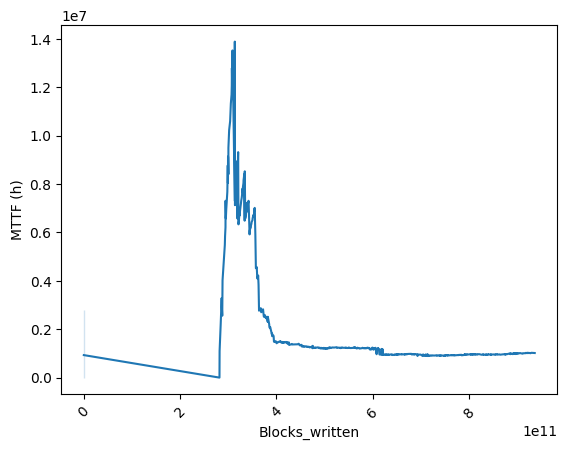

In [25]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureNone)
graph.set(xlabel ="Blocks_written", ylabel = "MTTF (h)")
#plt.setp(graph.get_xticklabels(), rotation=45)
plt.savefig('img/mttfNBWrittenNone.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_3973/410778016.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureNone)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'AFR')]

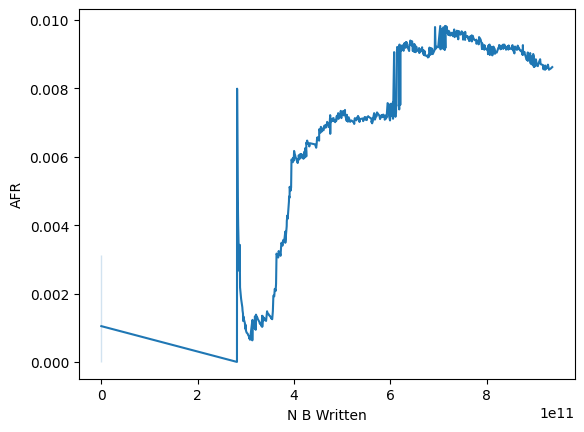

In [48]:
graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureNone)
graph.set(xlabel ="N B Written", ylabel = "AFR")
#plt.setp(graph.get_xticklabels(), rotation=45)

In [44]:
#In case should necessary drop out some values (e.g., weird patterns)

resultWriteFailureNone.drop(resultWriteFailureNone[resultWriteFailureNone.n_b_written > (4.5*(10**11))].index, inplace=True)

In [45]:
resultWriteFailureNone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     198 non-null    int64  
 1   timestamp      198 non-null    object 
 2   app            198 non-null    object 
 3   n_b_written    198 non-null    float64
 4   r_sectors      198 non-null    float64
 5   w_r_d          198 non-null    float64
 6   disk_id        198 non-null    float64
 7   cum_sum        198 non-null    float64
 8   AFR_SSDs       198 non-null    float64
 9   mttf_SDDs      198 non-null    float64
 10  MTTFMes_SSDs   198 non-null    float64
 11  MTTFDia_SSDs   198 non-null    float64
 12  MTTFTest_SSDs  198 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.2+ KB


In [26]:
#dynamic mttf - RM

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureRM.size

resultWriteFailureRM["AFR_SSDs"] = " "
resultWriteFailureRM["mttf_SDDs"] = " "
resultWriteFailureRM["MTTFMes_SSDs"] = " "
resultWriteFailureRM["MTTFDia_SSDs"] = " "

for i in range(0, len(resultWriteFailureRM)): 
    

    numberFailedSSDs = resultWriteFailureRM.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureRM.timestamp.iloc[i] - resultWriteFailureRM.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(8015-resultWriteFailureRM.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs

    # converting to string for saving as a csv
    #resultWriteFailureRM.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureRM.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureRM.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureRM.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureRM.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureRM.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureRM.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureRM.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3960862930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM["AFR_SSDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3960862930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM["mttf_SDDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3960862930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [115]:
resultWriteFailureRM.head()

timestamp app   n_b_written  disk_id  cum_sum AFR_SSDs mttf_SDDs  \
0  2018-01-01  RM           NaN      0.0      0.0        0         0   
6  2018-01-02  RM           NaN      0.0      0.0        0         0   
15 2018-01-03  RM  3.824297e+11      0.0      0.0        0         0   
24 2018-01-04  RM  3.838148e+11      0.0      0.0        0         0   
33 2018-01-05  RM  3.856599e+11      0.0      0.0        0         0   

   MTTFMes_SSDs MTTFDia_SSDs  
0             0            0  
6             0            0  
15            0            0  
24            0            0  
33            0            0

In [27]:
resultWriteFailureRM.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/1168983232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM.fillna(0, inplace=True)


In [67]:
# saving dataset 

resultWriteFailureRM.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'RM' + '.csv')

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_71866/3718903493.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureRM)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

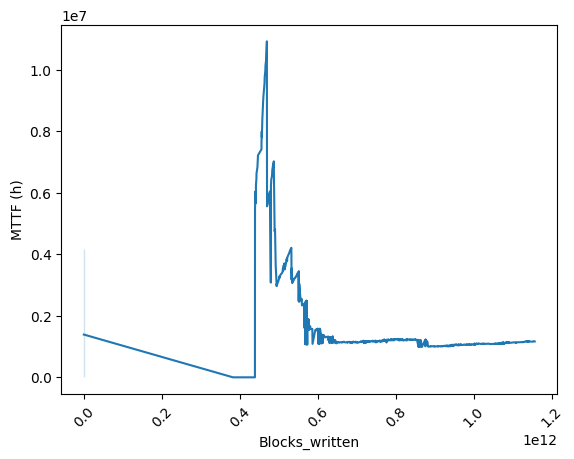

In [30]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureRM)
graph.set(xlabel ="Blocks_written", ylabel = "MTTF (h)")
plt.savefig('img/mttfNBWrittenRM.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_3973/3467782973.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureRM)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'AFR')]

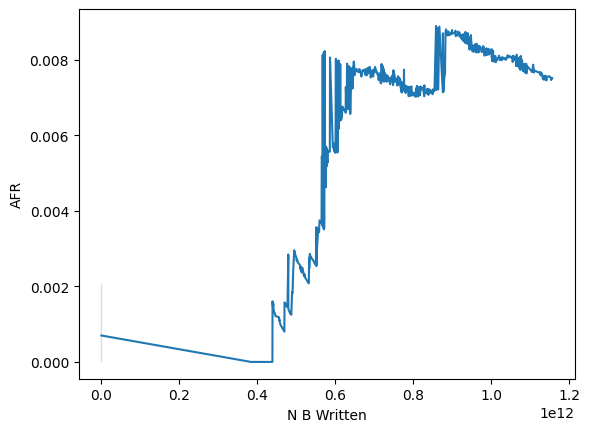

In [33]:
graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureRM)
graph.set(xlabel ="N B Written", ylabel = "AFR")

In [ ]:
#In case should necessary drop out some values (e.g., weird patterns)

resultWriteFailureRM.drop(resultWriteFailureRM[resultWriteFailureRM.n_b_written > (4.5*(10**11))].index, inplace=True)

In [28]:
#dynamic mttf - WSM

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureWSM.size

resultWriteFailureWSM["AFR_SSDs"] = " "
resultWriteFailureWSM["mttf_SDDs"] = " "
resultWriteFailureWSM["MTTFMes_SSDs"] = " "
resultWriteFailureWSM["MTTFDia_SSDs"] = " "

for i in range(0, len(resultWriteFailureWSM)): 
    

    numberFailedSSDs = resultWriteFailureWSM.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureWSM.timestamp.iloc[i] - resultWriteFailureWSM.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(18036-resultWriteFailureWSM.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs

    # converting to string for saving as a csv
    #resultWriteFailureWSM.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureWSM.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureWSM.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureWSM.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureWSM.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureWSM.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureWSM.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureWSM.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2647751264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM["AFR_SSDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2647751264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM["mttf_SDDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2647751264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [29]:
resultWriteFailureWSM.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/264770996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM.fillna(0, inplace=True)


In [66]:
# saving dataset 

resultWriteFailureWSM.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'WSM' + '.csv')

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2958807828.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureWSM)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

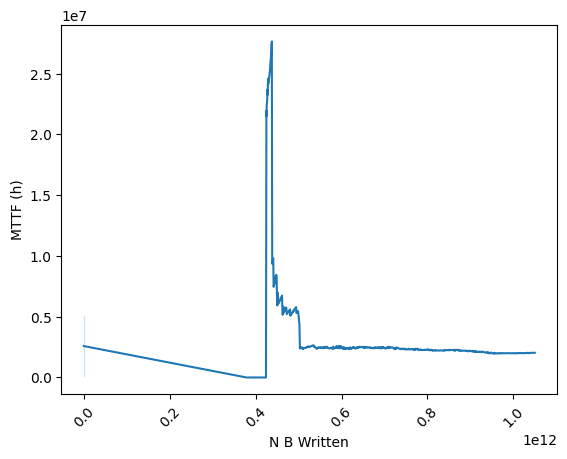

In [30]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureWSM)
graph.set(xlabel ="N B Written", ylabel = "MTTF (h)")
plt.savefig('img/mttfNBWrittenWSM.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_3973/3959762646.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureWSM)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'AFR')]

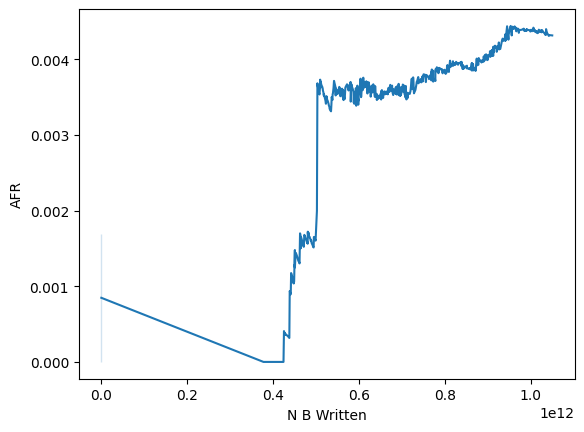

In [97]:
graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureWSM)
graph.set(xlabel ="N B Written", ylabel = "AFR")

In [89]:
#In case should necessary drop out some values (e.g., weird patterns)

resultWriteFailureWSM.drop(resultWriteFailureWSM[resultWriteFailureWSM.n_b_written > (0.45*(10**12))].index, inplace=True)
resultWriteFailureWSM.drop(resultWriteFailureWSM[resultWriteFailureWSM.n_b_written < (0.42*(10**12))].index, inplace=True)

In [69]:
print(len(resultWriteFailureNone),len(resultWriteFailureWSM),len(resultWriteFailureRM))

716 715 716


In [21]:
# Loading extracted metrics datasets for training the models separatedly
resultWriteFailureNone = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'None' + '.csv')
resultWriteFailureRM = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'RM' + '.csv')
resultWriteFailureWSM = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'WSM' + '.csv')

In [83]:
resultWriteFailureNone.head()

timestamp   app   n_b_written  r_sectors       w_r_d  disk_id  cum_sum  \
2  2018-01-01  none  0.000000e+00   0.000000    0.000000      0.0      0.0   
11 2018-01-02  none  0.000000e+00   0.000000    0.000000      0.0      0.0   
20 2018-01-03  none  2.812087e+11   7.884492  150.180418      0.0      0.0   
29 2018-01-04  none  2.816459e+11   7.886817  150.485215      0.0      0.0   
38 2018-01-05  none  2.819011e+11   7.897597  150.971222      1.0      1.0   

    AFR_SSDs  mttf_SDDs MTTFMes_SSDs MTTFDia_SSDs MTTFTest_SSDs  
2          0          0            0            0             0  
11         0          0            0            0             0  
20         0          0            0            0             0  
29         0          0            0            0             0  
38  0.007992  1096095.0       1501.5    45670.625           3.0

Epoch 1/10
16/16 - 1s - loss: 0.0694 - val_loss: 0.0045 - 783ms/epoch - 49ms/step
Epoch 2/10
16/16 - 0s - loss: 0.0017 - val_loss: 1.3940e-04 - 28ms/epoch - 2ms/step
Epoch 3/10
16/16 - 0s - loss: 6.6642e-05 - val_loss: 3.0560e-05 - 28ms/epoch - 2ms/step
Epoch 4/10
16/16 - 0s - loss: 1.7196e-05 - val_loss: 6.8947e-06 - 27ms/epoch - 2ms/step
Epoch 5/10
16/16 - 0s - loss: 7.6323e-06 - val_loss: 6.9168e-06 - 29ms/epoch - 2ms/step
Epoch 6/10
16/16 - 0s - loss: 5.2612e-06 - val_loss: 3.9529e-06 - 26ms/epoch - 2ms/step
Epoch 7/10
16/16 - 0s - loss: 2.9777e-06 - val_loss: 1.8738e-06 - 25ms/epoch - 2ms/step
Epoch 8/10
16/16 - 0s - loss: 1.4808e-06 - val_loss: 1.3832e-06 - 25ms/epoch - 2ms/step
Epoch 9/10
16/16 - 0s - loss: 1.4133e-06 - val_loss: 2.2482e-06 - 25ms/epoch - 2ms/step
Epoch 10/10
16/16 - 0s - loss: 1.7368e-06 - val_loss: 1.9059e-06 - 26ms/epoch - 2ms/step
4/4 [==============================] - 0s 774us/step
Length of models array: 3
Length of mae_scores array: 6
Length of mse_scores

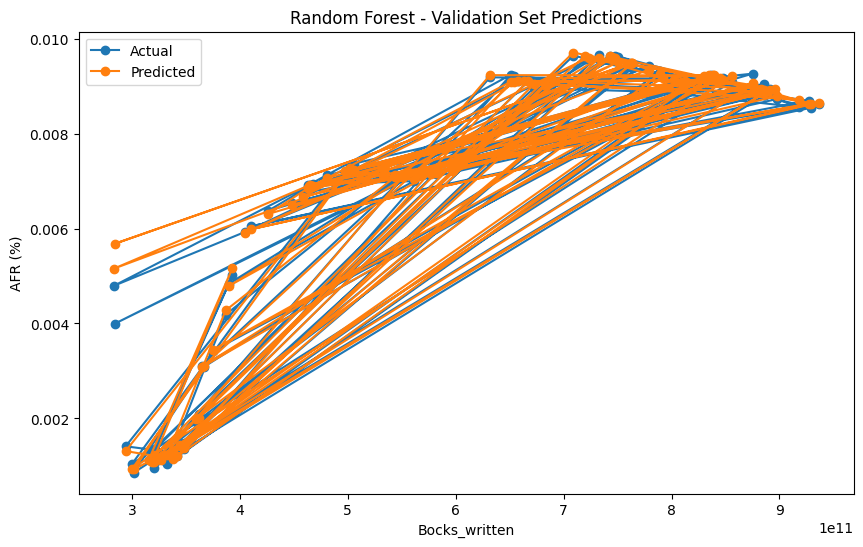

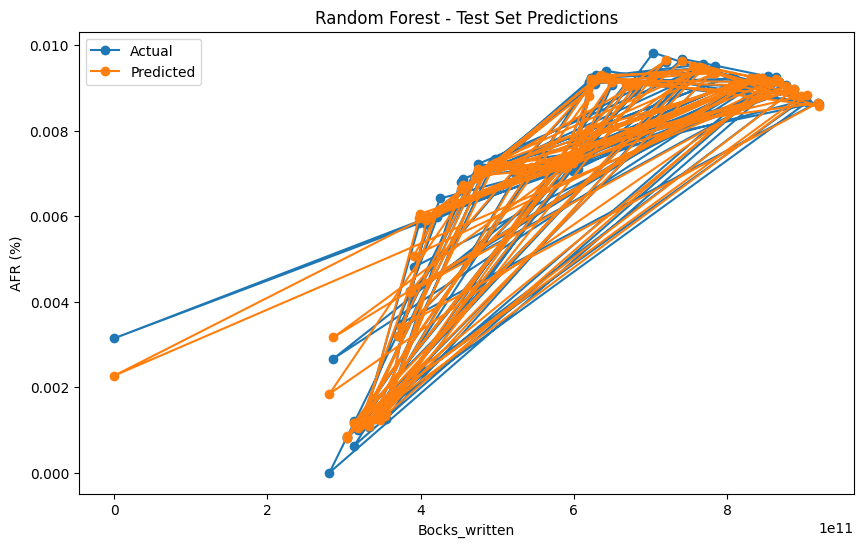

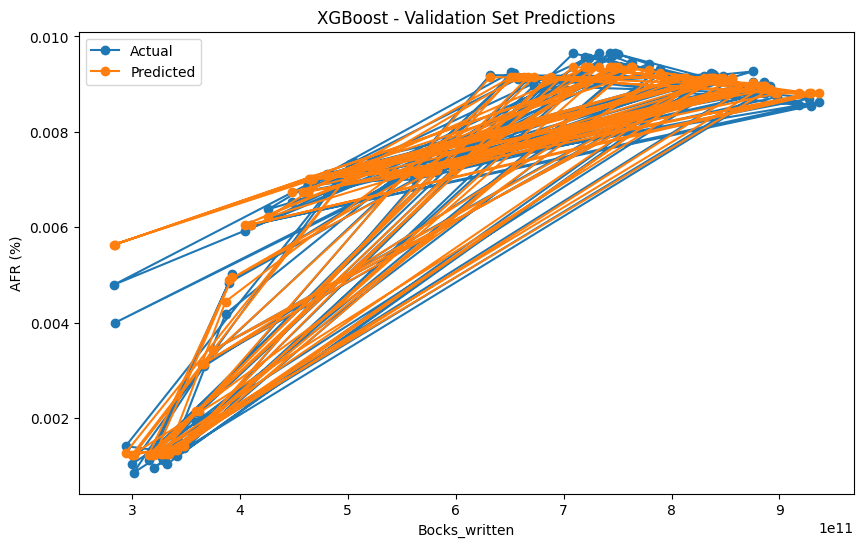

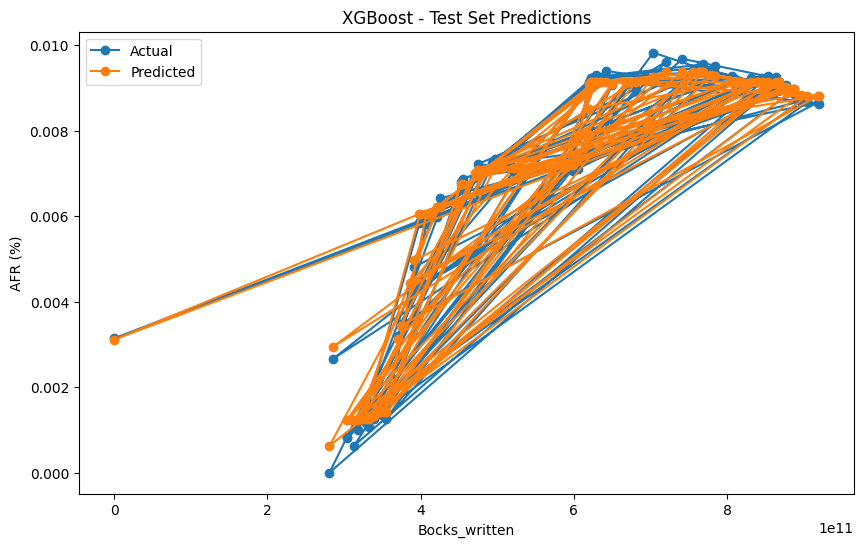

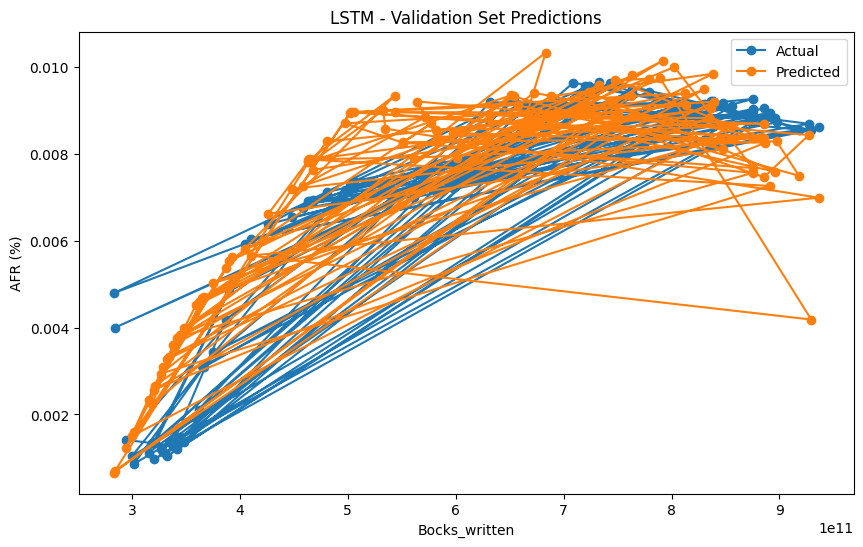

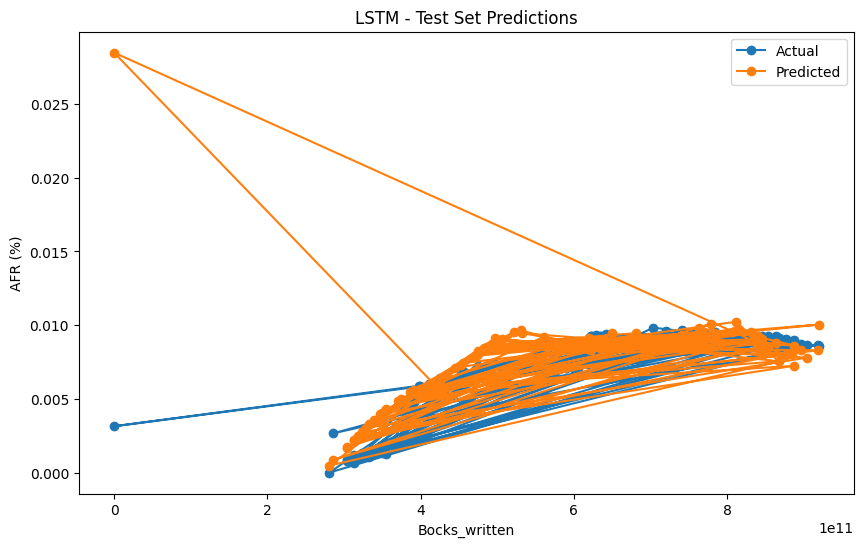

Random Forest Equation:
n_b_written * 0.3845 + r_sectors * 0.0066 + w_r_d * 0.6090 + 
XGBoost Equation:
n_b_written * 0.3946 + r_sectors * 0.0913 + w_r_d * 0.5141 + 
LSTM Model Summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
## Models training/ fitting / validation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureNone

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []
r2_scores = []  # Added for R-squared

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Print lengths of arrays for debugging
print("Length of models array:", len(models))
print("Length of mae_scores array:", len(mae_scores))
print("Length of mse_scores array:", len(mse_scores))
print("Length of r2_scores array:", len(r2_scores))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores) == len(r2_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse, r2 in zip(models * 3, mae_scores, mse_scores, r2_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})
    results_list.append({'Model': model, 'Metric': 'R-squared', 'Score': r2})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersNone.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()


Epoch 1/10
16/16 - 1s - loss: 0.0595 - val_loss: 4.5896e-04 - 844ms/epoch - 53ms/step
Epoch 2/10
16/16 - 0s - loss: 8.6718e-04 - val_loss: 5.7570e-04 - 31ms/epoch - 2ms/step
Epoch 3/10
16/16 - 0s - loss: 2.9048e-04 - val_loss: 4.7218e-05 - 27ms/epoch - 2ms/step
Epoch 4/10
16/16 - 0s - loss: 4.0012e-05 - val_loss: 3.8677e-05 - 26ms/epoch - 2ms/step
Epoch 5/10
16/16 - 0s - loss: 1.4854e-05 - val_loss: 1.1095e-05 - 26ms/epoch - 2ms/step
Epoch 6/10
16/16 - 0s - loss: 7.3690e-06 - val_loss: 7.4379e-06 - 26ms/epoch - 2ms/step
Epoch 7/10
16/16 - 0s - loss: 6.1626e-06 - val_loss: 6.8484e-06 - 24ms/epoch - 2ms/step
Epoch 8/10
16/16 - 0s - loss: 4.8612e-06 - val_loss: 3.3635e-06 - 26ms/epoch - 2ms/step
Epoch 9/10
16/16 - 0s - loss: 2.1181e-06 - val_loss: 1.1492e-06 - 25ms/epoch - 2ms/step
Epoch 10/10
16/16 - 0s - loss: 1.3789e-06 - val_loss: 1.0617e-06 - 27ms/epoch - 2ms/step
4/4 [==============================] - 0s 1ms/step
Length of models array: 3
Length of mae_scores array: 6
Length of mse_

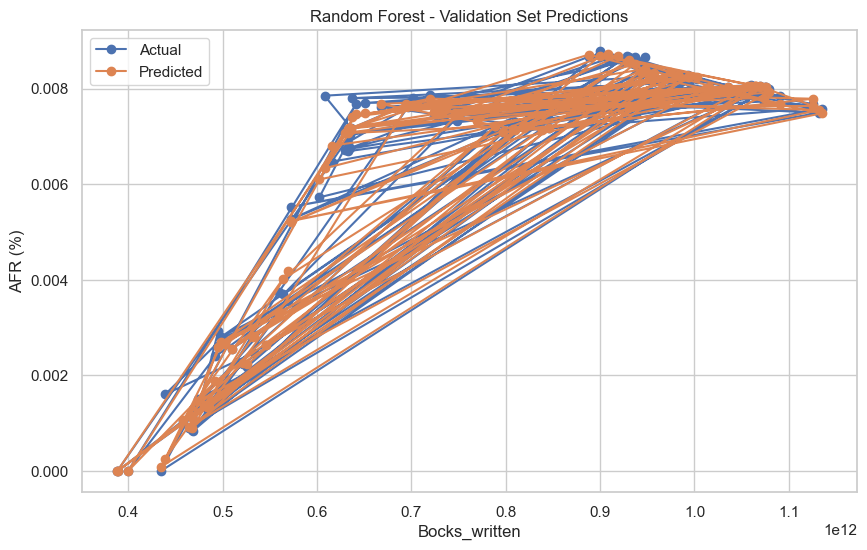

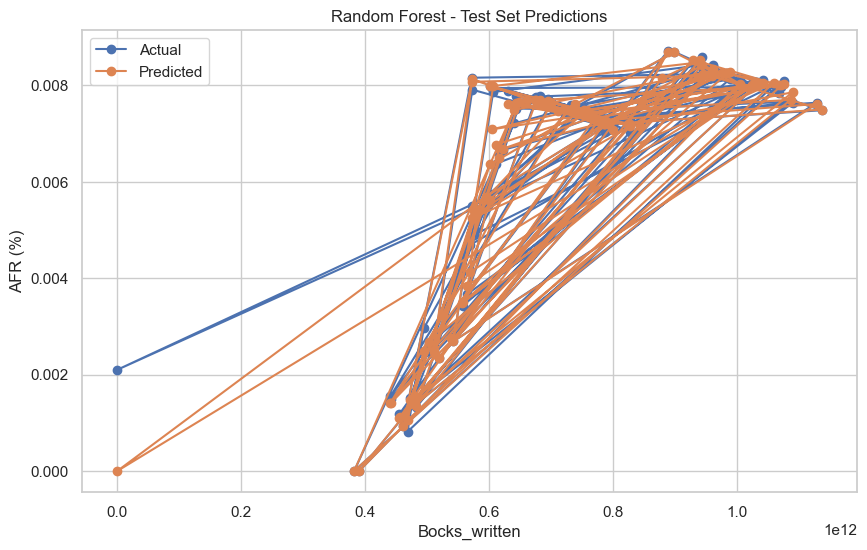

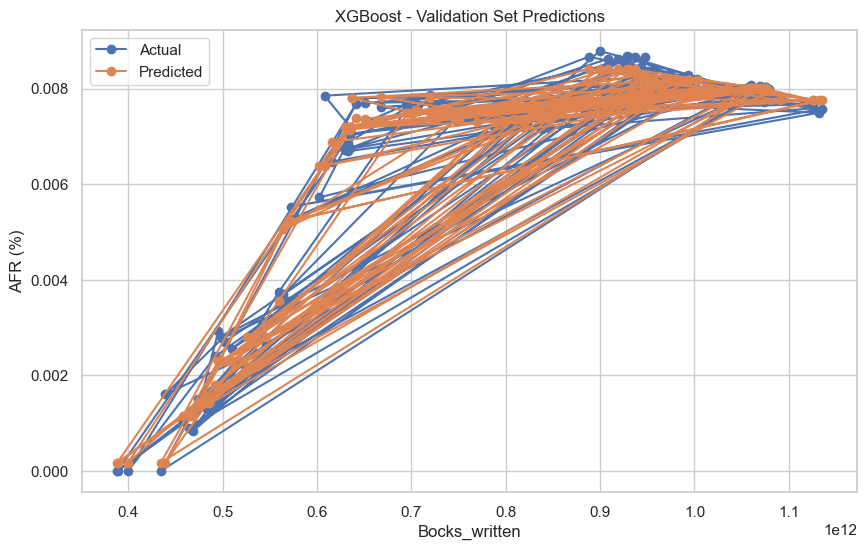

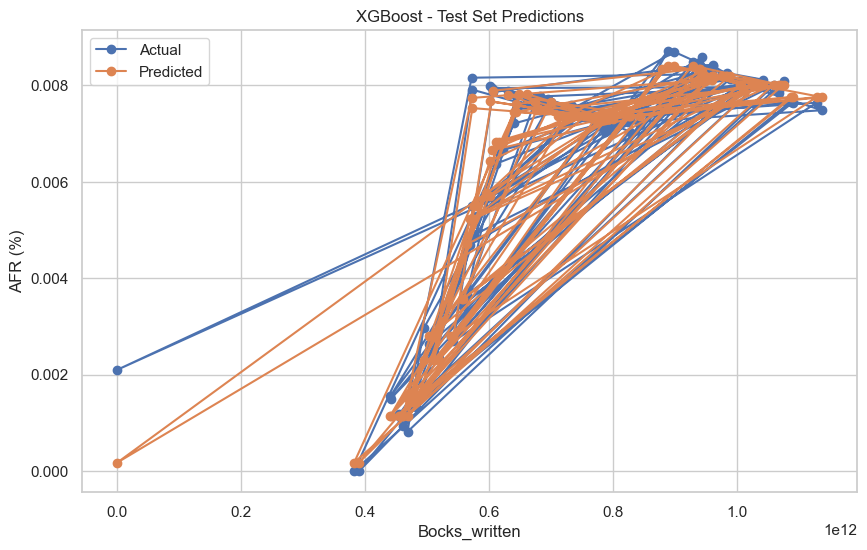

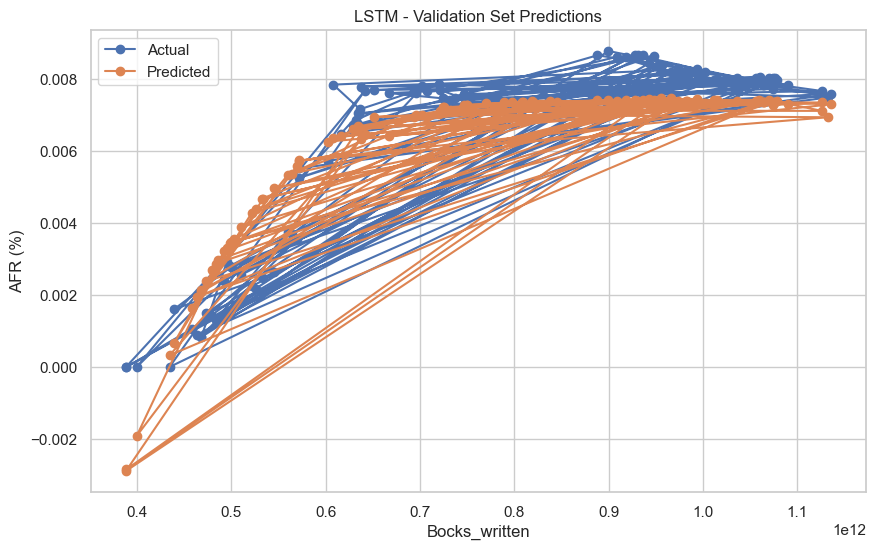

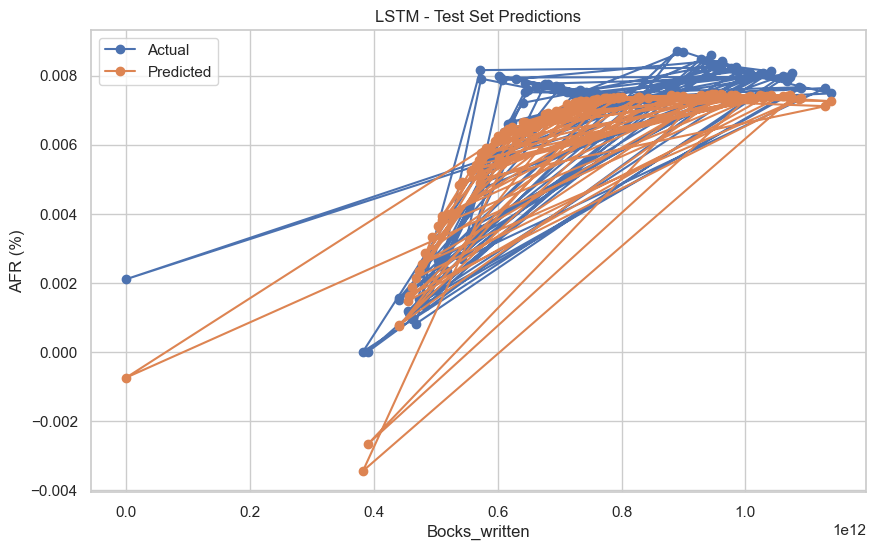

Random Forest Equation:
n_b_written * 0.9252 + r_sectors * 0.0179 + w_r_d * 0.0569 + 
XGBoost Equation:
n_b_written * 0.8796 + r_sectors * 0.0760 + w_r_d * 0.0444 + 
LSTM Model Summary:
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 50)                10400     
                                                                 
 dense_33 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [236]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureRM

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []
r2_scores = []  # Added for R-squared

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Print lengths of arrays for debugging
print("Length of models array:", len(models))
print("Length of mae_scores array:", len(mae_scores))
print("Length of mse_scores array:", len(mse_scores))
print("Length of r2_scores array:", len(r2_scores))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores) == len(r2_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse, r2 in zip(models * 3, mae_scores, mse_scores, r2_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})
    results_list.append({'Model': model, 'Metric': 'R-squared', 'Score': r2})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersRM.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()


Epoch 1/10
16/16 - 1s - loss: 0.0108 - val_loss: 0.0028 - 899ms/epoch - 56ms/step
Epoch 2/10
16/16 - 0s - loss: 5.2753e-04 - val_loss: 5.2249e-05 - 26ms/epoch - 2ms/step
Epoch 3/10
16/16 - 0s - loss: 5.1374e-05 - val_loss: 8.6456e-06 - 28ms/epoch - 2ms/step
Epoch 4/10
16/16 - 0s - loss: 6.7088e-06 - val_loss: 4.6001e-06 - 27ms/epoch - 2ms/step
Epoch 5/10
16/16 - 0s - loss: 4.6357e-06 - val_loss: 1.8960e-06 - 26ms/epoch - 2ms/step
Epoch 6/10
16/16 - 0s - loss: 1.5749e-06 - val_loss: 5.9552e-07 - 27ms/epoch - 2ms/step
Epoch 7/10
16/16 - 0s - loss: 9.2578e-07 - val_loss: 3.7137e-06 - 25ms/epoch - 2ms/step
Epoch 8/10
16/16 - 0s - loss: 1.6630e-06 - val_loss: 2.1879e-06 - 26ms/epoch - 2ms/step
Epoch 9/10
16/16 - 0s - loss: 8.2668e-07 - val_loss: 7.1475e-07 - 25ms/epoch - 2ms/step
Epoch 10/10
16/16 - 0s - loss: 6.1278e-07 - val_loss: 2.0315e-07 - 25ms/epoch - 2ms/step
4/4 [==============================] - 0s 987us/step
Length of models array: 3
Length of mae_scores array: 6
Length of mse_sc

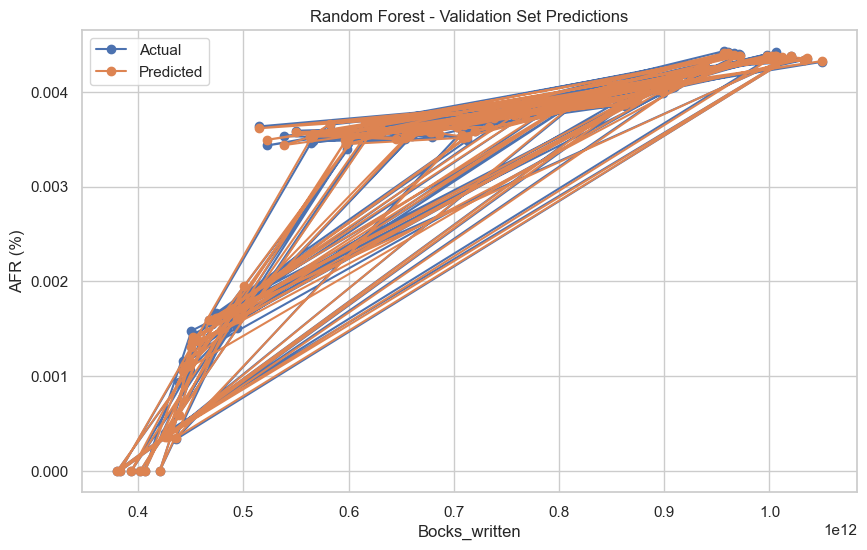

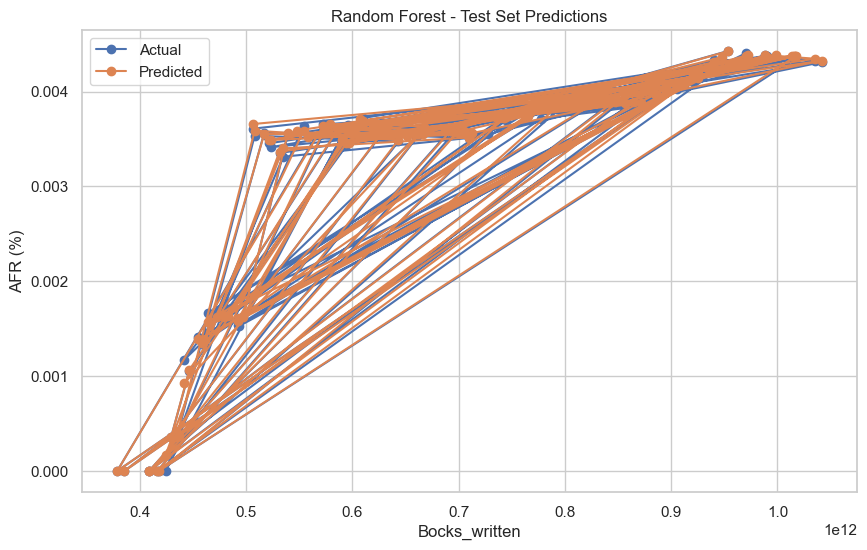

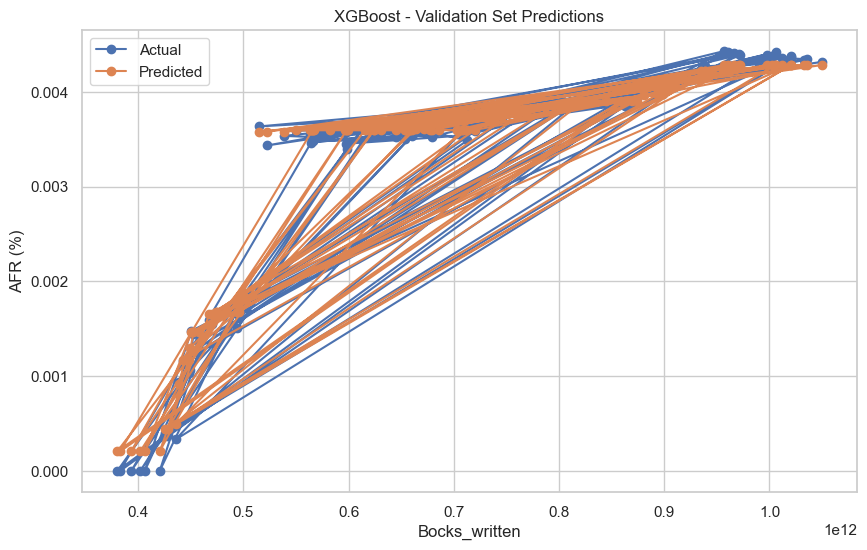

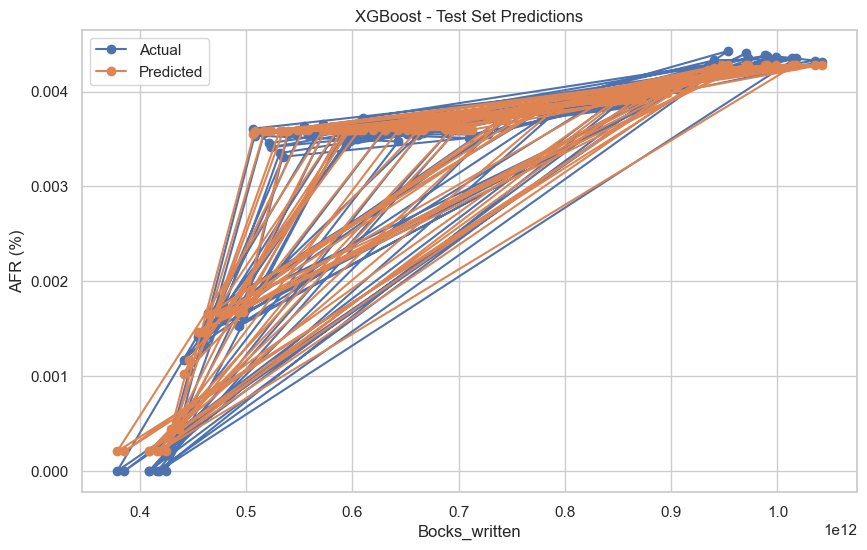

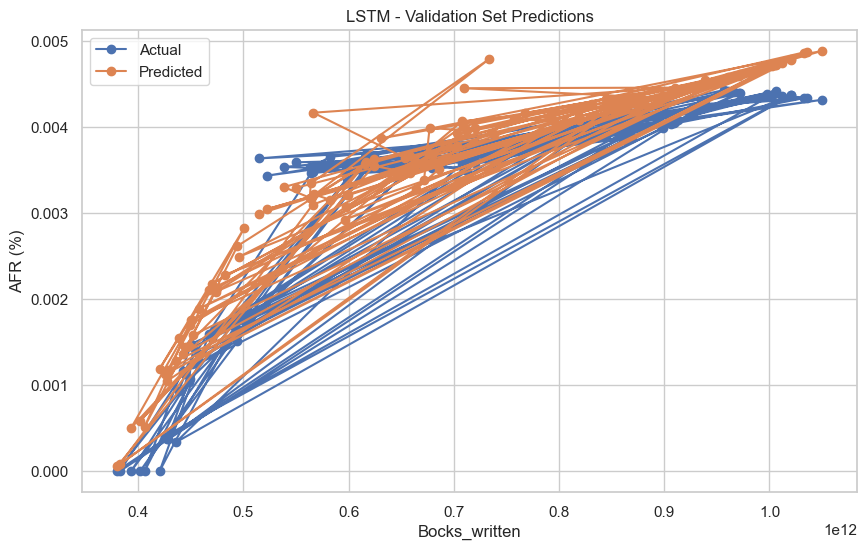

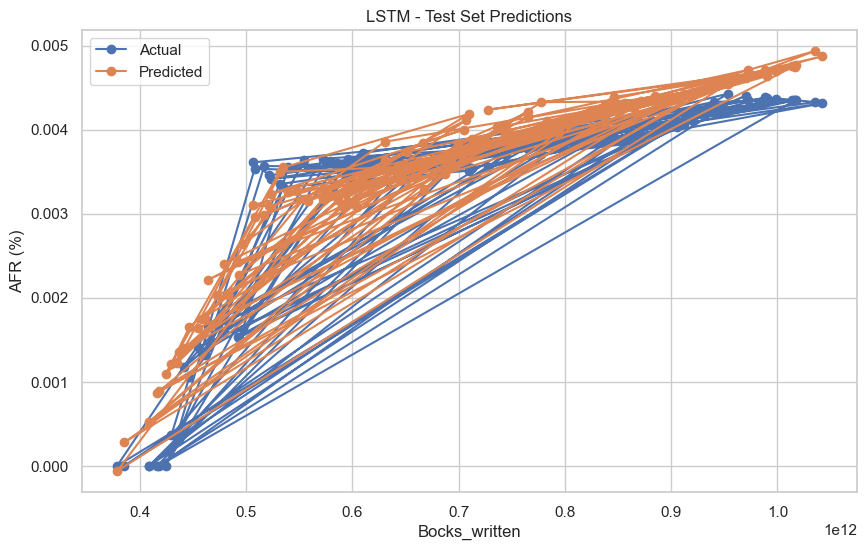

Random Forest Equation:
n_b_written * 0.6094 + r_sectors * 0.0056 + w_r_d * 0.3850 + 
XGBoost Equation:
n_b_written * 0.5668 + r_sectors * 0.2224 + w_r_d * 0.2109 + 
LSTM Model Summary:
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 50)                10400     
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [219]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureWSM

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []
r2_scores = []  # Added for R-squared

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Print lengths of arrays for debugging
print("Length of models array:", len(models))
print("Length of mae_scores array:", len(mae_scores))
print("Length of mse_scores array:", len(mse_scores))
print("Length of r2_scores array:", len(r2_scores))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores) == len(r2_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse, r2 in zip(models * 3, mae_scores, mse_scores, r2_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})
    results_list.append({'Model': model, 'Metric': 'R-squared', 'Score': r2})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersWSM.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()


In [610]:
## Saving models for later *** (change the app name in the code)

import joblib

appName = 'WSM'

# Assuming you have trained models named best_rf_model, best_xgb_model, and lstm_model

# Save Random Forest model
joblib.dump(best_rf_model, 'MLModels/best_rf_model' + appName + '.joblib')

# Save XGBoost model
joblib.dump(best_xgb_model, 'MLModels/best_xgb_model' + appName + '.joblib')

# Save LSTM model
lstm_model.save('MLModels/lstm_model' + appName + '.h5')  # Assuming lstm_model is a Keras model


/Users/ericborba/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [799]:
# Loading models *** (change the app name in the code)

import joblib

appName = 'RM'

# Loading the respective app dataset to create variables so that will possible to work with the ML model from here on.
df = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + appName + '.csv')

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')

# Load Random Forest model
best_rf_model = joblib.load('MLModels/best_rf_model' + appName + 'Backup.joblib')

# Load XGBoost model
best_xgb_model = joblib.load('MLModels/best_xgb_model' + appName + 'Backup.joblib')

# Load LSTM model
from keras.models import load_model
lstm_model = load_model('MLModels/lstm_model' + appName + 'Backup.h5')

In [395]:
# Loading models (all apps)

import joblib
from keras.models import load_model

# List of app names
app_names = ['None', 'RM', 'WSM']

# Dictionary to store models
models = {}

for appName in app_names:
    # Loading the respective app dataset
    df = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + appName + '.csv')

    # Data preprocessing
    X = df[['n_b_written', 'r_sectors', 'w_r_d']]
    y = df['AFR_SSDs']

    # Split the data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')

    # Load Random Forest model
    best_rf_model = joblib.load('MLModels/best_rf_model' + appName + 'Backup.joblib')
    models['best_rf_model_' + appName] = best_rf_model

    # Load XGBoost model
    best_xgb_model = joblib.load('MLModels/best_xgb_model' + appName + 'Backup.joblib')
    models['best_xgb_model_' + appName] = best_xgb_model

    # Load LSTM model
    lstm_model = load_model('MLModels/lstm_model' + appName + 'Backup.h5')
    models['lstm_model_' + appName] = lstm_model


In [396]:
# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")


Random Forest Equation:
n_b_written * 0.4762 + r_sectors * 0.0071 + w_r_d * 0.5167 + 
XGBoost Equation:
n_b_written * 0.5668 + r_sectors * 0.2224 + w_r_d * 0.2109 + 

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1367621094.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=custom_labels, y=rf_feature_importances, palette="deep", ci=None, width=bar_width)  # Adjust width and color
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


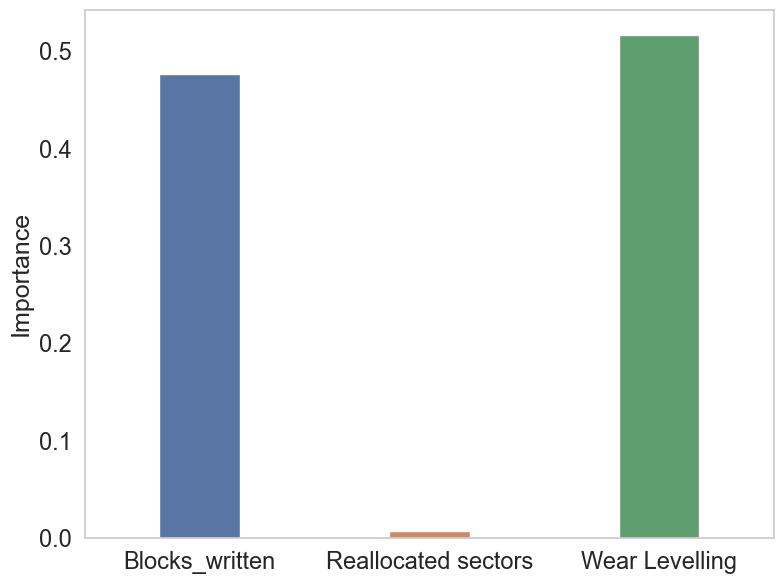

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1367621094.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=custom_labels, y=xgb_feature_importances, palette="deep", ci=None, width=bar_width)  # Adjust width and color
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


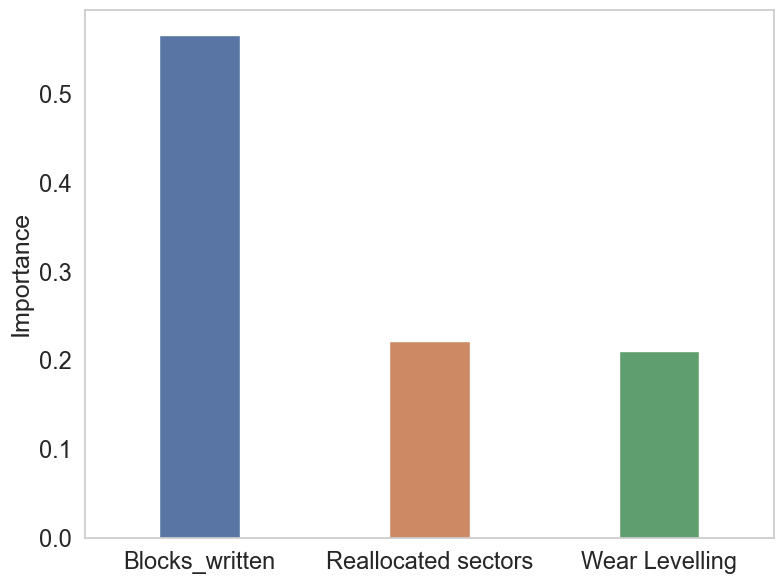

In [397]:
## Plotting Feature Importances for a given app per algorithm

import seaborn as sns
import matplotlib.pyplot as plt

# Customize plotting parameters
font_size = 17  # Adjust font size as needed
title_size = 18  # Adjust title font size as needed
label_size = 18  # Adjust label font size as needed

# Define custom labels for the x-axis
custom_labels = ['Blocks_written', 'Reallocated sectors', 'Wear Levelling']  # Replace with your desired labels

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the width of the bars
bar_width = 0.35  # Adjust the width as needed

# Plot feature importances for Random Forest
plt.figure(figsize=(8, 6))
sns.barplot(x=custom_labels, y=rf_feature_importances, palette="deep", ci=None, width=bar_width)  # Adjust width and color
plt.ylabel('Importance', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(False)
# Save the figure in PDF format
plt.savefig('img/MLEvaluationFeatureImportanceRandomForest' + appName + '.pdf')
plt.show()

# Plot feature importances for XGBoost
plt.figure(figsize=(8, 6))
sns.barplot(x=custom_labels, y=xgb_feature_importances, palette="deep", ci=None, width=bar_width)  # Adjust width and color
plt.ylabel('Importance', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid(False)
plt.tight_layout()  # Adjust layout to prevent clipping
# Save the figure in PDF format
plt.savefig('img/MLEvaluationFeatureImportanceXGBoost' + appName + '.pdf')
plt.show()


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/934359087.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rf_feature_importances = pd.concat([rf_feature_importances, app_feature_importances], ignore_index=True)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/934359087.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  xgb_feature_importances = pd.concat([xgb_feature_importances, app_feature_importances], ignore_index=True)
/var/folders/62/6b4lt5yn51jggw8l

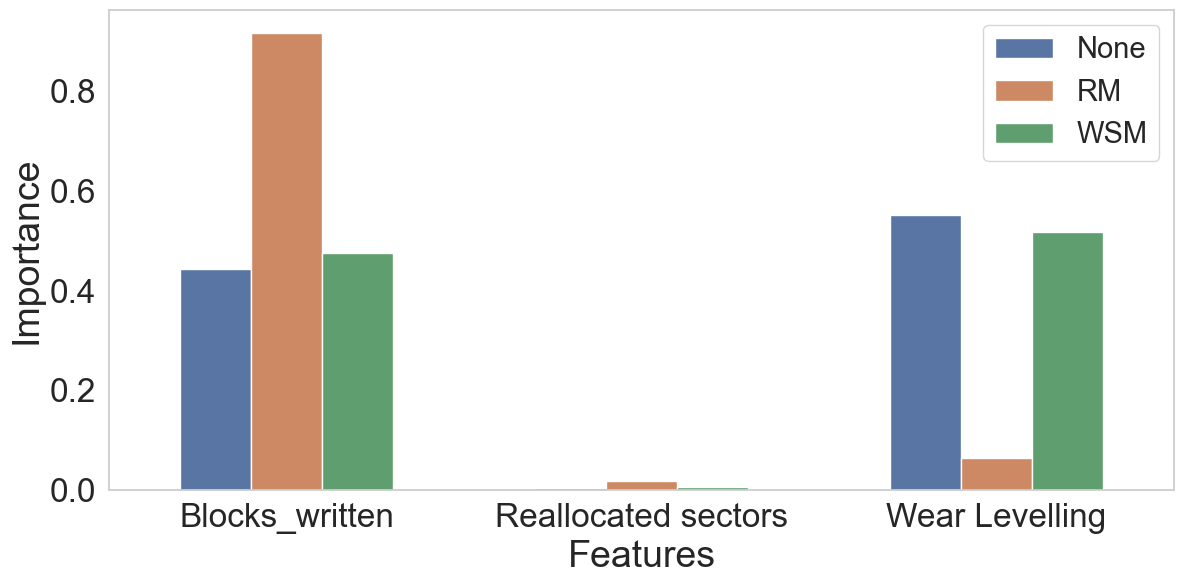

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/934359087.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Features', y='Importance', hue='App', data=xgb_feature_importances, palette="deep", ci=None, width=bar_width)


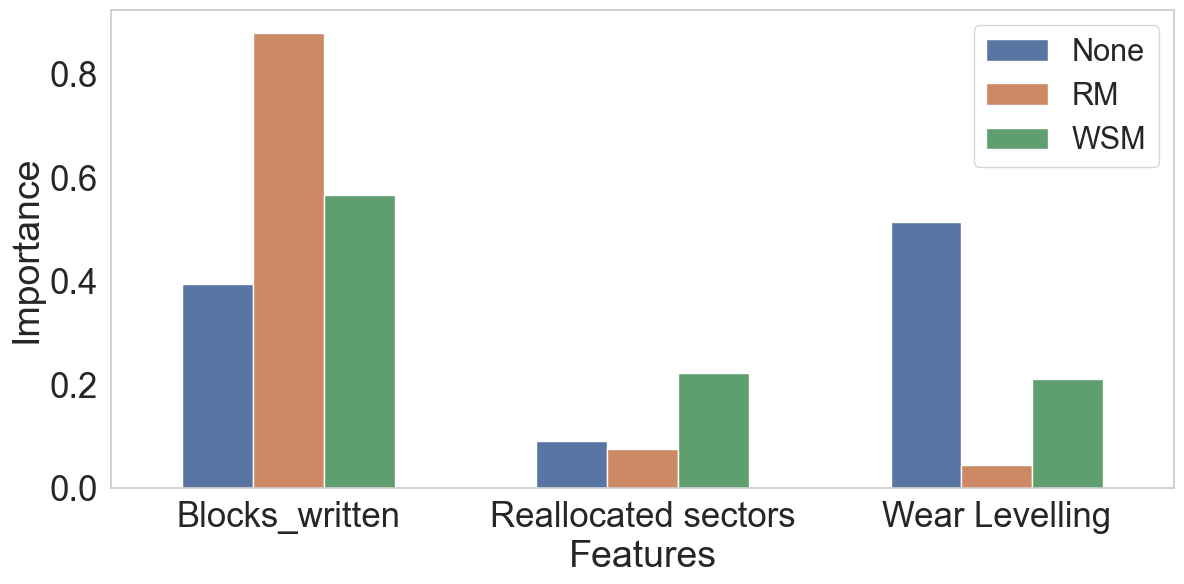

In [403]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Customize plotting parameters
font_size = 27
title_size = 18
label_size = 27

# Define custom labels for the x-axis
custom_labels = ['Blocks_written', 'Reallocated sectors', 'Wear Levelling']

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the width of the bars
bar_width = 0.6

# List of app names
app_names = ['None', 'RM', 'WSM']

# Data for Random Forest and XGBoost feature importances
rf_feature_importances = pd.DataFrame(columns=['Features', 'Importance', 'App'])

for app_name in app_names:
    rf_model = models['best_rf_model_' + app_name]
    rf_importances = rf_model.feature_importances_
    app_feature_importances = pd.DataFrame({
        'Features': custom_labels,
        'Importance': rf_importances,
        'App': [app_name] * len(custom_labels)
    })
    rf_feature_importances = pd.concat([rf_feature_importances, app_feature_importances], ignore_index=True)

xgb_feature_importances = pd.DataFrame(columns=['Features', 'Importance', 'App'])

for app_name in app_names:
    xgb_model = models['best_xgb_model_' + app_name]
    xgb_importances = xgb_model.feature_importances_
    app_feature_importances = pd.DataFrame({
        'Features': custom_labels,
        'Importance': xgb_importances,
        'App': [app_name] * len(custom_labels)
    })
    xgb_feature_importances = pd.concat([xgb_feature_importances, app_feature_importances], ignore_index=True)

# Plot feature importances for Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importance', hue='App', data=rf_feature_importances, palette="deep", ci=None, width=bar_width)
plt.ylabel('Importance', fontsize=label_size)
plt.xlabel('Features', fontsize=label_size)
plt.xticks(fontsize=font_size-3)
plt.yticks(fontsize=font_size-3)
plt.legend(fontsize=21)  # Adjust bbox_to_anchor for position
plt.tight_layout()
plt.grid(False)
plt.savefig('img/MLEvaluationFeatureImportanceRandomForest.pdf')
plt.show()

# Plot feature importances for XGBoost
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importance', hue='App', data=xgb_feature_importances, palette="deep", ci=None, width=bar_width)
plt.ylabel('Importance', fontsize=label_size)
plt.xlabel('Features', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=22)  # Adjust bbox_to_anchor for position
plt.tight_layout()
plt.grid(False)
plt.savefig('img/MLEvaluationFeatureImportanceXGBoost.pdf')
plt.show()


In [14]:
## Sensitivity analysis to get the highest AFR whithin a given range

import itertools
import numpy as np

# Assuming you have a trained model and X_test dataset
feature_names = ['n_b_written', 'r_sectors', 'w_r_d']

# Define the ranges for each feature
feature_ranges = {
    'n_b_written': [0, 1.5 * 10**12],  # replace min_value and max_value with your desired range
    'r_sectors': [0, 10.116243],
    'w_r_d': [0, 571.376854]
}

# Generate all possible combinations of feature values within the specified ranges
combinations = list(itertools.product(*(feature_ranges[feature] for feature in feature_names)))

# Initialize variables to store the best result
best_target_value = float('-inf')
best_feature_values = None

# Loop through all combinations and calculate predictions
for feature_values in combinations:
    # Create a dictionary with feature names and values
    feature_dict = dict(zip(feature_names, feature_values))

    # Ensure the feature order is consistent with the model
    ordered_feature_values = [feature_dict[feature] for feature in X.columns]

    # Create a DataFrame with a single row for prediction
    input_data = pd.DataFrame([ordered_feature_values], columns=X.columns)

    # Use the XGBoost model to make a prediction
    prediction = best_rf_model.predict(input_data)[0]

    # Check if the current combination produces a higher prediction
    if prediction > best_target_value:
        best_target_value = prediction
        best_feature_values = feature_values

# Print the results
print(f"Highest Target Value: {best_target_value}")
print(f"Best Feature Values: {dict(zip(feature_names, best_feature_values))}")


Highest Target Value: 0.004324617153959176
Best Feature Values: {'n_b_written': 1500000000000.0, 'r_sectors': 0, 'w_r_d': 571.376854}


4/4 [==============================] - 0s 1ms/step


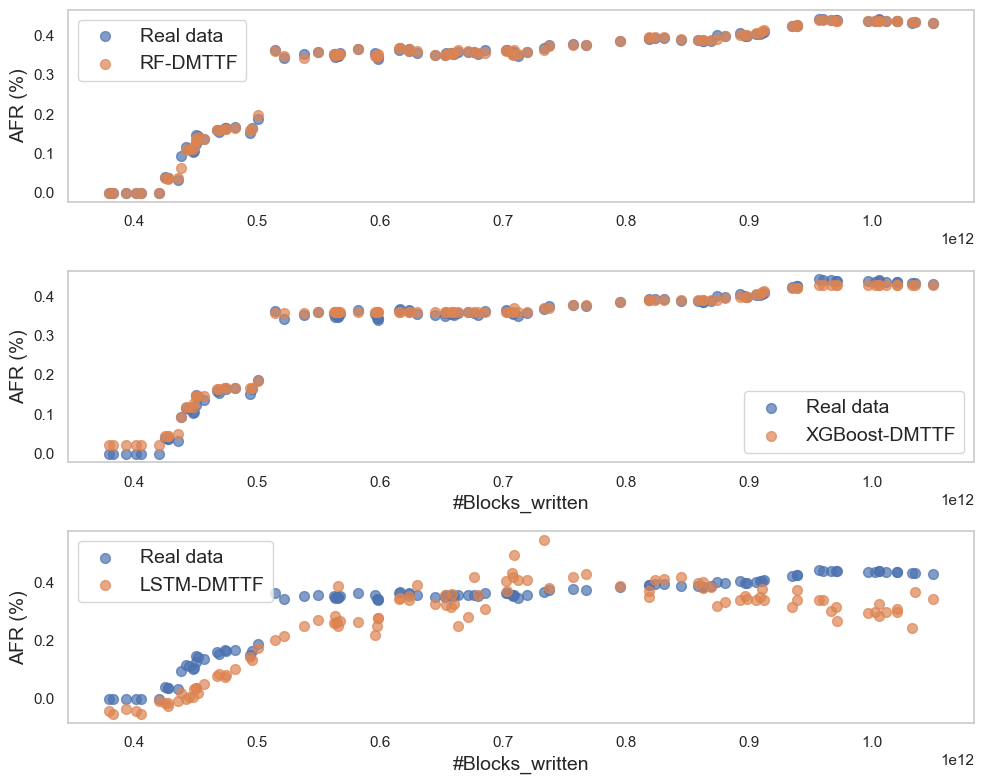

4/4 [==============================] - 0s 972us/step


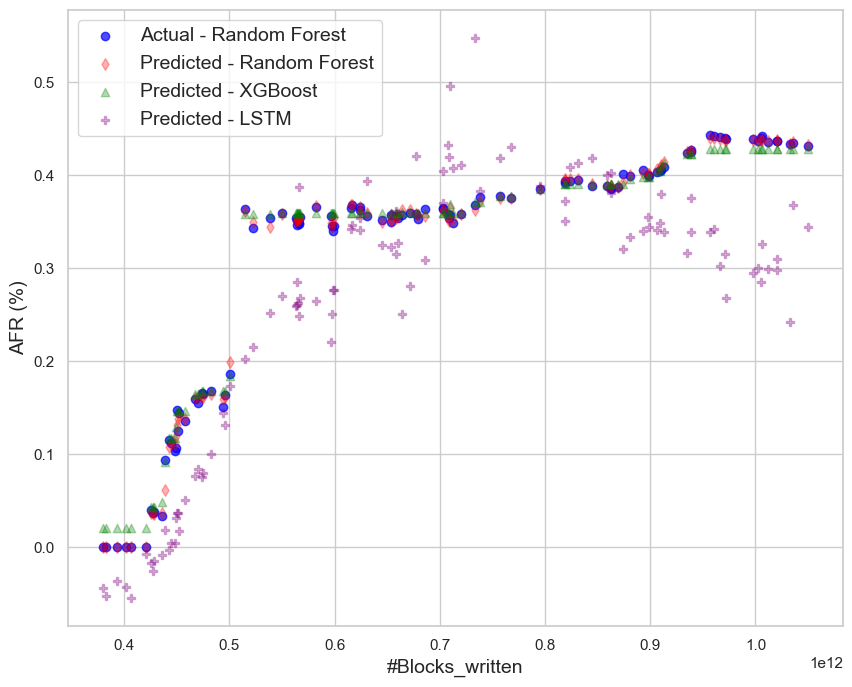

In [477]:
## Plotting validation results against predictions per algorithm

# Plotting all target variable values and predictions in 3 subfigures
plt.figure(figsize=(10, 8)) # Adjust width and height

appName='WSM'

# Plot Random Forest 
plt.subplot(3, 1, 1)
plt.scatter(X_val.iloc[:, 0], y_val*100, label='Real data', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_rf_model.predict(X_val)*100, label='RF-DMTTF', marker='o', alpha=0.7, s=50)
#plt.title('Random Forest - Validation Set Predictions')
#plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.grid(False)
plt.legend(fontsize=14)

# Plot XGBoost
plt.subplot(3, 1, 2)
plt.scatter(X_val.iloc[:, 0], y_val*100, label='Real data', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_xgb_model.predict(X_val)*100, label='XGBoost-DMTTF', marker='o', alpha=0.7, s=50)
#plt.title('XGBoost - Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.grid(False)
plt.legend(fontsize=14)

# Plot LSTM
plt.subplot(3, 1, 3)
plt.scatter(X_val.iloc[:, 0], y_val*100, label='Real data', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], lstm_model.predict(X_val_lstm).flatten()*100, label='LSTM-DMTTF', marker='o', alpha=0.7, s=50)
#plt.title('LSTM - Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.grid(False)
plt.legend(fontsize=14)

plt.tight_layout()

# Save the figure in PDF format (remember to change the app name)
plt.savefig('img/MLEvaluation' +appName+ '_3Figure.pdf')
plt.show()

# Plotting all target variable values and predictions in one single figure
plt.figure(figsize=(10, 8)) # Adjust width and height

# Plot Random Forest
plt.scatter(X_val.iloc[:, 0], y_val*100, label='Actual - Random Forest', marker='o', color='blue', alpha=0.7)
plt.scatter(X_val.iloc[:, 0], best_rf_model.predict(X_val)*100, label='Predicted - Random Forest', marker='d', color='red', alpha=0.3)

# Plot XGBoost
plt.scatter(X_val.iloc[:, 0], best_xgb_model.predict(X_val)*100, label='Predicted - XGBoost', marker='^', color='green', alpha=0.3)

# Plot LSTM
plt.scatter(X_val.iloc[:, 0], lstm_model.predict(X_val_lstm).flatten()*100, label='Predicted - LSTM', marker='P', color='purple', alpha=0.3)

#plt.title('Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.legend(fontsize=14)


# Save the figure in PDF format
plt.savefig('img/MLEvaluation' + appName + '_1Figure.pdf')
plt.show()

4/4 [==============================] - 0s 937us/step


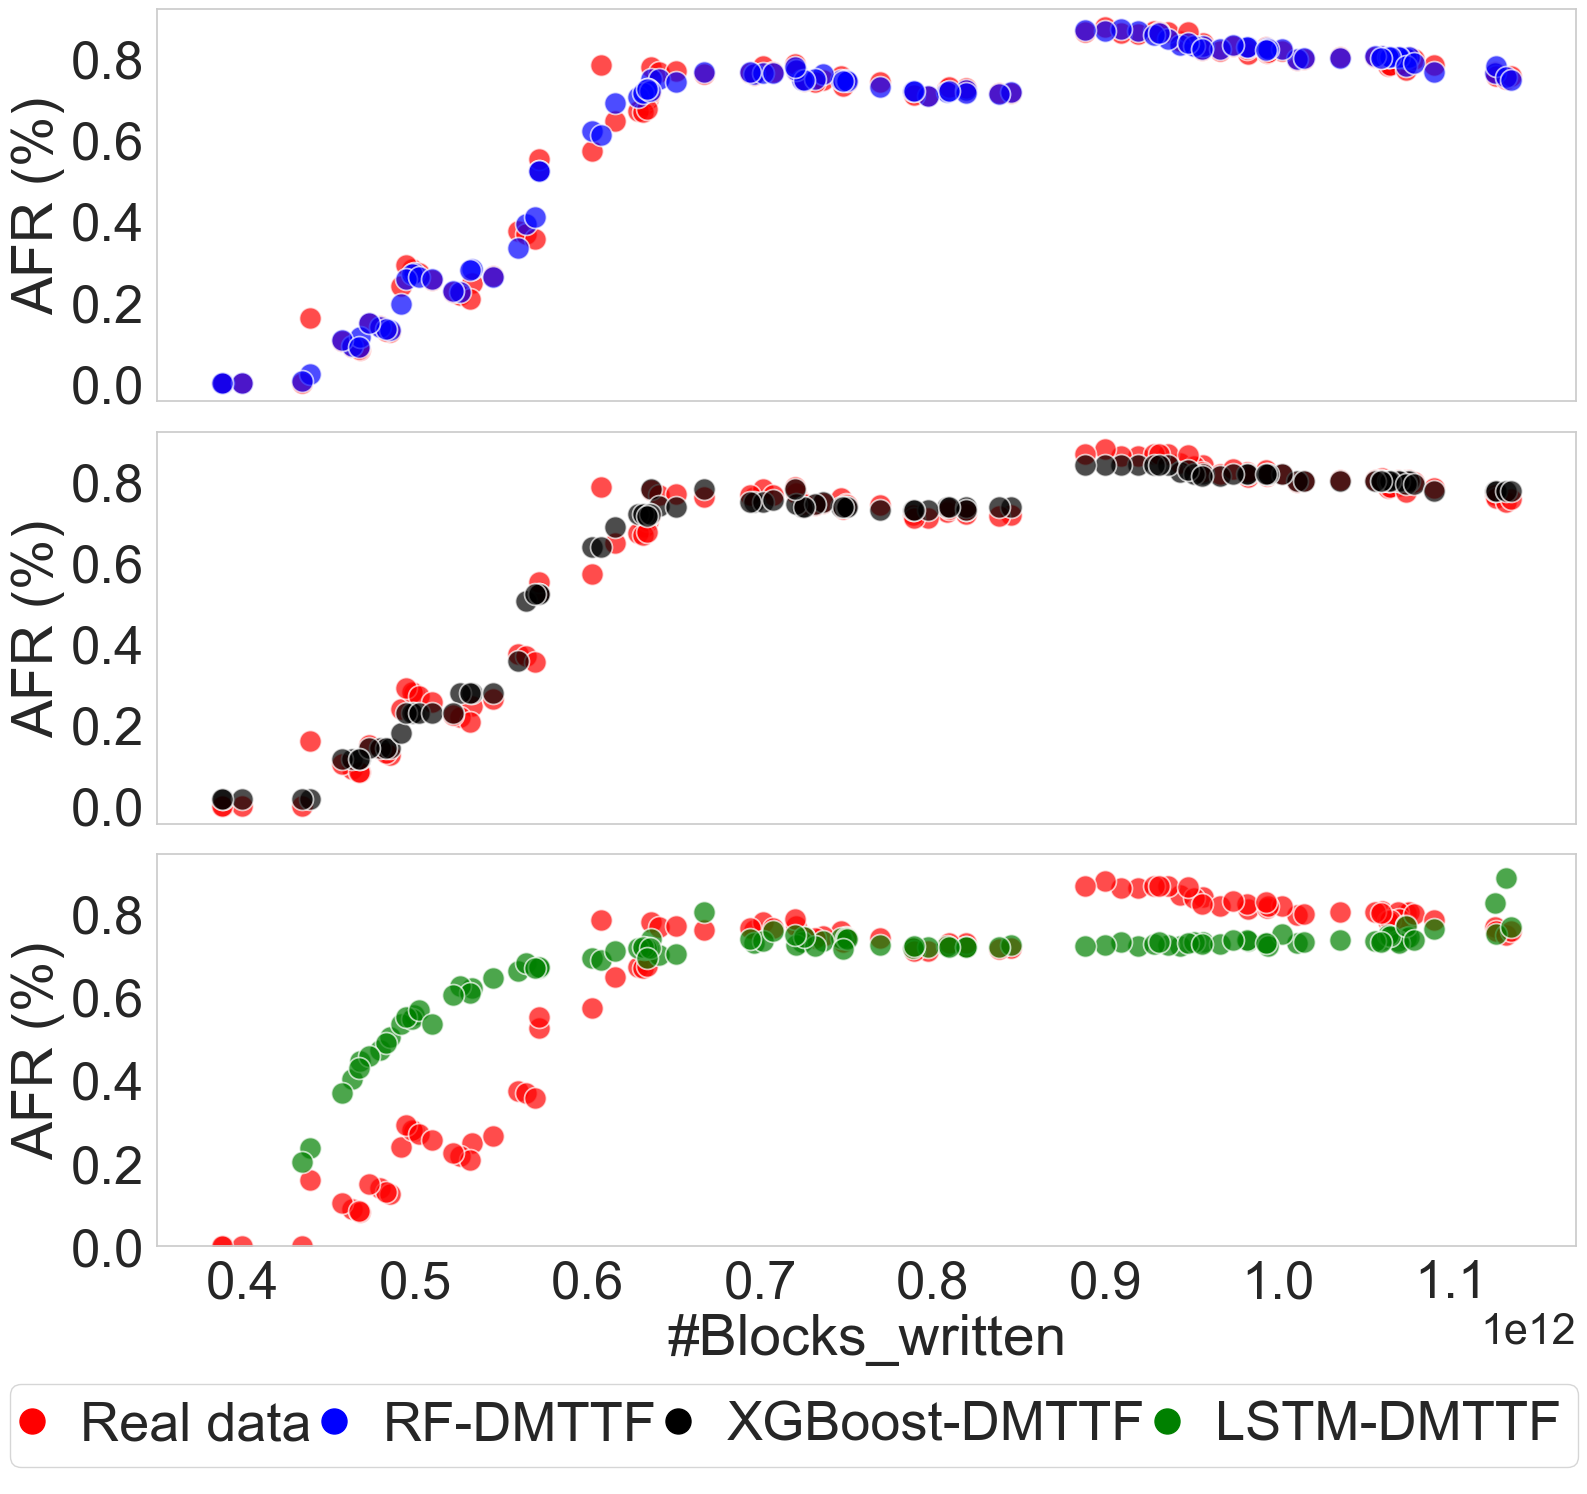

In [800]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D


# Customize plotting parameters
font_size = 41
label_size = 38
s=250

appName = 'RM'
plt.figure(figsize=(16, 16))  # Adjust width and height

# Define colors
color_real = 'red'
color_rf = 'blue'
color_xgb = 'black'
color_lstm = 'green'

class CustomHandler(HandlerLine2D):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        artists = super().create_artists(legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans)
        # Adjust the marker size here
        for artist in artists:
            artist.set_markersize(18)  # Set a larger marker size
        return artists


# Random Forest
plt.subplot(3, 1, 1)
sns.scatterplot(x=X_val.iloc[:, 0], y=y_val*100, color=color_real, alpha=0.7, s=s)
sns.scatterplot(x=X_val.iloc[:, 0], y=best_rf_model.predict(X_val)*100, color=color_rf, alpha=0.7, s=s)
plt.ylabel('AFR (%)', fontsize=font_size)
plt.xlabel("")
plt.grid(False)
plt.xticks([])
plt.yticks(fontsize=label_size)

# XGBoost
plt.subplot(3, 1, 2)
sns.scatterplot(x=X_val.iloc[:, 0], y=y_val*100, color=color_real, alpha=0.7, s=s)
sns.scatterplot(x=X_val.iloc[:, 0], y=best_xgb_model.predict(X_val)*100, color=color_xgb, alpha=0.7, s=s)
plt.ylabel('AFR (%)', fontsize=font_size)
plt.xlabel("")
plt.grid(False)
plt.xticks([])
plt.yticks(fontsize=label_size)

# LSTM
plt.subplot(3, 1, 3)
sns.scatterplot(x=X_val.iloc[:, 0], y=y_val*100, color=color_real, alpha=0.7, s=s)
sns.scatterplot(x=X_val.iloc[:, 0], y=lstm_model.predict(X_val_lstm).flatten()*100, color=color_lstm, alpha=0.7, s=s)
plt.ylabel('AFR (%)', fontsize=font_size)
plt.xlabel('#Blocks_written', fontsize=font_size)
plt.xticks(fontsize=label_size)
plt.yticks(fontsize=label_size)
plt.ylim(bottom=0)
plt.grid(False)

# Adjust the font size of the x-axis order of magnitude
ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(label_size-7)

# Create custom legend
legend_elements = [mlines.Line2D([], [], color=color_real, marker='o', linestyle='None', label='Real data'),
                   mlines.Line2D([], [], color=color_rf, marker='o', linestyle='None', label='RF-DMTTF'),
                   mlines.Line2D([], [], color=color_xgb, marker='o', linestyle='None', label='XGBoost-DMTTF'),
                   mlines.Line2D([], [], color=color_lstm, marker='o', linestyle='None', label='LSTM-DMTTF')]
# Adjust legend parameters
plt.figlegend(handles=legend_elements, loc='lower center', ncol=4, fontsize=font_size-2, 
              borderpad=0.3, handler_map={mlines.Line2D: CustomHandler()}, labelspacing=0.05, handlelength=0.2, columnspacing=0.3)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # Adjust the rect to make space for the legend

plt.savefig(f'img/MLEvaluation_{appName}_3Figure.pdf')
plt.show()


4/4 [==============================] - 0s 1ms/step


/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

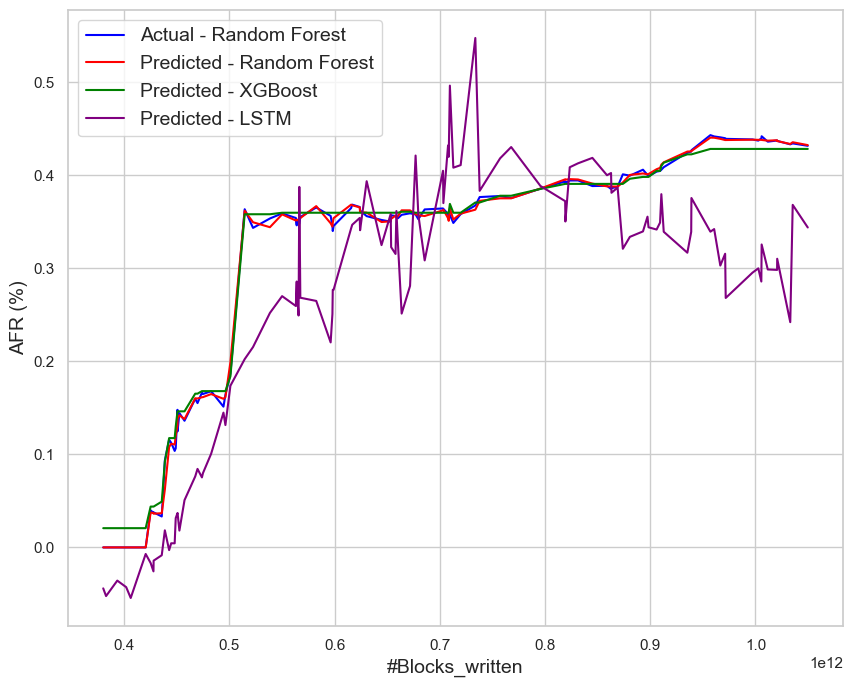

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_val, y_val, and models (best_rf_model, best_xgb_model, lstm_model) are already defined

appName = 'RM'
plt.figure(figsize=(10, 8))  # Adjust width and height

# Random Forest
sns.lineplot(x=X_val.iloc[:, 0], y=y_val*100, label='Actual - Random Forest', color='blue')
sns.lineplot(x=X_val.iloc[:, 0], y=best_rf_model.predict(X_val)*100, label='Predicted - Random Forest', color='red')

# XGBoost
sns.lineplot(x=X_val.iloc[:, 0], y=best_xgb_model.predict(X_val)*100, label='Predicted - XGBoost', color='green')

# LSTM
sns.lineplot(x=X_val.iloc[:, 0], y=lstm_model.predict(X_val_lstm).flatten()*100, label='Predicted - LSTM', color='purple')

plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.legend(fontsize=14)

plt.savefig(f'img/MLEvaluation_{appName}_1Figure.pdf')
plt.show()


1/1 [==============================] - 0s 9ms/step


/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featur

1/1 [==============================] - 0s 8ms/step


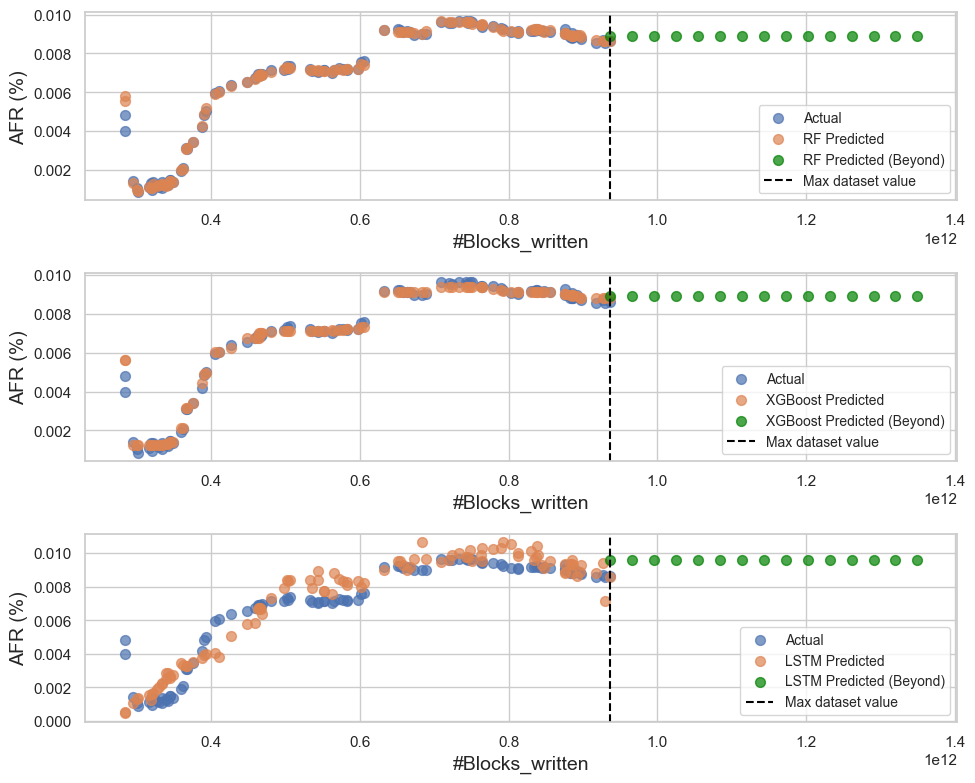

In [307]:
## Plotting validation dataset, predictions, and predictions beyond

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming you have defined your models and data (best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds, X_val, y_val) earlier
appName = 'None'

# Set the maximum prediction value for the green line
max_pred_value = 1.35 * 10**12  # Change this value according to your requirements

# Generate num_values equidistant values between X_val.iloc[:, 0].max() and max_pred_value
num_values = 15
pred_values = np.linspace(X_val.iloc[:, 0].max(), max_pred_value, num=num_values)

# Plotting all target variable values and predictions in 3 subfigures
plt.figure(figsize=(10, 8))  # Adjust width and height

best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

# Plot Random Forest
plt.subplot(3, 1, 1)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_rf_val_preds, label='RF Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [best_rf_model.predict(np.array([[value, 10.116243, 571.376854]]).reshape(1, 3))[0] for value in pred_values],
            label='RF Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
#plt.legend(handles=[legend_line], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

# Plot XGBoost
plt.subplot(3, 1, 2)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_xgb_val_preds, label='XGBoost Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [best_xgb_model.predict(np.array([[value, 10.116243, 571.376854]]).reshape(1, 3))[0] for value in pred_values],
            label='XGBoost Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

# Plot LSTM
plt.subplot(3, 1, 3)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_lstm_val_preds, label='LSTM Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [lstm_model.predict(np.array([[value, 10.116243, 571.376854]]).reshape(1, 3, 1))[0, 0] for value in pred_values],
            label='LSTM Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

plt.tight_layout()

# Save the figure in PDF format (remember to change the app name)
plt.savefig('img/MLEvaluation' + appName + '_3FigureBeyond.pdf', bbox_inches='tight')
plt.show()


In [26]:
## Getting predictions for a certain point

# Function to provide inputs for the model and get predictions
def get_predictions(model, X_input):
    if hasattr(model, 'predict'):  # Check if the model has a predict method
        return model.predict(X_input)
    elif isinstance(model, Sequential):  # Check if the model is a Keras Sequential model
        X_input_lstm = np.reshape(X_input.values, (X_input.shape[0], X_input.shape[1], 1)).astype('float32')
        return model.predict(X_input_lstm).flatten()
    else:
        raise ValueError("Unsupported model type")

# Example usage for the best RandomForestRegressor model
input_data_rf = pd.DataFrame({'n_b_written': [1.35 * 10**12], 'r_sectors': [10.116243], 'w_r_d': [571.376854]})
rf_predictions = get_predictions(best_rf_model, input_data_rf)
print("Random Forest Predictions:", rf_predictions)

'''
# Example usage for the best XGBRegressor model
input_data_xgb = pd.DataFrame({'n_b_written': [your_value], 'r_sectors': [your_value], 'w_r_d': [your_value]})
xgb_predictions = get_predictions(best_xgb_model, input_data_xgb)
print("XGBoost Predictions:", xgb_predictions)

# Example usage for the best LSTM model
input_data_lstm = pd.DataFrame({'n_b_written': [your_value], 'r_sectors': [your_value], 'w_r_d': [your_value]})
lstm_predictions = get_predictions(lstm_model, input_data_lstm)
print("LSTM Predictions:", lstm_predictions)
'''

Random Forest Predictions: [0.00250603]


'\n# Example usage for the best XGBRegressor model\ninput_data_xgb = pd.DataFrame({\'n_b_written\': [your_value], \'r_sectors\': [your_value], \'w_r_d\': [your_value]})\nxgb_predictions = get_predictions(best_xgb_model, input_data_xgb)\nprint("XGBoost Predictions:", xgb_predictions)\n\n# Example usage for the best LSTM model\ninput_data_lstm = pd.DataFrame({\'n_b_written\': [your_value], \'r_sectors\': [your_value], \'w_r_d\': [your_value]})\nlstm_predictions = get_predictions(lstm_model, input_data_lstm)\nprint("LSTM Predictions:", lstm_predictions)\n'

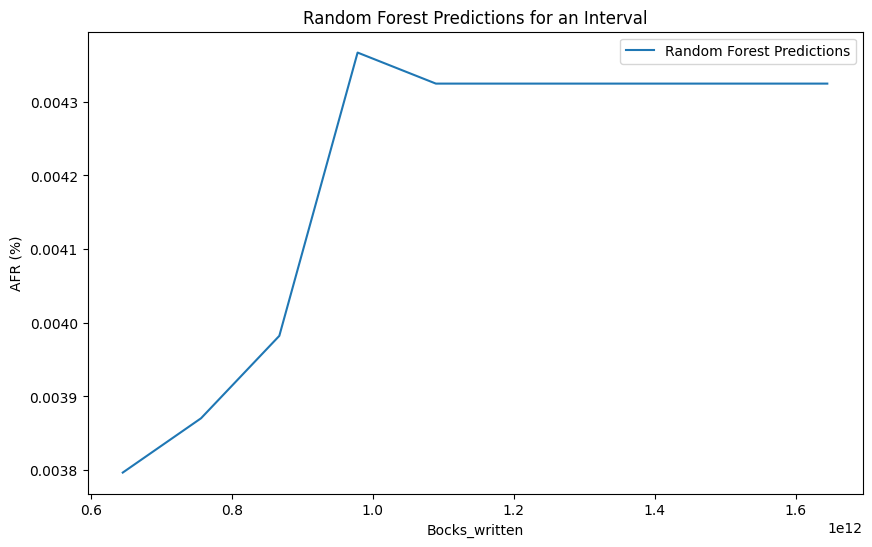

"\n# Example usage for the best XGBRegressor model\nxgb_predictions_interval = get_predictions_for_interval(best_xgb_model, feature_range)\n\n# Plotting the results for the XGBRegressor model\nplt.figure(figsize=(10, 6))\nplt.plot(feature_range, xgb_predictions_interval, label='XGBoost Predictions')\nplt.title('XGBoost Predictions for an Interval')\nplt.xlabel('Bocks_written')\nplt.ylabel('AFR (%)')\nplt.legend()\nplt.show()\n\n\n# Example usage for the best LSTM model\nlstm_predictions_interval = get_predictions_for_interval_lstm(lstm_model, feature_range)\n\n# Plotting the results for the LSTM model\nplt.figure(figsize=(10, 6))\nplt.plot(feature_range, lstm_predictions_interval, label='LSTM Predictions')\nplt.title('LSTM Predictions for an Interval')\nplt.xlabel('Bocks_written')\nplt.ylabel('AFR (%)')\nplt.legend()\nplt.show()\n"

In [158]:
## Getting predictions for an interval


def get_predictions_for_interval(model, X_interval):
    predictions = []
    for value in X_interval:
        input_data = pd.DataFrame({'n_b_written': [value], 'r_sectors': [10.116243], 'w_r_d': [571.376854]})
        prediction = get_predictions(model, input_data)
        predictions.append(prediction)
    return np.array(predictions)


def get_predictions_for_interval_lstm(model, X_interval):
    predictions = []
    for value in X_interval:
        input_data = np.reshape(np.array([[value, 10.116243, 571.376854]]), (1, 3, 1))
        prediction = model.predict(input_data)[0][0]
        predictions.append(prediction)
    return np.array(predictions)


# Set the range of values for the feature
feature_range = np.linspace(0.645079e+12, 1.645079e+12, 10)


# Example usage for the best RandomForestRegressor model
rf_predictions_interval = get_predictions_for_interval(best_rf_model, feature_range)

# Plotting the results for the RandomForestRegressor model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, rf_predictions_interval, label='Random Forest Predictions')
plt.title('Random Forest Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()


'''
# Example usage for the best XGBRegressor model
xgb_predictions_interval = get_predictions_for_interval(best_xgb_model, feature_range)

# Plotting the results for the XGBRegressor model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, xgb_predictions_interval, label='XGBoost Predictions')
plt.title('XGBoost Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()


# Example usage for the best LSTM model
lstm_predictions_interval = get_predictions_for_interval_lstm(lstm_model, feature_range)

# Plotting the results for the LSTM model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, lstm_predictions_interval, label='LSTM Predictions')
plt.title('LSTM Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()
'''

In [12]:
# Combining RF models and XGBoost models (because each one has 3 for each app) in one of each
## *** Filename with Backup at the end will use the best models that are stored
## *** Filename without Backup at the end will use those models that are loaded into the memory 
# And lastely combining all of them into one single model

from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
import joblib
import pandas as pd

# List of app names
app_names = ['None', 'RM', 'WSM']

# Load and concatenate datasets from all three apps
combined_df = pd.concat([pd.read_csv(f'DatasetML/extractedFeaturesMLTraining{app_name}.csv') for app_name in app_names])

# Data preprocessing for the combined dataset
X_combined = combined_df[['n_b_written', 'r_sectors', 'w_r_d']]
y_combined = combined_df['AFR_SSDs']

# Load individual Random Forest models for each app
rf_model_none = joblib.load('MLModels/best_rf_modelNoneBackup.joblib')
rf_model_wsm = joblib.load('MLModels/best_rf_modelWSMBackup.joblib')
rf_model_rm = joblib.load('MLModels/best_rf_modelRMBackup.joblib')

# Load individual XGBoost models for each app
xgb_model_none = joblib.load('MLModels/best_xgb_modelNoneBackup.joblib')
xgb_model_wsm = joblib.load('MLModels/best_xgb_modelWSMBackup.joblib')
xgb_model_rm = joblib.load('MLModels/best_xgb_modelRMBackup.joblib')

# Create a VotingRegressor for Random Forest
rf_ensemble_model = VotingRegressor(estimators=[
    ('none', rf_model_none),
    ('wsm', rf_model_wsm),
    ('rm', rf_model_rm)
])

# Create a VotingRegressor for XGBoost
xgb_ensemble_model = VotingRegressor(estimators=[
    ('none', xgb_model_none),
    ('wsm', xgb_model_wsm),
    ('rm', xgb_model_rm)
])

# Train the ensemble models on the combined dataset
rf_ensemble_model.fit(X_combined, y_combined)
xgb_ensemble_model.fit(X_combined, y_combined)

# Save the ensemble models
joblib.dump(rf_ensemble_model, 'MLModels/ensemble_rf_model.joblib')
joblib.dump(xgb_ensemble_model, 'MLModels/ensemble_xgb_model.joblib')

# Combining RF and XGBoost models into one model (if needed)
ensemble_model = VotingRegressor(estimators=[
    ('rf', rf_ensemble_model),
    ('xgb', xgb_ensemble_model)
])

# Train the combined ensemble model on the combined dataset
ensemble_model.fit(X_combined, y_combined)

# Save the combined ensemble model
joblib.dump(ensemble_model, 'MLModels/ensemble_model.joblib')


['MLModels/ensemble_model.joblib']

In [9]:
# Loading the ensemble models

rf_ensemble_model = joblib.load('MLModels/ensemble_rf_model.joblib')
xgb_ensemble_model  = joblib.load('MLModels/ensemble_xgb_model.joblib')
#ensemble_model  = joblib.load('MLModels/ensemble_model.joblib')
    

In [21]:
## Sensitivity analysis to get the highest AFR whithin a given range using Ensembled Model for the gekko-related experiments

import itertools
import numpy as np

# Assuming you have a trained model and X_test dataset
feature_names = ['n_b_written', 'r_sectors', 'w_r_d']

# Define the ranges for each feature
feature_ranges = {
    'n_b_written': [0, 134250000],  # 64GiB (16 threads * 4GiB) because this is the volume used in GekoFS paper (Total LBAs written, sector size=512bytes)
    'r_sectors': [0, 10.116243],
    'w_r_d': [0, 571.376854]
}

# Generate all possible combinations of feature values within the specified ranges
combinations = list(itertools.product(*(feature_ranges[feature] for feature in feature_names)))

# Initialize variables to store the best result
best_target_value = float('-inf')
best_feature_values = None

# Loop through all combinations and calculate predictions
for feature_values in combinations:
    # Create a dictionary with feature names and values
    feature_dict = dict(zip(feature_names, feature_values))
 
    # Ensure the feature order is consistent with the model
    ordered_feature_values = [feature_dict[feature] for feature in X_combined.columns]

    # Create a DataFrame with a single row for prediction
    input_data = pd.DataFrame([ordered_feature_values], columns=X_combined.columns)

    # Use the ensemble model to make a prediction
    prediction = rf_ensemble_model.predict(input_data)[0]

    # Check if the current combination produces a higher prediction
    if prediction > best_target_value:
        best_target_value = prediction
        best_feature_values = feature_values

# Print the results
print(f"Highest Target AFR Value: {best_target_value}")
print(f"Best Feature Values: {dict(zip(feature_names, best_feature_values))}")


Highest Target AFR Value: 0.008210842993450602
Best Feature Values: {'n_b_written': 0, 'r_sectors': 0, 'w_r_d': 571.376854}


In [426]:
# To predict AFR using the ensemble model for a specific point (In this case, amount of data written using Gekko)

def get_predictions(model, X_input):
    if hasattr(model, 'predict'):  # Check if the model has a predict method
        return model.predict(X_input)
    elif isinstance(model, Sequential):  # Check if the model is a Keras Sequential model
        X_input_lstm = np.reshape(X_input.values, (X_input.shape[0], X_input.shape[1], 1)).astype('float32')
        return model.predict(X_input_lstm).flatten()
    else:
        raise ValueError("Unsupported model type")

# Example usage for the best RandomForestRegressor model
input_data_rf = pd.DataFrame({'n_b_written': [134250000], 'r_sectors': [0], 'w_r_d': [571.376854]})
rf_predictions = get_predictions(rf_ensemble_model, input_data_rf)
print("Random Forest Predictions:", rf_predictions)

Random Forest Predictions: [0.00821084]


In [844]:
## GSPN Gekko validation

import pandas as pd
from scipy import stats
import numpy as np

# Function to calculate confidence interval
def calculate_confidence_interval(row):
    mean = row['Mean_gekko']
    std_dev = row['std_gekko']

    # Check if 'Mean_gekko' and 'std_gekko' are valid numbers
    if not pd.notna(mean) or not pd.notna(std_dev) or not np.isfinite(mean) or not np.isfinite(std_dev) or std_dev <= 0:
        return "Invalid data"

    # Set the sample size
    n = 5

    # Calculate the standard error of the mean
    sem = std_dev / (n**0.5)

    # Calculate the confidence interval
    lower, upper = stats.norm.interval(0.95, loc=mean, scale=sem)

    return f"({lower:.2f}; {upper:.2f})"

# Input file paths
input_file_path_1 = 'ExperimentalResults/gekkoRdPerformabilityResultsValidation.csv'
input_file_path_2 = 'ExperimentalResults/gekkoSeqPerformabilityResultsValidation.csv'

# Output file paths
output_file_path_1 = 'ExperimentalResults/updated_gekkoRdPerformabilityResultsValidation.csv'
output_file_path_2 = 'ExperimentalResults/updated_gekkoSeqPerformabilityResultsValidation.csv'

# Load the data from the first CSV file
data_1 = pd.read_csv(input_file_path_1, sep=';')

# Apply the function to each row and create a new column 'confidence_interval'
data_1['confidence_interval'] = data_1.apply(calculate_confidence_interval, axis=1)

# Save the result to the first output CSV file
data_1.to_csv(output_file_path_1, index=False)

print(f"Processed {input_file_path_1} and saved the result to {output_file_path_1}")

# Load the data from the second CSV file
data_2 = pd.read_csv(input_file_path_2, sep=';')

# Apply the function to each row and create a new column 'confidence_interval'
data_2['confidence_interval'] = data_2.apply(calculate_confidence_interval, axis=1)

# Save the result to the second output CSV file
data_2.to_csv(output_file_path_2, index=False)

print(f"Processed {input_file_path_2} and saved the result to {output_file_path_2}")


Processed ExperimentalResults/gekkoRdPerformabilityResultsValidation.csv and saved the result to ExperimentalResults/updated_gekkoRdPerformabilityResultsValidation.csv
Processed ExperimentalResults/gekkoSeqPerformabilityResultsValidation.csv and saved the result to ExperimentalResults/updated_gekkoSeqPerformabilityResultsValidation.csv


In [76]:
## Loading csv containing worst case for the three apps (512 nodes and hightest AFR) 480h

dfRF = pd.read_csv('ExperimentalResults/' + 'ExperimentalResultsDataReliabilityWorstCaseRF' + '.csv')
dfXGBoost = pd.read_csv('ExperimentalResults/' + 'ExperimentalResultsDataReliabilityWorstCaseXGBoost' + '.csv')

In [811]:
## Loading csv containing worst case for the three apps (512 nodes and hightest AFR) 2 years

dfRF = pd.read_csv('ExperimentalResults/' + 'ReliabilityEvaluationOverTimeWorstCase2YearsRF' + '.csv', sep=';')
dfXGBoost = pd.read_csv('ExperimentalResults/' + 'ReliabilityEvaluationOverTimeWorstCase2YearsXGBoost' + '.csv', sep=';')

In [295]:
dfRF.head()

time (h)      None        RM       WSM     Gekko
0         0  1.000000  1.000000  1.000000  1.000000
1       730  0.684799  0.724064  0.831506  0.704456
2      1460  0.468950  0.524269  0.691402  0.496258
3      2190  0.321136  0.379604  0.574905  0.349592
4      2920  0.219914  0.274858  0.478037  0.246272

In [294]:
dfXGBoost.tail()

time (h)      None        RM       WSM
20     14600  0.000505  0.001399  0.029357
21     15330  0.000345  0.001007  0.024609
22     16060  0.000236  0.000725  0.020629
23     16790  0.000162  0.000522  0.017293
24     17520  0.000111  0.000376  0.014496

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


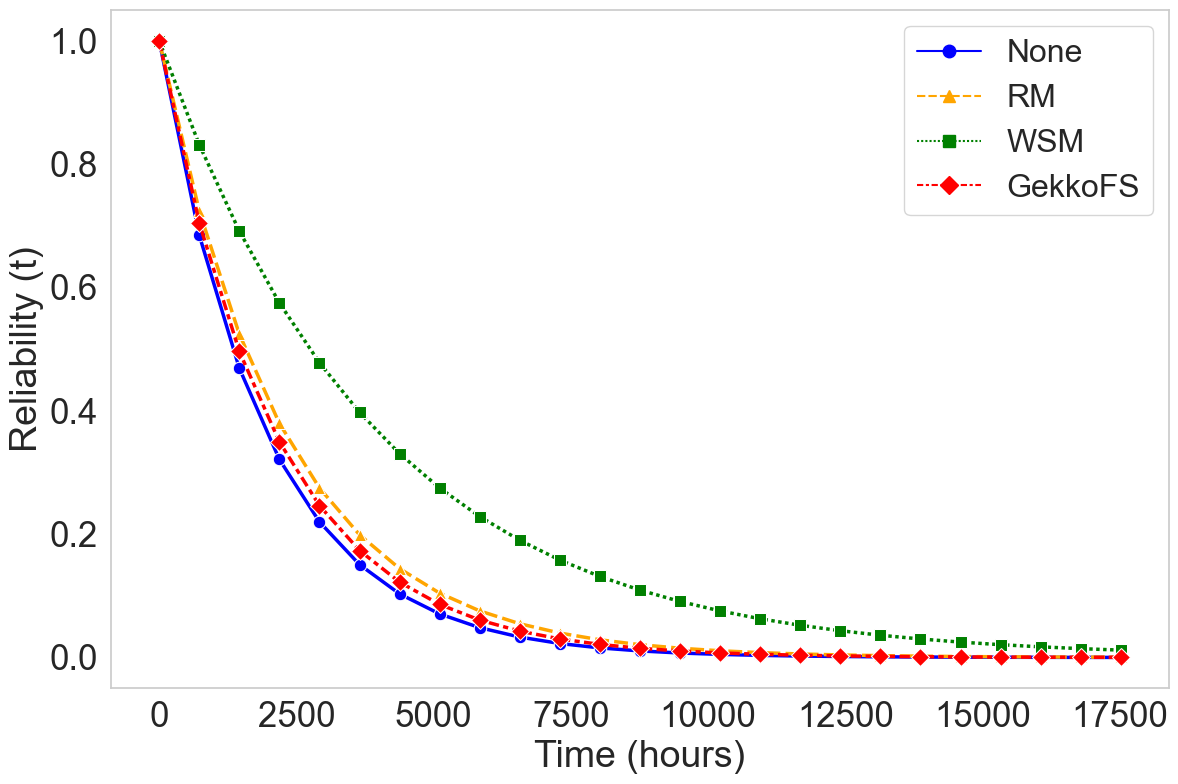

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


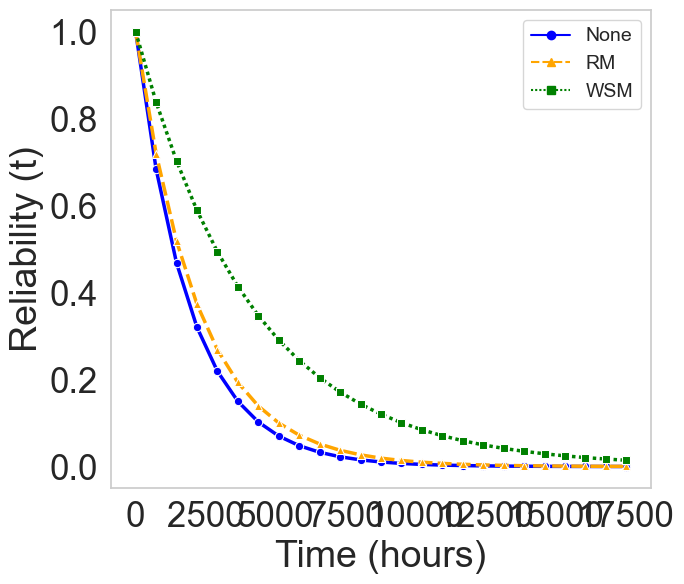

In [813]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Customize plotting parameters
font_size = 27
label_size = 27
line_width = 2.5
marker_size = 9  # Increase the marker size as needed

# Set the Seaborn style
sns.set(style="whitegrid")

# Define custom colors for each app
app_colors = {'None': 'blue', 'RM': 'orange', 'WSM': 'green', 'GekkoFS': 'red'}

# Define markers for each line
line_markers = {'None': 'o', 'RM': '^', 'WSM': 's', 'GekkoFS': 'D'}

# Create the line plot for Random Forest
plt.figure(figsize=(12, 8))
ax = sns.lineplot(
    data=dfRF.melt(id_vars='time (h)', var_name='App', value_name='Reliability (t)'),
    x='time (h)',
    y='Reliability (t)',
    hue='App',
    palette=app_colors,
    style='App',
    markers=line_markers,
    linewidth=line_width
)


# Set marker size for each line
for line in ax.lines:
    line.set_markersize(marker_size)

plt.xlabel('Time (hours)', fontsize=label_size)
plt.ylabel('Reliability (t)', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=23)
plt.tight_layout()
plt.grid(False)
plt.savefig('img/MLEvaluationReliability3AppsOverTimeWorstCaseRF.pdf', bbox_inches='tight')
plt.show()


# Create the line plot for XGBoost
plt.figure(figsize=(7, 6))
sns.lineplot(
    data=dfXGBoost.melt(id_vars='time (h)', var_name='App', value_name='Reliability (t)'),
    x='time (h)',
    y='Reliability (t)',
    hue='App',
    palette=app_colors,
    style='App',  # Ensure different markers are used
    markers=line_markers,  # Use custom markers
    linewidth=line_width
)
plt.xlabel('Time (hours)', fontsize=label_size)
plt.ylabel('Reliability (t)', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=14)
plt.tight_layout()
plt.grid(False)
plt.savefig('img/MLEvaluationReliability3AppsOverTimeWorstCaseXGBoost.pdf', bbox_inches='tight')
plt.show()


/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


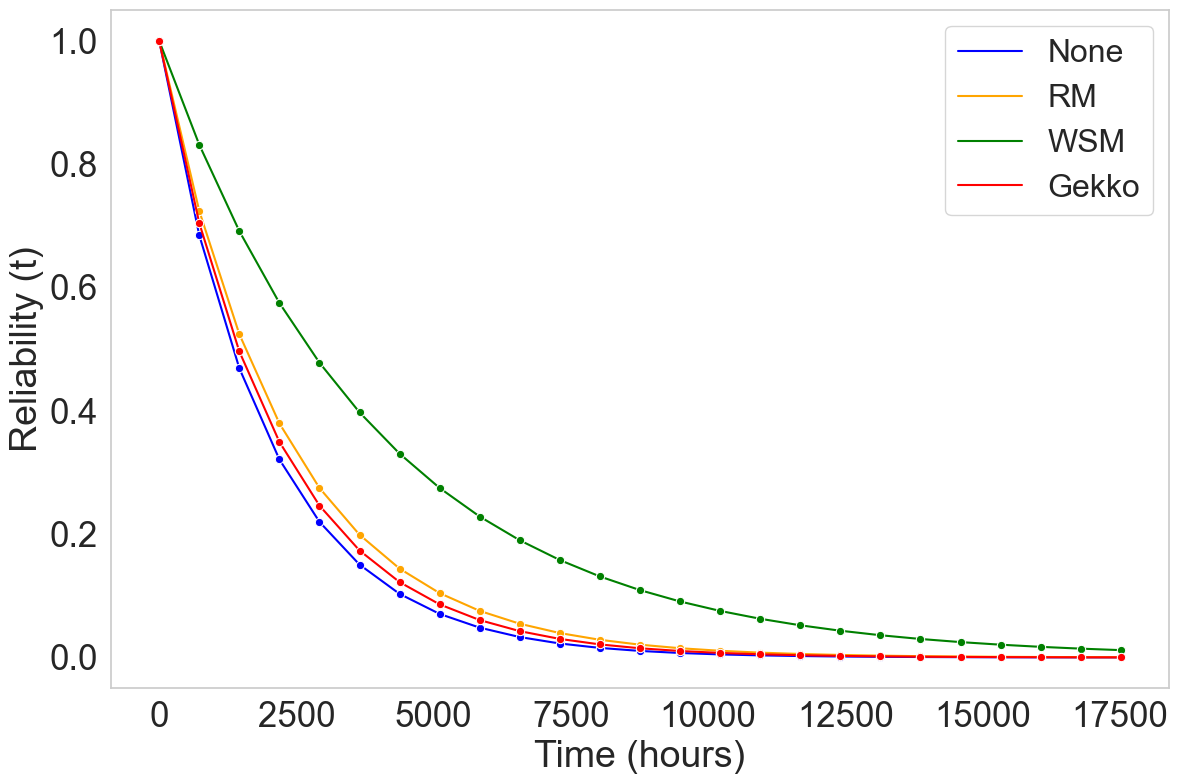

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


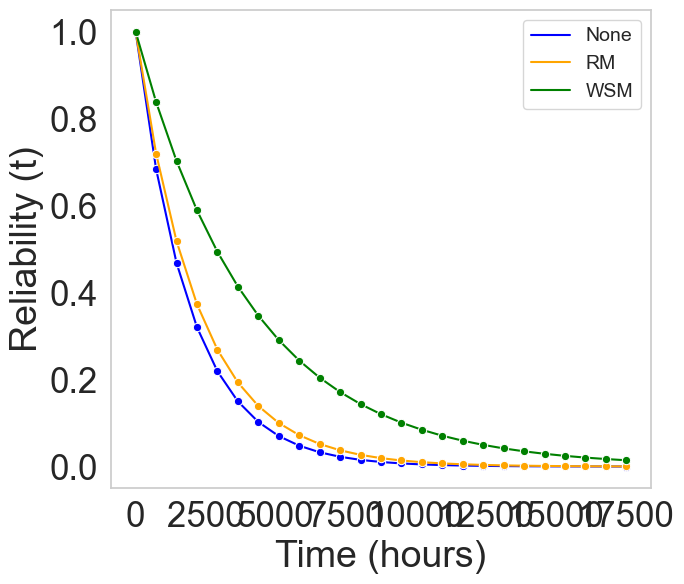

In [802]:
## Plotting worst case for the three apps (512 nodes and hightest AFR)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Customize plotting parameters
font_size = 27
title_size = 18
label_size = 27

# Set the Seaborn style
sns.set(style="whitegrid")

# Define custom colors for each app
app_colors = {'None': 'blue', 'RM': 'orange', 'WSM': 'green', 'Gekko': 'red'}

# Set common x-axis limits for both plots
#x_axis_limit = (0, max(dfRF['time (h)'].max(), dfXGBoost['time (h)'].max()) + 1)

# Create the line plot for Random Forest
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=dfRF.melt(id_vars='time (h)', var_name='App', value_name='Reliability (t)'),
    x='time (h)',
    y='Reliability (t)',
    hue='App',
    palette=app_colors,
    marker='o'
)
plt.xlabel('Time (hours)', fontsize=label_size)
plt.ylabel('Reliability (t)', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=23)
plt.tight_layout()
plt.grid(False)
#plt.xlim(x_axis_limit)  # Set common x-axis limits 
plt.savefig('img/MLEvaluationReliability3AppsOverTimeWorstCaseRF.pdf', bbox_inches='tight')
plt.show()

# Create the line plot for XGBoost
plt.figure(figsize=(7, 6))
sns.lineplot(
    data=dfXGBoost.melt(id_vars='time (h)', var_name='App', value_name='Reliability (t)'),
    x='time (h)',
    y='Reliability (t)',
    hue='App',
    palette=app_colors,
    marker='o'
)
plt.xlabel('Time (hours)', fontsize=label_size)
plt.ylabel('Reliability (t)', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=14)
plt.tight_layout()
plt.grid(False)
#plt.xlim(x_axis_limit)  # Set common x-axis limits
plt.savefig('img/MLEvaluationReliability3AppsOverTimeWorstCaseXGBoost.pdf', bbox_inches='tight')
plt.show()


In [328]:
## Computing RBDs to obtain system mean time to failure (mttr was not checked)
## Considering all blocks the same and only one type of arrangement (either series or parallel)

import pandas as pd
from decimal import Decimal, getcontext

def calculate_reliability_block_diagram(mtbf_values, mttr_values, num_blocks_values, system_type, application_names):
    results = []

    # Set decimal precision
    getcontext().prec = 10

    for mtbf, app_name in zip(mtbf_values, application_names):
        for mttr in mttr_values:
            for num_blocks in num_blocks_values:
                mtbf_decimal = Decimal(mtbf)  # Convert mtbf to Decimal
                mttr_decimal = Decimal(mttr)  # Convert mttr to Decimal

                if system_type == 'series':
                    system_mtbf = Decimal(1) / (sum([Decimal(1) / mtbf_decimal for _ in range(num_blocks)]))
                    system_mttr = sum([mttr_decimal for _ in range(num_blocks)])
                elif system_type == 'parallel':
                    system_mtbf = (((Decimal(1)) / (Decimal(1) / mtbf_decimal)) * (sum([Decimal(1) / i for i in range(1, num_blocks + 1)])))
                    system_mttr = mttr_decimal  # MTTR in parallel is the same as individual MTTR
                else:
                    raise ValueError("Invalid system_type. Use 'series' or 'parallel'.")
                
                results.append({
                    'Application_Name': app_name,
                    'Num_Blocks': num_blocks,
                    'MTBF_Input': mtbf,
                    'MTTR_Input': mttr,
                    'System_MTBF': system_mtbf,
                    'System_MTTR': system_mttr
                })

    return pd.DataFrame(results)

# Define application names corresponding to each MTBF value
application_names = ["none", 'RM', 'WSM', 'Gekko']  # Add more as needed

# Load mtbf_values from CSV
# mtbf_df = pd.read_csv('mtbf_values.csv')  # Replace 'mtbf_values.csv' with your file name
# mtbf_values = mtbf_df['MTBF'].to_numpy()

# mttf worst cases for None, RM, and WSM
# 64GiB (16 threads * 4GiB) because this is the volume used in GekoFS paper (Total LBAs written, sector size=512bytes)
mtbf_values = [987137.8067, 1157597.828, 2025612.832, 1066882,317]
mttr_values = [1]
num_blocks_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

# Specify system type ('series' or 'parallel')
system_type = 'series'

# Perform experiments and store results in a DataFrame
metrics_result = calculate_reliability_block_diagram(mtbf_values, mttr_values, num_blocks_values, system_type, application_names)
print(metrics_result)

# Save results to CSV (change the filename for the correct algorithm name)
metrics_result.to_csv('ExperimentalResults/RBDresultsRF.csv', index=False)


   Application_Name  Num_Blocks    MTBF_Input  MTTR_Input  System_MTBF  \
0              none           1  9.871378e+05           1  987137.8066   
1              none           2  9.871378e+05           1  493568.9033   
2              none           4  9.871378e+05           1  246784.4517   
3              none           8  9.871378e+05           1  123392.2258   
4              none          16  9.871378e+05           1  61696.11299   
5              none          32  9.871378e+05           1  30848.05655   
6              none          64  9.871378e+05           1  15424.02829   
7              none         128  9.871378e+05           1  7712.014113   
8              none         256  9.871378e+05           1  3856.007028   
9              none         512  9.871378e+05           1  1928.003507   
10               RM           1  1.157598e+06           1  1157597.828   
11               RM           2  1.157598e+06           1  578798.9141   
12               RM           4  1.157

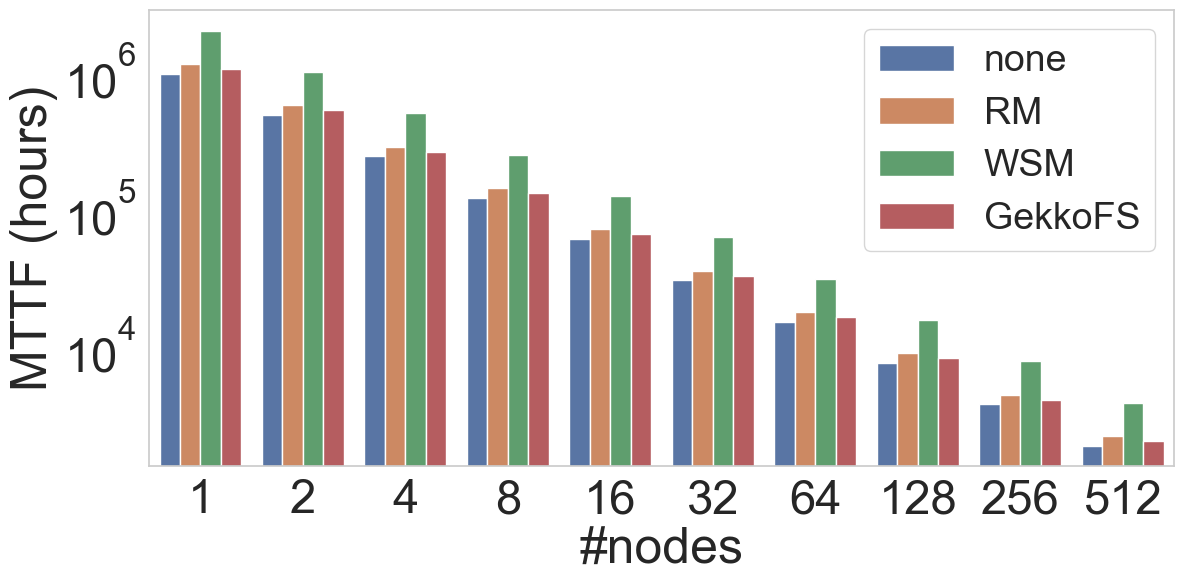

In [909]:
# Plotting the system's mttf as the number of nodes is increased. (Using for each node the worst mttf estimated using DMTTF)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
metrics_result = pd.read_csv('ExperimentalResults/RBDresultsRF.csv', sep=";")

# Customize plotting parameters
font_size =36
title_size = 18
label_size = 36

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the width of the bars
bar_width = 0.8

# List of application names
application_names = metrics_result['Application_Name'].unique()

# Plot system MTBF for each application
plt.figure(figsize=(12, 6))
sns.barplot(x='Num_Blocks', y='System_MTBF', hue='Application_Name', data=metrics_result, palette="deep", width=bar_width)
plt.ylabel('MTTF (hours)', fontsize=label_size)
plt.xlabel('#nodes', fontsize=label_size)
plt.xticks(fontsize=font_size-2)

# Set y-axis to logarithmic scale
plt.yscale('log')

plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=27)  # Adjust bbox_to_anchor for position
#plt.title('System MTBF for Different Applications', fontsize=title_size)
plt.tight_layout()
plt.grid(False)
plt.savefig('img/SystemMTTFEvaluationFunctionNodesPerApp.pdf', bbox_inches='tight')
plt.show()


<span style="color:red;font-weight:700;font-size:20px">
    As of this point, only Gekko Experiments
</span>

In [194]:
## For the gekko-related experiments
## Computing RBDs to obtain system mean time to failure (mttr was not checked)
## Considering all blocks the same and only one type of arrangement (either series or parallel)

import pandas as pd
from decimal import Decimal, getcontext

def calculate_reliability_block_diagram(mtbf_values, mttr_values, num_blocks_values, system_type, application_names):
    results = []

    # Set decimal precision
    getcontext().prec = 10

    for mtbf, app_name in zip(mtbf_values, application_names):
        for mttr in mttr_values:
            for num_blocks in num_blocks_values:
                mtbf_decimal = Decimal(mtbf)  # Convert mtbf to Decimal
                mttr_decimal = Decimal(mttr)  # Convert mttr to Decimal

                if system_type == 'series':
                    system_mtbf = Decimal(1) / (sum([Decimal(1) / mtbf_decimal for _ in range(num_blocks)]))
                    system_mttr = sum([mttr_decimal for _ in range(num_blocks)])
                elif system_type == 'parallel':
                    system_mtbf = (((Decimal(1)) / (Decimal(1) / mtbf_decimal)) * (sum([Decimal(1) / i for i in range(1, num_blocks + 1)])))
                    system_mttr = mttr_decimal  # MTTR in parallel is the same as individual MTTR
                else:
                    raise ValueError("Invalid system_type. Use 'series' or 'parallel'.")
                
                results.append({
                    'Application_Name': app_name,
                    'Num_Blocks': num_blocks,
                    'MTBF_Input': mtbf,
                    'MTTR_Input': mttr,
                    'System_MTBF': system_mtbf,
                    'System_MTTR': system_mttr
                })

    return pd.DataFrame(results)

# Define application names corresponding to each MTBF value
application_names = ['Gekko']  # Add more as needed

# Load mtbf_values from CSV
# mtbf_df = pd.read_csv('mtbf_values.csv')  # Replace 'mtbf_values.csv' with your file name
# mtbf_values = mtbf_df['MTBF'].to_numpy()

# mttf worst case for Gekko aplication 64GiB
number_hours_year = 365*24
mtbf_values = [number_hours_year/rf_predictions[0]] # 0.00821084
mttr_values = [1]
num_blocks_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

# Specify system type ('series' or 'parallel')
system_type = 'series'

# Perform experiments and store results in a DataFrame
metrics_result = calculate_reliability_block_diagram(mtbf_values, mttr_values, num_blocks_values, system_type, application_names)
print(metrics_result)

# Save results to CSV (change the filename for the correct algorithm name)
metrics_result.to_csv('ExperimentalResults/RBDresultsRFGekko.csv', index=False)


  Application_Name  Num_Blocks    MTBF_Input  MTTR_Input  System_MTBF  \
0            Gekko           1  1.066882e+06           1  1066881.928   
1            Gekko           2  1.066882e+06           1  533440.9638   
2            Gekko           4  1.066882e+06           1  266720.4819   
3            Gekko           8  1.066882e+06           1  133360.2409   
4            Gekko          16  1.066882e+06           1  66680.12058   
5            Gekko          32  1.066882e+06           1  33340.06034   
6            Gekko          64  1.066882e+06           1  16670.03018   
7            Gekko         128  1.066882e+06           1  8335.015152   
8            Gekko         256  1.066882e+06           1  4167.507651   
9            Gekko         512  1.066882e+06           1  2083.753844   

  System_MTTR  
0           1  
1           2  
2           4  
3           8  
4          16  
5          32  
6          64  
7         128  
8         256  
9         512  


In [196]:
# Moment matching technique, phase-type distributions and the respective parameters
# Technique utilized to approximate delays GekkoFS to phase-type distributions 

import numpy as np


def phase_approximation(mu_d, sigma_d):
    cv_inv = mu_d / sigma_d

    # Initialize gamma variable with a default value
    gamma = 0


    # Check for the case when mean and standard deviation are equal
    if np.isclose(mu_d, sigma_d):
        rate = 1/mu_d
        return f"Single timing transition assumed: rate = {rate}"

    # Check for Erlang subnet
    if cv_inv.is_integer() and cv_inv != 1:
        gamma = int(cv_inv**2)
        rate_lambda = gamma / mu_d
        return f"Erlang subnet: gamma = {gamma}, lambda = {rate_lambda}"

    # Check for hypoexponential subnet (fixing the condition)
    if mu_d > sigma_d:
        gamma_lower = float(cv_inv**2 - 1)
        gamma_upper = float(cv_inv**2)

        print(gamma_lower)
        print(gamma_upper)
        
        # Calculate gamma as an integer within the specified range
        gamma = int(np.round(np.average([gamma_lower, gamma_upper])))
        #gamma =2
        mu_1 = (mu_d + np.sqrt(gamma * (gamma + 1) * sigma_d**2 - gamma * mu_d**2)) / (gamma + 1)
        mu_2 = (gamma * mu_d - np.sqrt(gamma * (gamma + 1) * sigma_d**2 - gamma * mu_d**2)) / (gamma * (gamma + 1))
        lambda_1 = 1 / mu_1
        lambda_2 = 1 / mu_2
        return f"Hypoexponential subnet: gamma = {gamma}, lambda_1 = {lambda_1}, lambda_2 = {lambda_2}, mu_1 = {mu_1}, mu_2 = {mu_2}"

    # Check for hyperexponential subnet
    if mu_d < sigma_d:
        omega_1 = 2 * mu_d**2 / (mu_d**2 + sigma_d**2)
        omega_2 = 1 - omega_1
        rate_h = 2 * mu_d / (mu_d**2 + sigma_d**2)
        return f"Hyperexponential subnet: omega_1 = {omega_1}, omega_2 = {omega_2}, lambda_h = {rate_h}"

    return "Unknown distribution"

# Example usage:
mu_d_value = 348.17
sigma_d_value = 3.8159432

result = phase_approximation(mu_d_value, sigma_d_value)
print(result)


8323.897437263575
8324.897437263575
Hypoexponential subnet: gamma = 8324, lambda_1 = 18.110941331628045, lambda_2 = 23.911653180072292, mu_1 = 0.055215241532125654, mu_2 = 0.04182061325786495


In [210]:
## Loading Gekko performance values, calculating the respective phase type distributions/paramenters and 
## saving into a csv

import pandas as pd
import numpy as np
import math
import re
from itertools import zip_longest

def phase_approximation(mu_d, sigma_d):
    cv_inv = mu_d / sigma_d

    # Initialize gamma variable with a default value
    gamma = 0

    # Check for the case when mean and standard deviation are equal
    if np.isclose(mu_d, sigma_d):
        rate = 1 / mu_d
        return "Single timing transition assumed", {"rate": rate}

    # Check for Erlang subnet
    if cv_inv.is_integer() and cv_inv != 1:
        gamma = int(cv_inv**2)
        rate_lambda = gamma / mu_d
        return "Erlang subnet", {"gamma": gamma, "lambda": rate_lambda}

    # Check for hypoexponential subnet (fixing the condition)
    if mu_d > sigma_d:
        gamma_lower = float(cv_inv**2 - 1)
        gamma_upper = float(cv_inv**2)

        # Calculate gamma as an integer within the specified range
        gamma = int(np.round(np.average([gamma_lower, gamma_upper])))
        mu_1 = (mu_d + np.sqrt(gamma * (gamma + 1) * sigma_d**2 - gamma * mu_d**2)) / (gamma + 1)
        mu_2 = (gamma * mu_d - np.sqrt(gamma * (gamma + 1) * sigma_d**2 - gamma * mu_d**2)) / (gamma * (gamma + 1))
        lambda_1 = 1 / mu_1
        lambda_2 = 1 / mu_2
        return "Hypoexponential subnet", {"gamma": gamma, "lambda_1": lambda_1, "lambda_2": lambda_2, "mu_1": mu_1, "mu_2": mu_2}

    # Check for hyperexponential subnet
    if mu_d < sigma_d:
        omega_1 = 2 * mu_d**2 / (mu_d**2 + sigma_d**2)
        omega_2 = 1 - omega_1
        rate_h = 2 * mu_d / (mu_d**2 + sigma_d**2)
        return "Hyperexponential subnet", {"omega_1": omega_1, "omega_2": omega_2, "lambda_h": rate_h}

    return "Unknown distribution", {}

def process_csv_data(write_avg_file_path, write_std_file_path, output_file_path):
    # Load CSV data for write average
    write_avg_data = pd.read_csv(write_avg_file_path, comment='!', skipinitialspace=True, sep=';')

    # Load CSV data for standard deviation
    write_std_data = pd.read_csv(write_std_file_path, comment='!', skipinitialspace=True, sep=';')

    # Initialize an empty list to store DataFrames
    result_list = []

    # Extract column names from the first row
    column_names = write_avg_data.columns.values

    # Iterate over rows in the write_avg_data DataFrame
    for index, row in write_avg_data.iterrows():
        nodes = row.iloc[0]
        object_sizes = column_names[1:]

        # Clean the "Mean" column by extracting numeric values
        mean_values = row.iloc[1:].apply(lambda x: float(re.search(r'\d+\.\d+|\d+', str(x)).group()) if pd.notnull(x) else np.nan)

        # Check if the index is within the valid range for write_std_data
        if index < len(write_std_data):
            # Find the corresponding row in the write_std_data DataFrame
            std_row = write_std_data.iloc[index, 1:].apply(lambda x: float(x) if pd.notnull(x) else np.nan)

            # Initialize lists to store results and parameters
            distribution_results = []
            gamma_list = []
            lambda_1_list = []
            lambda_2_list = []
            mu_1_list = []
            mu_2_list = []
            omega_1_list = []
            omega_2_list = []
            rate_h_list = []
            sigma_d_list = []  

            # Iterate over object sizes, mean values, and standard deviation values
            for obj_size, mu_d, std_percent in zip_longest(object_sizes, mean_values, std_row, fillvalue=np.nan):
                # Calculate absolute standard deviation
                sigma_d = mu_d * abs(float(std_percent))
                sigma_d_list.append(sigma_d)

                # Apply the phase approximation function
                result, params = phase_approximation(mu_d, sigma_d)

                # Extract parameters for each distribution type
                if result == "Erlang subnet":
                    gamma_list.append(params.get("gamma", np.nan))
                    lambda_1_list.append(params.get("lambda", np.nan))
                    lambda_2_list.append(np.nan)
                    mu_1_list.append(np.nan)
                    mu_2_list.append(np.nan)
                    omega_1_list.append(np.nan)
                    omega_2_list.append(np.nan)
                    rate_h_list.append(np.nan)
                elif result == "Hypoexponential subnet":
                    gamma_list.append(params.get("gamma", np.nan))
                    lambda_1_list.append(params.get("lambda_1", np.nan))
                    lambda_2_list.append(params.get("lambda_2", np.nan))
                    mu_1_list.append(params.get("mu_1", np.nan))
                    mu_2_list.append(params.get("mu_2", np.nan))
                    omega_1_list.append(np.nan)
                    omega_2_list.append(np.nan)
                    rate_h_list.append(np.nan)
                elif result == "Hyperexponential subnet":
                    gamma_list.append(np.nan)
                    lambda_1_list.append(np.nan)
                    lambda_2_list.append(np.nan)
                    mu_1_list.append(np.nan)
                    mu_2_list.append(np.nan)
                    omega_1_list.append(params.get("omega_1", np.nan))
                    omega_2_list.append(params.get("omega_2", np.nan))
                    rate_h_list.append(params.get("lambda_h", np.nan))
                else:
                    gamma_list.append(np.nan)
                    lambda_1_list.append(np.nan)
                    lambda_2_list.append(np.nan)
                    mu_1_list.append(np.nan)
                    mu_2_list.append(np.nan)
                    omega_1_list.append(np.nan)
                    omega_2_list.append(np.nan)
                    rate_h_list.append(np.nan)

                # Append the result to the list
                distribution_results.append(result)

            # Calculate the inverse of mean values
            inverse_mean_values = mean_values.apply(lambda x: 1 / x if pd.notnull(x) and x != 0 else np.nan)

            # Create a dictionary for each row
            row_dict = {
                "Nodes": [nodes] * len(object_sizes),
                "Object Size": object_sizes.tolist(),
                "Mean": mean_values.tolist(),
                "Inverse Mean": inverse_mean_values.tolist(),  # Add the inverse mean values here
                "Standard Deviation": std_row.tolist(),
                "Sigma_d": sigma_d_list,  
                "Distribution": distribution_results,
                "Gamma": gamma_list,
                "Lambda_1": lambda_1_list,
                "Lambda_2": lambda_2_list,
                "Mu_1": mu_1_list,
                "Mu_2": mu_2_list,
                "Omega_1": omega_1_list,
                "Omega_2": omega_2_list,
                "Rate_H": rate_h_list
            }

            # Append the dictionary to the list of DataFrames
            result_list.append(pd.DataFrame(row_dict))
        else:
            print(f"Index {index} is out of bounds for write_std_data.")

    # Check if there are DataFrames in the result_list before concatenating
    if result_list:
        # Concatenate the list of DataFrames
        result_df = pd.concat(result_list, ignore_index=True)

        # Save the results to a new CSV file
        result_df.to_csv(output_file_path, index=False)

        # Display the result DataFrame
        print(result_df)
    else:
        print("No valid data to concatenate.")

# Specify the file paths for GekkoSeq
write_avg_file_path_gekko_seq = "ExperimentalResults/gekkofs_seq_fpp.csv"
write_std_file_path_gekko_seq = "ExperimentalResults/gekkofs_seq_fpp_std.csv"
output_file_path_gekko_seq = "ExperimentalResults/MomentMatchingGekkoSeq.csv"

# Specify the file paths for GekkoRd
write_avg_file_path_gekko_rd = "ExperimentalResults/gekkofs_rd_fpp.csv"
write_std_file_path_gekko_rd = "ExperimentalResults/gekkofs_rd_fpp_std.csv"
output_file_path_gekko_rd = "ExperimentalResults/MomentMatchingGekkoRd.csv"

# Process GekkoSeq data
process_csv_data(write_avg_file_path_gekko_seq, write_std_file_path_gekko_seq, output_file_path_gekko_seq)

# Process GekkoRd data
process_csv_data(write_avg_file_path_gekko_rd, write_std_file_path_gekko_rd, output_file_path_gekko_rd)


    Nodes Object Size       Mean  Inverse Mean  Standard Deviation  \
0     1.0         64m     348.17      0.002872             0.01096   
1     1.0          1m     346.22      0.002888             0.00734   
2     1.0         64k     293.09      0.003412             0.10709   
3     1.0          8k     273.30      0.003659             0.02115   
4     2.0         64m     675.46      0.001480             0.01584   
5     2.0          1m     665.46      0.001503             0.01574   
6     2.0         64k     553.12      0.001808             0.09627   
7     2.0          8k     460.77      0.002170             0.02274   
8     4.0         64m    1377.70      0.000726             0.01279   
9     4.0          1m    1384.93      0.000722             0.00840   
10    4.0         64k    1223.63      0.000817             0.10998   
11    4.0          8k    1091.77      0.000916             0.02258   
12    8.0         64m    2532.82      0.000395             0.01113   
13    8.0          1

In [306]:
df1

node object_size   MTTR  Mean_gekko    std_gekko  th_performabilitymodel
0      1        64MB    600      318.61     2.963073            3.186089e+02
1      1         1MB    600      318.48     1.541443            3.184789e+02
2      1        64KB    600      290.39    17.739925            2.903891e+02
3      1         8KB    600      246.84     3.097842            2.468393e+02
4      1        64MB   3600      318.61     2.963073            2.928055e-03
..   ...         ...    ...         ...          ...                     ...
115  512         8KB   3600    65171.17  6042.019171            4.913606e+04
116  512        64MB  86400   141109.55  1775.158139            1.703417e-09
117  512         1MB  86400   137138.78  1073.796647            1.703406e-09
118  512        64KB  86400   125049.02  6803.917178            1.703372e-09
119  512         8KB  86400    65171.17  6042.019171            1.703203e-09

[120 rows x 6 columns]

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1070193964.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='node', y='Mean_gekko', hue='object_size', data=df, palette='deep', ci=None)


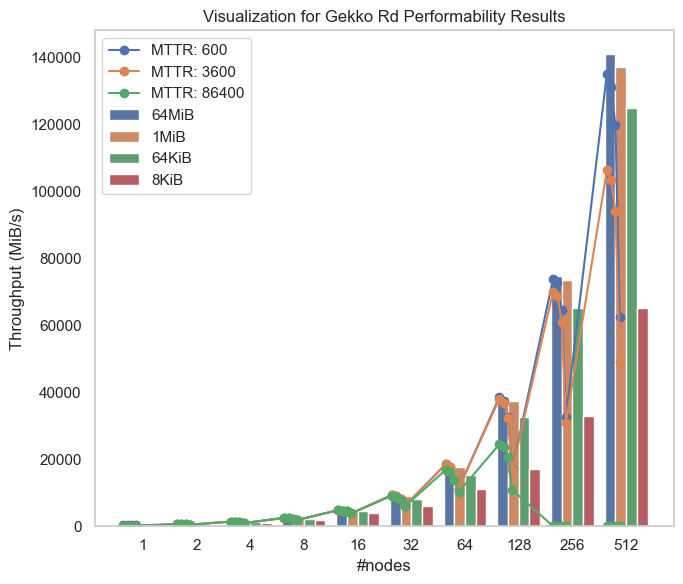

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1070193964.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='node', y='Mean_gekko', hue='object_size', data=df, palette='deep', ci=None)


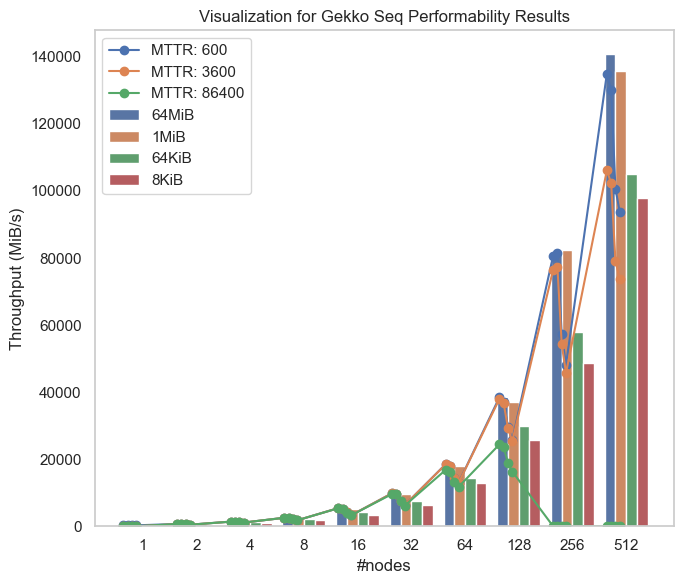

In [350]:
## Plotting not used ... It is here just in case

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV files into DataFrames
df1 = pd.read_csv('ExperimentalResults/gekkoRdPerformabilityResults.csv', sep=';')
df2 = pd.read_csv('ExperimentalResults/gekkoSeqPerformabilityResults.csv', sep=';')

# Function to create the plots
def create_plots(df, title):
    # Convert to appropriate types
    df['node'] = df['node'].astype(str)
    df['object_size'] = df['object_size'].astype(str)
    df['MTTR'] = df['MTTR'].astype(str)

    # Plotting
    plt.figure(figsize=(7, 6))

    # Create the bar plot for Mean_gekko
    sns.barplot(x='node', y='Mean_gekko', hue='object_size', data=df, palette='deep', ci=None)

    # Unique values for nodes, object sizes, and MTTR
    nodes = df['node'].unique()
    object_sizes = df['object_size'].unique()
    mttrs = df['MTTR'].unique()

    # Number of bars per group
    n_bars = len(object_sizes)

    # Width of a group of bars
    group_width = n_bars / (n_bars + 1)

    # Calculate the width of each bar
    bar_width = group_width / len(nodes)

    # Calculate the center position for each bar group
    group_centers = np.arange(len(nodes))

    # For each MTTR, we plot a line
    for mttr in mttrs:
        mttr_values = []
        x_positions = []
        for node_index, node in enumerate(nodes):
            for object_index, object_size in enumerate(object_sizes):
                condition = (df['MTTR'] == mttr) & (df['node'] == node) & (df['object_size'] == object_size)
                mttr_data = df[condition]['th_performabilitymodel']
                mttr_values.append(mttr_data.mean() if not mttr_data.empty else np.nan)

                # Calculate x position for the line
                x_pos = group_centers[node_index] - group_width/2 + bar_width/2 + object_index * bar_width
                x_positions.append(x_pos)

        # Plotting the line
        plt.plot(x_positions, mttr_values, label=f'MTTR: {mttr}', marker='o')

    plt.title(title)
    plt.ylabel('Throughput (MiB/s)')
    plt.xlabel('#nodes')
    #plt.yscale('log')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Create plots for each DataFrame
create_plots(df1, 'Visualization for Gekko Rd Performability Results')
create_plots(df2, 'Visualization for Gekko Seq Performability Results')


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node'] = df['node'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_size'] = df['object_size'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

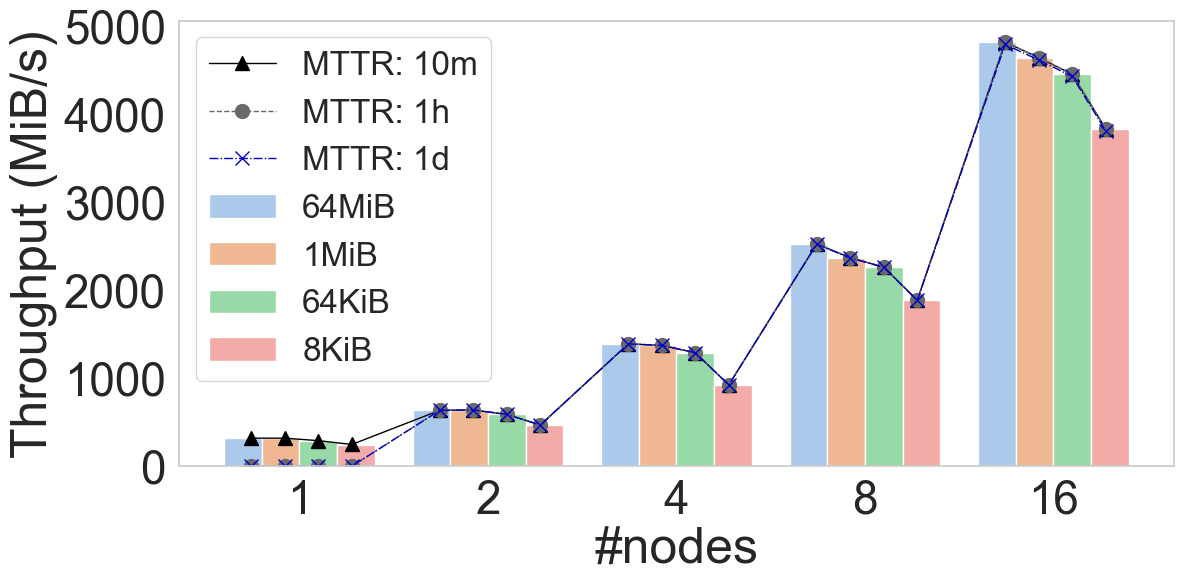

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node'] = df['node'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_size'] = df['object_size'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

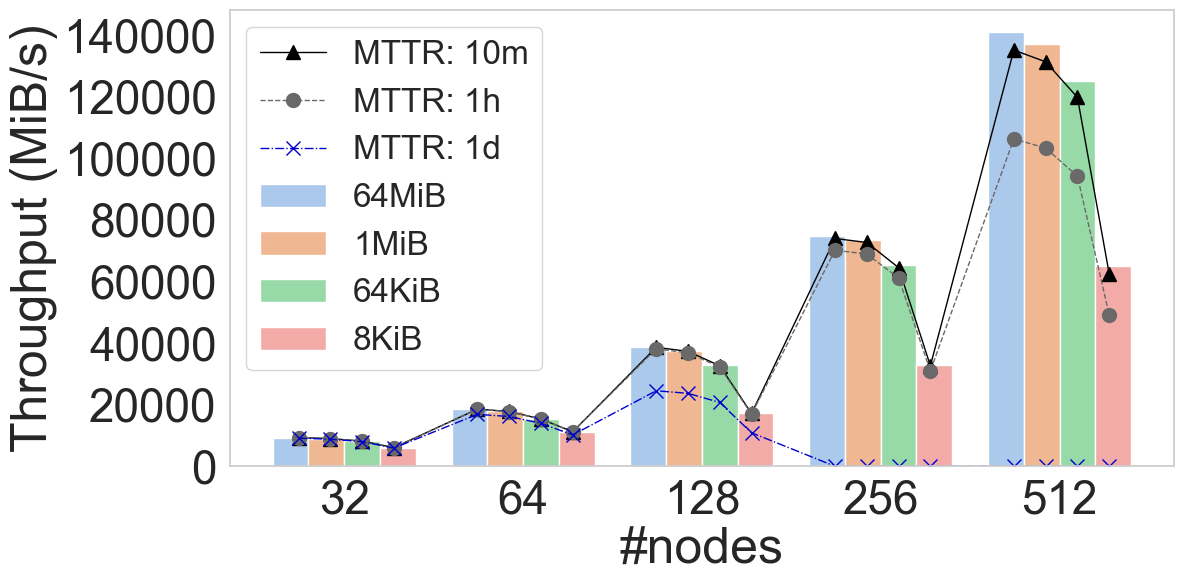

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node'] = df['node'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_size'] = df['object_size'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

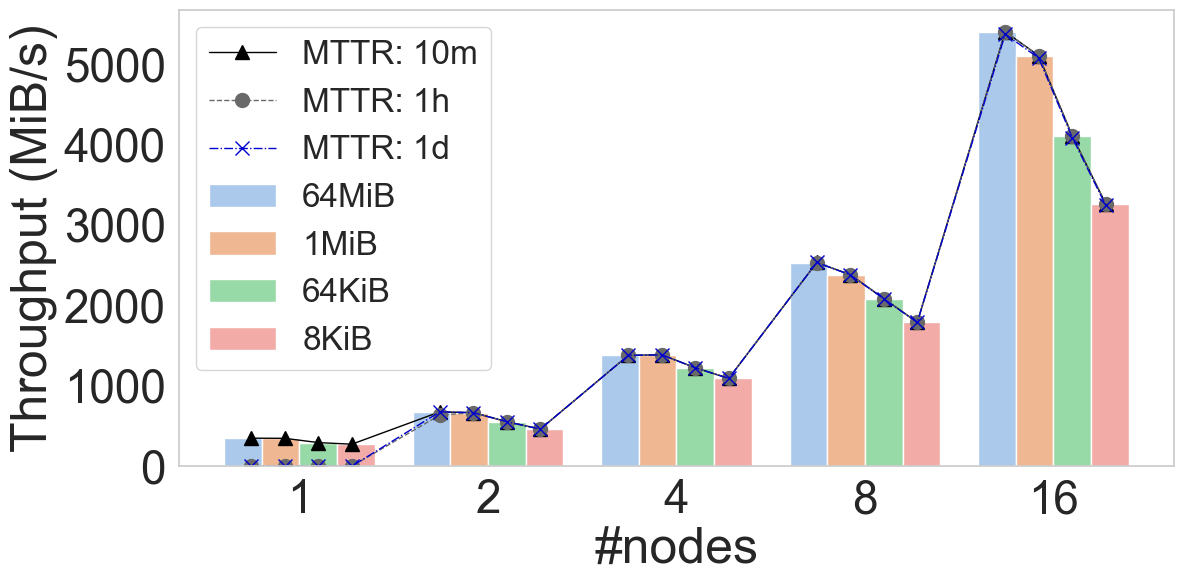

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node'] = df['node'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_size'] = df['object_size'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

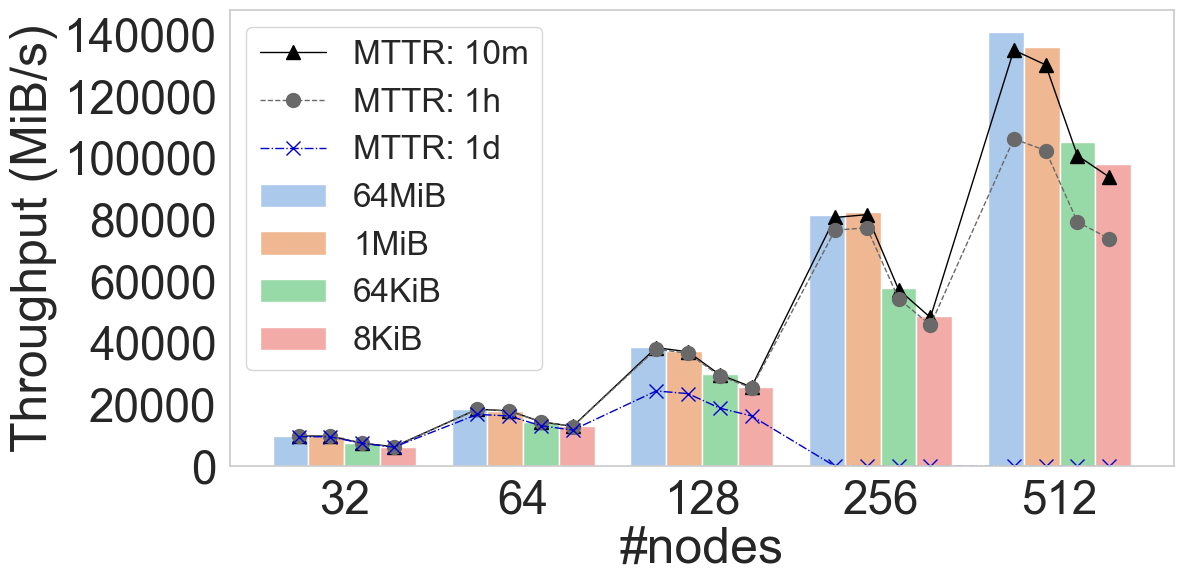

In [913]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV files into DataFrames
df1 = pd.read_csv('ExperimentalResults/gekkoRdPerformabilityResults.csv', sep=';')
df2 = pd.read_csv('ExperimentalResults/gekkoSeqPerformabilityResults.csv', sep=';')

def create_plots(df, title, filename):
    # Convert to appropriate types
    df['node'] = df['node'].astype(str)
    df['object_size'] = df['object_size'].astype(str)
    df['MTTR'] = df['MTTR'].astype(str)

    # Adding a small constant to all th_performabilitymodel values
    small_constant = 1
    df['th_performabilitymodel_adjusted'] = df['th_performabilitymodel'] + small_constant

    # Plotting
    plt.figure(figsize=(12, 6))

    # Create the bar plot for Mean_gekko
    sns.barplot(x='node', y='Mean_gekko', hue='object_size', data=df, palette='pastel')

    # Unique values for nodes, object sizes, and MTTR
    nodes = df['node'].unique()
    object_sizes = df['object_size'].unique()
    mttrs = df['MTTR'].unique()

    # Number of bars per group
    n_bars = len(object_sizes)

    # Width of a group of bars
    group_width = n_bars / (n_bars + 0.5)

    # Calculate the width of each bar
    bar_width = group_width / len(nodes)

    # Calculate the center position for each bar group
    group_centers = np.arange(len(nodes))

    # Define a list of colors for the lines
    line_colors = ['black', 'dimgray', 'mediumblue']
    # Define a list of markers
    markers = ['^', 'o',  'x', 's', 'D',  'v', '<', '>']
    # Define a list of line styles
    line_styles = ['-', '--', '-.', ':']

    # Define a small offset
    offset = 0.1  # Adjust this value as needed

    # For each MTTR, we plot a line with a specific color, marker, and line style
    for mttr_index, mttr in enumerate(mttrs):
        mttr_values = []
        x_positions = []
        for node_index, node in enumerate(nodes):
            for object_index, object_size in enumerate(object_sizes):
                condition = (df['MTTR'] == mttr) & (df['node'] == node) & (df['object_size'] == object_size)
                mttr_data = df[condition]['th_performabilitymodel_adjusted']
                mttr_values.append(mttr_data.mean() if not mttr_data.empty else np.nan)

                # Calculate x position for the line
                x_pos = group_centers[node_index] - group_width/2 + bar_width/2 + object_index * bar_width + offset
                x_positions.append(x_pos)

        # Use the color, marker, and line style from the lists, cycling if necessary
        color = line_colors[mttr_index % len(line_colors)]
        marker = markers[mttr_index % len(markers)]
        line_style = line_styles[mttr_index % len(line_styles)]

        # Plotting the line with the specified color, marker, and line style
        plt.plot(x_positions, mttr_values, label=f'MTTR: {mttr}', marker=marker, linestyle=line_style, color=color, linewidth=1.0, markersize=10)

    # Customize plotting parameters
    font_size =36
    title_size = 18
    label_size = 36
    plt.ylabel('Throughput (MiB/s)', fontsize=label_size)
    plt.xlabel('#nodes', fontsize=label_size)
    plt.legend(fontsize=24)
    plt.xticks(fontsize=label_size-3)
    plt.yticks(fontsize=label_size-3)
    #plt.yscale('log')
    plt.grid(False)
    plt.tight_layout()
    # Save the figure as a PDF
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    plt.show()

# Filter dataframes for nodes 1 to 32 and 64 to 512
df1_nodes_1_to_32 = df1[df1['node'].astype(int) <= 16]
df1_nodes_64_to_512 = df1[df1['node'].astype(int) >= 32]

df2_nodes_1_to_32 = df2[df2['node'].astype(int) <= 16]
df2_nodes_64_to_512 = df2[df2['node'].astype(int) >= 32]

# Create plots for each filtered DataFrame
create_plots(df1_nodes_1_to_32, 'Gekko Rd Performability Results (Nodes 1 to 32)', 'img/GekkoPerformabilityRd1-16.pdf')
create_plots(df1_nodes_64_to_512, 'Gekko Rd Performability Results (Nodes 64 to 512)', 'img/GekkoPerformabilityRd32-512.pdf')

create_plots(df2_nodes_1_to_32, 'Gekko Seq Performability Results (Nodes 1 to 32)', 'img/GekkoPerformabilitySeq1-16.pdf')
create_plots(df2_nodes_64_to_512, 'Gekko Seq Performability Results (Nodes 64 to 512)', 'img/GekkoPerformabilitySeq32-512.pdf')


<span style="color:red;font-weight:700;font-size:20px">
    As of this point, LQCD and ECMWF case study
</span>

In [424]:
# Extracting insights from LQCD and ECMWF json datasets

import os
import json
import pandas as pd

# Directory containing the folders
##Change here between ECMWF and LQCD
base_directory = 'LQCD'

# Initialize lists to store aggregated data
accessPatternWrite_agg = [0, 0, 0, 0]  # random, sequential, stride, unclassified
ioSizesWrite_agg = [0, 0, 0, 0, 0, 0, 0]  # [0B, 16B], [16B, 4KB], ..., [128MB, +]
operationsCount_write_agg = 0
volume_write_agg = 0

# Function to process each file
def process_file(file_path, data_type):
    with open(file_path, 'r') as file:
        data = json.load(file)
        for entry in data:
            if data_type == 'accessPatternWrite':
                for i in range(1, 5):  # Skip timestamp, process 4 data points
                    accessPatternWrite_agg[i-1] += entry[i]
            elif data_type == 'ioSizesWrite':
                for i in range(1, 8):  # Skip timestamp, process 7 data points
                    ioSizesWrite_agg[i-1] += entry[i]
            elif data_type == 'operationsCount':
                global operationsCount_write_agg
                operationsCount_write_agg += entry[1]  # Second element is write count
            elif data_type == 'volume':
                global volume_write_agg
                volume_write_agg += entry[2]  # Third element is write volume

# Traverse through the directories and process files
for folder in os.listdir(base_directory):
    folder_path = os.path.join(base_directory, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if 'accessPatternWrite' in file:
                process_file(file_path, 'accessPatternWrite')
            elif 'ioSizesWrite' in file:
                process_file(file_path, 'ioSizesWrite')
            elif 'operationsCount' in file:
                process_file(file_path, 'operationsCount')
            elif 'volume' in file:
                process_file(file_path, 'volume')

# Calculate proportions for accessPatternWrite and ioSizesWrite
accessPatternWrite_proportion = [x / sum(accessPatternWrite_agg) for x in accessPatternWrite_agg]
ioSizesWrite_proportion = [x / sum(ioSizesWrite_agg) for x in ioSizesWrite_agg]

# Create a DataFrame and save to CSV
df = pd.DataFrame({
    'Metric': ['AccessPatternWrite_Sum', 'AccessPatternWrite_Proportion', 
               'IoSizesWrite_Sum', 'IoSizesWrite_Proportion', 
               'OperationsCountWrite', 'VolumeWrite'],
    'Value': [accessPatternWrite_agg, accessPatternWrite_proportion, 
              ioSizesWrite_agg, ioSizesWrite_proportion, 
              operationsCount_write_agg, volume_write_agg]
})

##Change here between ECMWF and LQCD
df.to_csv('ExperimentalResults/LQCD_insights.csv', index=False)

# Displaying the DataFrame
df


Metric  \
0         AccessPatternWrite_Sum   
1  AccessPatternWrite_Proportion   
2               IoSizesWrite_Sum   
3        IoSizesWrite_Proportion   
4           OperationsCountWrite   
5                    VolumeWrite   

                                               Value  
0                             [0, 911080, 360, 2101]  
1  [0.0, 0.9973060869736553, 0.000394070983130478...  
2                  [17, 137, 839151, 74236, 0, 0, 0]  
3  [1.8608907536717016e-05, 0.0001499659019135430...  
4                                             164392  
5                                        26577730577

In [449]:
## Performing composite desirability using LQCD and ECMWF performability results and saving into a csv

import pandas as pd

# Load the CSV
df = pd.read_csv('ExperimentalResults/node_combinationsLQCDECMWF.csv', sep=';')

# Function to calculate individual desirability
def desirability(value, high_best=True, low=0, high=1):
    if high_best:
        return (value - low) / (high - low)
    else:
        return (high - value) / (high - low)

# Calculation of composite desirability
performability_10m_max = df['Performability_Combined_10m'].max()
performability_1h_max = df['Performability_Combined_1h'].max()
performability_1d_max = df['Performability_Combined_1d'].max()
nodes_ecmwf_max = df['Number_Nodes_ECMWF'].max()
nodes_lqcd_max = df['Number_Nodes_LQCD'].max()

calc_df = pd.DataFrame()
calc_df['Desirability_Performability_10m'] = df['Performability_Combined_10m'].apply(lambda x: desirability(x, high_best=True, low=0, high=performability_10m_max))
calc_df['Desirability_Performability_1h'] = df['Performability_Combined_1h'].apply(lambda x: desirability(x, high_best=True, low=0, high=performability_1h_max))
calc_df['Desirability_Performability_1d'] = df['Performability_Combined_1d'].apply(lambda x: desirability(x, high_best=True, low=0, high=performability_1d_max))
calc_df['Desirability_Nodes_ECMWF'] = df['Number_Nodes_ECMWF'].apply(lambda x: desirability(x, high_best=False, low=0, high=nodes_ecmwf_max))
calc_df['Desirability_Nodes_LQCD'] = df['Number_Nodes_LQCD'].apply(lambda x: desirability(x, high_best=False, low=0, high=nodes_lqcd_max))

# Calculate Composite Desirability using geometric mean
n_factors = 5
calc_df['CompositeDesirability'] = (calc_df['Desirability_Performability_10m'] * calc_df['Desirability_Performability_1h'] * calc_df['Desirability_Performability_1d'] * calc_df['Desirability_Nodes_ECMWF'] * calc_df['Desirability_Nodes_LQCD']) ** (1/n_factors)

# Add the composite desirability to the original DataFrame
df = pd.concat([df, calc_df['CompositeDesirability']], axis=1)

# Sort DataFrame based on CompositeDesirability in descending order and reset index
df_sorted = df.sort_values(by='CompositeDesirability', ascending=False).reset_index(drop=True)

# Save the sorted DataFrame to a new CSV file
df_sorted.to_csv('ExperimentalResults/updated_node_combinationsLQCDECMWF.csv', index=False)


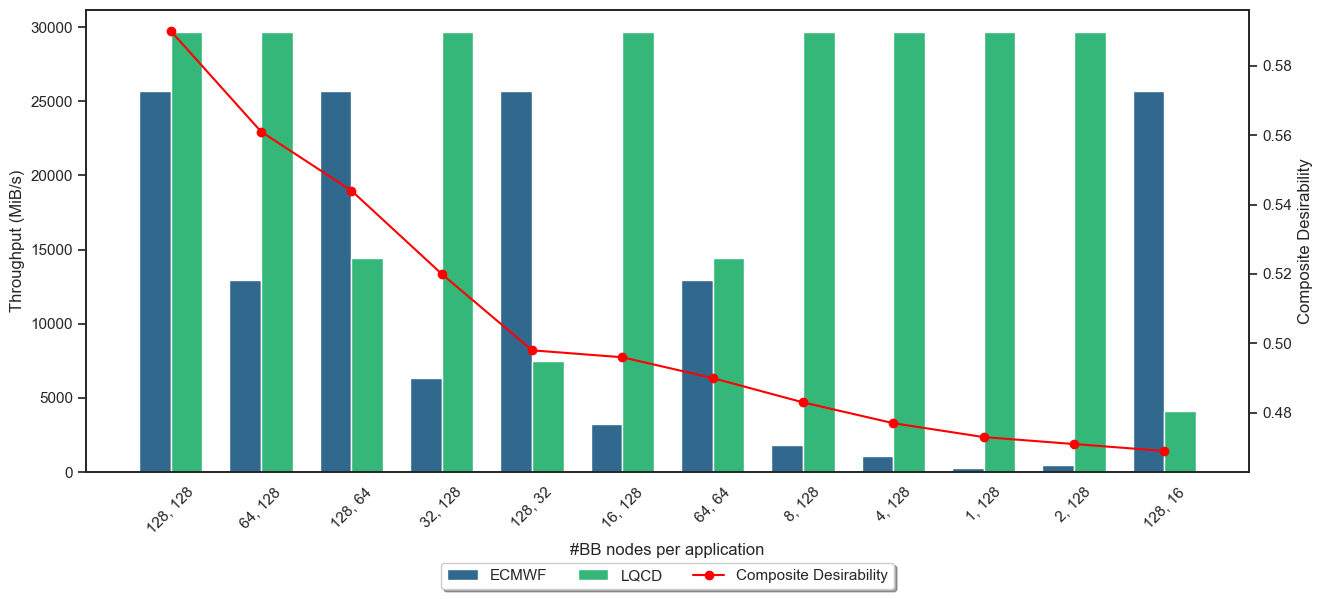

In [869]:
## Plotting composite desirability using LQCD and ECMWF performability results

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data = {
    'Number_Nodes_ECMWF': [128, 64, 128, 32, 128, 16, 64, 8, 4, 1, 2, 128],
    'Performance_ECMWF_10m': [25710.49, 12922.84, 25710.49, 6324.83, 25710.49, 3262.02, 12922.84, 1789.24, 1091.75, 273.29, 460.76, 25710.49],
    'Number_Nodes_LQCD': [128, 128, 64, 128, 32, 128, 64, 128, 128, 128, 128, 16],
    'Performance_LQCD_10m': [29680.79, 29680.79, 14441.09, 29680.79, 7460.96, 29680.79, 14441.09, 29680.79, 29680.79, 29680.79, 29680.79, 4110.26],
    'Composite_Desirability': [0.590, 0.561, 0.544, 0.520, 0.498, 0.496, 0.490, 0.483, 0.477, 0.473, 0.471, 0.469]
}

df = pd.DataFrame(data)

# Seaborn style
sns.set(style="white")

# Figure size
fig, ax = plt.subplots(figsize=(15, 6))
ax2 = ax.twinx()

# Bar settings
bar_width = 0.35
index = np.arange(df.shape[0])

# Define a color palette
palette = sns.color_palette("viridis", n_colors=2)  # You can choose any palette

# Plotting the bars
bar1 = ax.bar(index - bar_width/2, df['Performance_ECMWF_10m'], bar_width, label='Performance ECMWF 10m', color=palette[0])
bar2 = ax.bar(index + bar_width/2, df['Performance_LQCD_10m'], bar_width, label='Performance LQCD 10m', color=palette[1])

# Plotting the Composite Desirability line
line1, = ax2.plot(index, df['Composite_Desirability'], color='red', label='Composite Desirability', marker='o')

# Axis settings
ax.set_xlabel('#BB nodes per application')
ax.set_ylabel('Throughput (MiB/s)')
ax.set_xticks(index)
ax.set_xticklabels(df['Number_Nodes_ECMWF'].astype(str) + ', ' + df['Number_Nodes_LQCD'].astype(str), rotation=45)
ax2.set_ylabel('Composite Desirability')

# Disable grid
ax.grid(False)
ax2.grid(False)

# Create combined legend
handles, labels = [bar1, bar2, line1], ['ECMWF', 'LQCD', 'Composite Desirability']
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=3)

plt.savefig('img/CompositeDesirability.pdf', bbox_inches='tight')
plt.show()


In [906]:
import pandas as pd
import numpy as np

# Given data
data = {
    'Number_Nodes_ECMWF': [512, 256, 128, 64, 32, 16, 8, 4, 2, 1],
    'Performance_ECMWF_10m': [93760.21, 48215.94, 25710.49, 12922.84, 6324.83, 3262.02, 1789.24, 1091.75, 460.76, 273.29],
    'Energy_ECMWF_10M': [((93760.21*256)*(0.0008643)), ((48215.94*256)*(0.0008643)), ((25710.49*256)*(0.0008643)), ((12922.84*256)*(0.0008643)), ((6324.83*256)*(0.0008643)), ((3262.02*256)*(0.0008643)), ((1789.24*256)*(0.0008643)), ((1091.75*256)*(0.0008643)), ((460.76*256)*(0.0008643)), ((273.29*256)*(0.0008643))],
    'Number_Nodes_Gekko_1MB': [512, 256, 128, 64, 32, 16, 8, 4, 2, 1],
    'Performance_Gekko_1MB_10m': [130098.41, 81554.97, 37092.36, 17942.70, 9751.51, 2381.57, 5104.47, 1384.90, 665.45, 346.21],
    'Energy_Gekko_1MB': [(130098.41*0.0075362), (81554.97*0.0075362), (37092.36*0.0075362), (17942.70*0.0075362), (9751.51*0.0075362), (2381.57*0.0075362), (5104.47*0.0075362), (1384.90*0.0075362), (665.45*0.0075362), (346.21*0.0075362)]
}

# Ensure all arrays have the same length
min_length = min(map(len, data.values()))
data = {key: value[:min_length] for key, value in data.items()}

# Create a DataFrame from the given data
df = pd.DataFrame(data)

# Function to calculate individual desirability
def desirability(value, high_best=True, low=0, high=1):
    if high_best:
        return (value - low) / (high - low)
    else:
        return (high - value) / (high - low)

# Calculation of composite desirability
perform_ecmwf_max = df['Performance_ECMWF_10m'].max()
perform_gekko_max = df['Performance_Gekko_1MB_10m'].max()
energy_ecmwf_min = df['Energy_ECMWF_10M'].min()
energy_gekko_min = df['Energy_Gekko_1MB'].min()

# Calculate individual desirabilities for performance and energy
df['Desirability_Perform_ECMWF'] = df['Performance_ECMWF_10m'].apply(lambda x: desirability(x, high_best=True, low=0, high=perform_ecmwf_max))
df['Desirability_Perform_Gekko'] = df['Performance_Gekko_1MB_10m'].apply(lambda x: desirability(x, high_best=True, low=0, high=perform_gekko_max))
df['Desirability_Energy_ECMWF'] = df['Energy_ECMWF_10M'].apply(lambda x: desirability(x, high_best=False, low=0, high=energy_ecmwf_min))
df['Desirability_Energy_Gekko'] = df['Energy_Gekko_1MB'].apply(lambda x: desirability(x, high_best=False, low=0, high=energy_gekko_min))

# Calculate Composite Desirability using geometric mean for performance and energy
n_factors = 4  # Adjust the number of factors accordingly
df['Composite_Desirability'] = np.prod(df.iloc[:, -4:], axis=1) ** (1/n_factors)

# Normalize Composite Desirability to range from 0 to 1
df['Composite_Desirability'] = (df['Composite_Desirability'] - df['Composite_Desirability'].min()) / (df['Composite_Desirability'].max() - df['Composite_Desirability'].min())

# Sort DataFrame based on Composite_Desirability in descending order and reset index
df_sorted = df.sort_values(by='Composite_Desirability', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame
print(df_sorted)

# Save the sorted DataFrame to a CSV file
df_sorted.to_csv('ExperimentalResults/sorted_node_combinations.csv', index=False)


   Number_Nodes_ECMWF  Performance_ECMWF_10m  Energy_ECMWF_10M  \
0                 512               93760.21      20745.459073   
1                 256               48215.94      10668.297457   
2                 128               25710.49       5688.723586   
3                  64               12922.84       2859.317917   
4                  32                6324.83       1399.436946   
5                   8                1789.24        395.888674   
6                  16                3262.02        721.757155   
7                   4                1091.75        241.561478   
8                   2                 460.76        101.948126   
9                   1                 273.29         60.468364   

   Number_Nodes_Gekko_1MB  Performance_Gekko_1MB_10m  Energy_Gekko_1MB  \
0                     512                  130098.41        980.447637   
1                     256                   81554.97        614.614565   
2                     128                   37092.3

In [907]:
import pandas as pd
import numpy as np

# Given data
data = {
    'Number_Nodes_ECMWF': [512, 256, 128, 64, 32, 16, 8, 4, 2, 1],
    'Performance_ECMWF_10m': [1.7032950143053107E-9, 9.315949351218487E-9, 16318.853832989353, 11741.508137420537, 6180.238631649155, 3243.3740775820897, 1786.6823762085726, 1091.3651192955094, 460.72641166787855, 1.2200230067413075E-4],
    'Energy_ECMWF_10M': [((1.7032950143053107E-9*256)*(0.0008643)), ((9.315949351218487E-9*256)*(0.0008643)), ((16318.853832989353*256)*(0.0008643)), ((11741.508137420537*256)*(0.0008643)), ((6180.238631649155*256)*(0.0008643)), ((3243.3740775820897*256)*(0.0008643)), ((1786.6823762085726*256)*(0.0008643)), ((1091.3651192955094*256)*(0.0008643)), ((460.72641166787855*256)*(0.0008643)), ((1.2200230067413075E-4*256)*(0.0008643))],
    'Number_Nodes_Gekko_1MB': [512, 256, 128, 64, 32, 16, 8, 4, 2, 1],
    'Performance_Gekko_1MB_10m': [1.034023903521999E-9, 9.316141697582698E-9, 23543.100804234444, 16302.484323350196, 9528.57786921245, 5075.292814614646, 2378.1750466801204, 1384.412377584713, 665.3956821378915, 1.2200229716660284E-4],
    'Energy_Gekko_1MB': [(1.034023903521999E-9*0.0075362), (9.316141697582698E-9*0.0075362), (23543.100804234444*0.0075362), (16302.484323350196*0.0075362), (9528.57786921245*0.0075362), (5075.292814614646*0.0075362), (2378.1750466801204*0.0075362), (1384.412377584713*0.0075362), (665.3956821378915*0.0075362), (1.2200229716660284E-4*0.0075362)]
}

# Ensure all arrays have the same length
min_length = min(map(len, data.values()))
data = {key: value[:min_length] for key, value in data.items()}

# Create a DataFrame from the given data
df = pd.DataFrame(data)

# Function to calculate individual desirability
def desirability(value, high_best=True, low=0, high=1):
    if high_best:
        return (value - low) / (high - low)
    else:
        return (high - value) / (high - low)

# Calculation of composite desirability
perform_ecmwf_max = df['Performance_ECMWF_10m'].max()
perform_gekko_max = df['Performance_Gekko_1MB_10m'].max()
energy_ecmwf_min = df['Energy_ECMWF_10M'].min()
energy_gekko_min = df['Energy_Gekko_1MB'].min()

# Calculate individual desirabilities for performance and energy
df['Desirability_Perform_ECMWF'] = df['Performance_ECMWF_10m'].apply(lambda x: desirability(x, high_best=True, low=0, high=perform_ecmwf_max))
df['Desirability_Perform_Gekko'] = df['Performance_Gekko_1MB_10m'].apply(lambda x: desirability(x, high_best=True, low=0, high=perform_gekko_max))
df['Desirability_Energy_ECMWF'] = df['Energy_ECMWF_10M'].apply(lambda x: desirability(x, high_best=False, low=0, high=energy_ecmwf_min))
df['Desirability_Energy_Gekko'] = df['Energy_Gekko_1MB'].apply(lambda x: desirability(x, high_best=False, low=0, high=energy_gekko_min))

# Calculate Composite Desirability using geometric mean for performance and energy
n_factors = 4  # Adjust the number of factors accordingly
df['Composite_Desirability'] = np.prod(df.iloc[:, -4:], axis=1) ** (1/n_factors)

# Normalize Composite Desirability to range from 0 to 1
df['Composite_Desirability'] = (df['Composite_Desirability'] - df['Composite_Desirability'].min()) / (df['Composite_Desirability'].max() - df['Composite_Desirability'].min())

# Sort DataFrame based on Composite_Desirability in descending order and reset index
df_sorted = df.sort_values(by='Composite_Desirability', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame
print(df_sorted)

# Save the sorted DataFrame to a CSV file
df_sorted.to_csv('ExperimentalResults/sorted_node_combinations.csv', index=False)


   Number_Nodes_ECMWF  Performance_ECMWF_10m  Energy_ECMWF_10M  \
0                 128           1.631885e+04      3.610723e+03   
1                  64           1.174151e+04      2.597935e+03   
2                  32           6.180239e+03      1.367445e+03   
3                  16           3.243374e+03      7.176315e+02   
4                   8           1.786682e+03      3.953228e+02   
5                   4           1.091365e+03      2.414763e+02   
6                   2           4.607264e+02      1.019407e+02   
7                   1           1.220023e-04      2.699433e-05   
8                 256           9.315949e-09      2.061254e-09   
9                 512           1.703295e-09      3.768724e-10   

   Number_Nodes_Gekko_1MB  Performance_Gekko_1MB_10m  Energy_Gekko_1MB  \
0                     128               2.354310e+04      1.774255e+02   
1                      64               1.630248e+04      1.228588e+02   
2                      32               9.528578e+0